# Introduction

This notebook is my attempt on completing the following Kaggle Project:

https://www.kaggle.com/competitions/icr-identify-age-related-conditions/

The [ideas of this Kaggler, Diego Salva,](https://www.kaggle.com/competitions/icr-identify-age-related-conditions/discussion/431048) *greatly* helped me in simplifying my code, improving my scores, and, in general, putting everything together.

**Contents**:
* [Is this being ran on Kaggle?](#Is-this-being-ran-on-Kaggle?)
* [Import Libraries We Know We'll Need](#Import-Libraries-We-Know-We'll-Need)
* [Import and Shuffle Datasets](#Import-and-Shuffle-Datasets)
* [Data Exploration - Understanding the Structure of the Data](#Data-Exploration---Understanding-the-Structure-of-the-Data)
* [Cleaning the Data](#Cleaning-the-Data)
* [Predicting the Metadata](#Predicting-the-Metadata)
* [Creating Models for the Ensemble Model](#Creating-Models-for-the-Ensemble-Model)
* [Creating the Ensemble Model](#Creating-the-Ensemble-Model)
* [Testing the Model](#Testing-the-Model)
* [Kaggle Test and Results](#Kaggle-Test-and-Results)

# Is this being ran on Kaggle?

The path to the competition files on Kaggle will be different than the path to the competition files on my computer.

So setting `kaggle` to `True` just means that we will use the Kaggle file paths. Else, we will use my local file paths.

In [1]:
# Is this notebook currently being ran in Kaggle?
kaggle = False

# Import Libraries We Know We'll Need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Shuffle Datasets

There are two files that we need to import: the main data (training data) and the metadata (Greeks).

We will import the main data under the name `main_data` and the metadata as `metadata`.

For both data frames, we will ensure that the Id column is the index.

In [3]:
if kaggle:
    main_data = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv", index_col = "Id")
else:
    main_data  = pd.read_csv("train.csv", index_col = "Id")
main_data

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0


In [4]:
if kaggle:
    metadata = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/greeks.csv", index_col = "Id")
else:
    metadata = pd.read_csv("greeks.csv", index_col = "Id")
metadata

,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,
000ff2bfdfe9,B,C,G,D,3/19/2019
007255e47698,A,C,M,B,Unknown
013f2bd269f5,A,C,M,B,Unknown
043ac50845d5,A,C,M,B,Unknown
044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...
fd3dafe738fd,A,B,M,B,9/13/2020
fd895603f071,A,B,M,B,9/8/2020
fd8ef6377f76,A,C,M,B,7/24/2019


Note that the testing data is kept private by the creators of the competition.

We will shuffle the rows, just to be sure that there is no intrinsic relationship in the current ordering of the rows.

In [5]:
main_data = main_data.sample(len(main_data))
main_data

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
8b9d72eec14e,4.277273,7314.15234,85.200147,630.518230,59.390922,6.936597,0.025578,18.805168,4.649022,5287.36652,...,110.342316,0.87580,0.975312,36.231290,93.993760,14702.798590,39.427716,74.479976,0.013500,0
6c679dc63744,0.217923,3398.23418,85.200147,95.223459,8.138688,4.163730,0.025578,14.103876,1.229900,4420.17986,...,6.309541,1.21133,0.128687,14.446006,221.207777,2566.877526,51.677248,14.560092,0.081675,0
ac38de805eff,0.679407,5885.36377,85.200147,9.427268,8.138688,2.294481,0.025578,8.079164,1.229900,3196.66317,...,38.083826,1.35662,0.067730,15.766890,118.826134,384.850764,16.435657,14.158860,0.069015,1
667b389f278d,0.538398,4889.28330,108.548976,7.002317,8.138688,5.935530,0.073080,8.898424,14.259812,2705.76556,...,0.173229,0.49706,0.169325,15.673870,72.611063,1180.078956,23.676723,9.444384,21.978000,1
7dd96a41647c,0.499941,2432.74009,111.806142,40.778199,8.138688,4.358628,0.025578,10.726004,1.229900,4769.22301,...,1.466232,1.97519,0.067730,9.041544,137.783898,6788.725749,42.434284,4.552440,0.388385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23ab7ab965d5,0.282018,2594.35253,85.200147,31.406677,8.138688,6.741699,0.025578,7.392246,4.736872,4942.51812,...,0.705967,0.60755,0.121914,21.692264,72.611063,1731.843747,28.045177,23.263740,7.128000,0
f944d35cb6c4,0.478576,3045.93300,85.200147,9.043240,8.138688,4.890168,0.025578,13.952628,1.229900,5911.21773,...,0.173229,1.46624,0.067730,38.919568,471.417576,24072.418350,34.006219,38.623724,21.978000,0
8e5a0d625d98,0.700772,5049.17028,85.200147,12.697700,11.167098,6.431634,0.029841,11.746928,1.229900,5351.75793,...,14.928171,1.55614,0.196417,9.171772,156.145367,7018.662555,19.546413,116.462732,0.018398,0


In [6]:
# Order the metadata df in the same way that main_data is ordered
metadata = metadata.reindex(main_data.index)
metadata

,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,
8b9d72eec14e,A,C,N,A,7/22/2018
6c679dc63744,A,B,M,B,9/7/2020
ac38de805eff,B,B,H,B,6/25/2020
667b389f278d,G,A,A,A,7/29/2014
7dd96a41647c,A,B,M,A,6/2/2020
...,...,...,...,...,...
23ab7ab965d5,A,C,M,B,8/29/2019
f944d35cb6c4,A,B,M,B,7/30/2020
8e5a0d625d98,A,B,M,A,4/28/2020


# Data Exploration - Understanding the Structure of the Data

Let's first figure out what the data in each data frame represents.

**Let's first take a look at the main data / training data.**

The main data consists of the following columns:

* Id   : Unique identifier for each observation.
* AB-GL: Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
* Class:   A binary target: 1 indicates the subject has been diagnosed with one of three conditions, 0 indicates they have not.

The three conditions are three age-related conditions.

<font color = "dblue"> The goal of this competition: when given a person's ID and 56 health characteristics, return:
    
* their ID
* the probability that the person does *not* have one of the three conditions (the probability that Class = 0)
* the probability that the person *does* have one of the three conditions (the probability that Class = 1)

We were told that all of the 56 health characteristics are numeric except for EJ. 
Let's take a look at EJ

In [7]:
main_data["EJ"].value_counts()

EJ
B    395
A    222
Name: count, dtype: int64

It seems that `EJ` is a binary categorical variable, where there are more of "B" than "A".

How many NaNs do we have in each column of the training data?

In [8]:
num_nans_by_columns = main_data.isna().sum()
num_nans_by_columns[num_nans_by_columns!=0]

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

**Now let's take a look at the metadata**

The Greeks table is supplemental metadata. <font color = "red">**It is only available for the training set.**

* Alpha Identifies the type of age-related condition, if present.
    * A means that there is No age-related condition. Corresponds to class 0.
    * B, D, G represents one of the three age-related conditions. Corresponds to class 1.
 

In [9]:
metadata["Alpha"].value_counts()

Alpha
A    509
B     61
G     29
D     18
Name: count, dtype: int64

As we can see, the data is *very* imbalanced. Most of the people in the dataset do not have an age-related condition.

In [10]:
# Proportion of Alpha=A data points in the dataset
509 / (509 + 61 + 29 + 18)

0.8249594813614263

* Beta, Gamma, Delta represent three experimental characteristics.

In [11]:
metadata["Beta"].value_counts() # Notice Beta is also imbalanced

Beta
C    407
B    202
A      8
Name: count, dtype: int64

In [12]:
metadata["Delta"].value_counts()  # Notice Delta is also imbalanced

Delta
B    456
A     75
C     64
D     22
Name: count, dtype: int64

In [13]:
metadata["Gamma"].value_counts() # Gamma depends on Alpha / Class, and thus is imbalanced 
                                 # (explained below)

Gamma
M    445
N     64
H     53
B     18
A     11
F     10
G      8
E      8
Name: count, dtype: int64

Interestingly, certain values of Gamma belong to certain values of Alpha, and thus, certain values of Class.

In [14]:
pd.crosstab(metadata["Alpha"], metadata["Gamma"])

Gamma,A,B,E,F,G,H,M,N
Alpha,,,,,,,,
A,0,0,0,0,0,0,445,64
B,0,0,0,0,8,53,0,0
D,0,0,8,10,0,0,0,0
G,11,18,0,0,0,0,0,0


* Epsilon: The date that the data for this subject was collected. Note that all of the data in the test set was collected *after* the data in the training set was collected.

In [15]:
metadata["Epsilon"]

Id
8b9d72eec14e     7/22/2018
6c679dc63744      9/7/2020
ac38de805eff     6/25/2020
667b389f278d     7/29/2014
7dd96a41647c      6/2/2020
                   ...    
23ab7ab965d5     8/29/2019
f944d35cb6c4     7/30/2020
8e5a0d625d98     4/28/2020
e52a2f7ad6a5    11/25/2019
e0f325c4df28     5/29/2019
Name: Epsilon, Length: 617, dtype: object

How many NaNs in the metadata, excluding the Epsilon columns?

In [16]:
num_nans_by_columns = metadata.iloc[:, :-1].isna().sum()
num_nans_by_columns[num_nans_by_columns!=0]

Series([], dtype: int64)

None! 

It seems that NaNs for the Epsilon column are coded as "Unknown".

So how many unknowns do we have?

In [17]:
(metadata["Epsilon"] == "Unknown").sum()

144

144 out of 617 Epsilon values are missing.

In [18]:
144 / 617

0.233387358184765

# Cleaning the Data

We will do the following tasks in this section:
1. [Let A = 0 and B = 1 in the EJ column of the `main_data` dataframe.](#1)
2. [Remove extra whitespace from column names](#2)
3. [Look for outliers and decide what to do with them.](#3)
4. [Create an `X` data frame (a view of `main_data`) that shows only the data features](#4)
5. [Create a `X_md` data frame, which concatenates `X` with the dummy variables version of the metadata (Beta and Delta)(`metadata_d`).](#5)
6. [Create a function that, when given an X and y dataframe, it returns a train and test split, while scaling and taking care of NaN removal.(`split_removenans`)](#6) 


## 1

In [19]:
main_data.loc[main_data.EJ == "A" , "EJ" ] = 0
main_data.loc[main_data.EJ == "B" , "EJ" ] = 1
main_data.EJ = main_data.EJ.astype(int)

main_data.EJ.value_counts()

EJ
1    395
0    222
Name: count, dtype: int64

## 2

In [20]:
print([col    for col in main_data.columns   if " " in col])

['BD ', 'CD ', 'CW ', 'FD ']


In [21]:
new_cols = {col: col.strip()    for col in list(main_data.columns)}
main_data.rename(columns = new_cols, inplace = True)
main_data

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
8b9d72eec14e,4.277273,7314.15234,85.200147,630.518230,59.390922,6.936597,0.025578,18.805168,4.649022,5287.36652,...,110.342316,0.87580,0.975312,36.231290,93.993760,14702.798590,39.427716,74.479976,0.013500,0
6c679dc63744,0.217923,3398.23418,85.200147,95.223459,8.138688,4.163730,0.025578,14.103876,1.229900,4420.17986,...,6.309541,1.21133,0.128687,14.446006,221.207777,2566.877526,51.677248,14.560092,0.081675,0
ac38de805eff,0.679407,5885.36377,85.200147,9.427268,8.138688,2.294481,0.025578,8.079164,1.229900,3196.66317,...,38.083826,1.35662,0.067730,15.766890,118.826134,384.850764,16.435657,14.158860,0.069015,1
667b389f278d,0.538398,4889.28330,108.548976,7.002317,8.138688,5.935530,0.073080,8.898424,14.259812,2705.76556,...,0.173229,0.49706,0.169325,15.673870,72.611063,1180.078956,23.676723,9.444384,21.978000,1
7dd96a41647c,0.499941,2432.74009,111.806142,40.778199,8.138688,4.358628,0.025578,10.726004,1.229900,4769.22301,...,1.466232,1.97519,0.067730,9.041544,137.783898,6788.725749,42.434284,4.552440,0.388385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23ab7ab965d5,0.282018,2594.35253,85.200147,31.406677,8.138688,6.741699,0.025578,7.392246,4.736872,4942.51812,...,0.705967,0.60755,0.121914,21.692264,72.611063,1731.843747,28.045177,23.263740,7.128000,0
f944d35cb6c4,0.478576,3045.93300,85.200147,9.043240,8.138688,4.890168,0.025578,13.952628,1.229900,5911.21773,...,0.173229,1.46624,0.067730,38.919568,471.417576,24072.418350,34.006219,38.623724,21.978000,0
8e5a0d625d98,0.700772,5049.17028,85.200147,12.697700,11.167098,6.431634,0.029841,11.746928,1.229900,5351.75793,...,14.928171,1.55614,0.196417,9.171772,156.145367,7018.662555,19.546413,116.462732,0.018398,0


In [22]:
print([col    for col in main_data.columns   if " " in col])

[]


In [23]:
new_cols = {col: col.strip()    for col in list(metadata.columns)}
metadata.rename(columns = new_cols, inplace = True)
metadata

,Alpha,Beta,Gamma,Delta,Epsilon
Id,,,,,
8b9d72eec14e,A,C,N,A,7/22/2018
6c679dc63744,A,B,M,B,9/7/2020
ac38de805eff,B,B,H,B,6/25/2020
667b389f278d,G,A,A,A,7/29/2014
7dd96a41647c,A,B,M,A,6/2/2020
...,...,...,...,...,...
23ab7ab965d5,A,C,M,B,8/29/2019
f944d35cb6c4,A,B,M,B,7/30/2020
8e5a0d625d98,A,B,M,A,4/28/2020


## 3

For this, we will 
* Find the mahalanobis distances for each data point
* standardize the distances
* choose a threshold
* decide what to do with data points above that threshold

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [25]:
sc = StandardScaler()
X_temp = main_data.iloc[:, :-1].copy()
X_temp[:] = sc.fit_transform(X_temp)

im = KNNImputer(n_neighbors = 5)
X_temp[:] = im.fit_transform(X_temp)

,distances
Id,
8b9d72eec14e,4.406324
6c679dc63744,0.202791
ac38de805eff,0.385915
667b389f278d,0.049499
7dd96a41647c,-0.428395
...,...
23ab7ab965d5,-0.383966
f944d35cb6c4,-0.128006
8e5a0d625d98,-0.129852


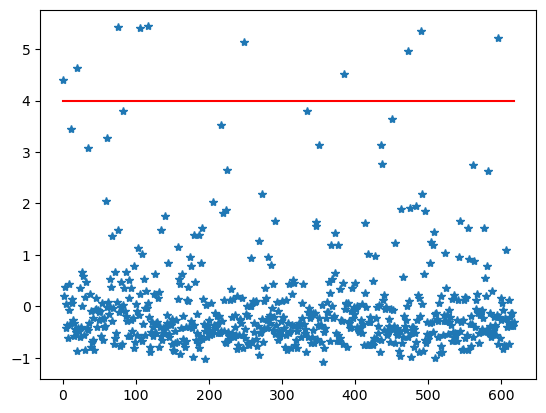

In [26]:
def check_for_outliers(original_df, plot = True, max_z = 3):
    
    ## We will need to drop nans
    df = original_df.dropna()
    
    nrows = df.shape[0]
    
    ## Find Mean Data Point of each column
    mean_data_point = df.mean().values
    
    # Find Covariance Matrix of df
    C = df.cov()
    
    # Find its inverse
    C_inv = np.linalg.inv(C)
    
    # Find the Mahalanobis distances
    distances = []

    for row_ind in range(nrows):
        row = df.iloc[row_ind,:]                   # x
        x_m = row.values - mean_data_point         # x - mean
        distances.append(np.sqrt(
            (x_m.T.dot(C_inv)).dot(x_m)
        ))
    
    # Standardize Distances
    distances = np.array(distances)
    distances = (distances - np.mean(distances)) / np.std(distances, ddof = 1)
    
    # Create a df to save the distances in
    distances_df = pd.DataFrame({"distances": distances},  index = df.index)
    
    # Optionally Plot
    if plot:
        fig, ax = plt.subplots()
        ax.plot(range(1, nrows + 1), distances_df["distances"], "*")
        ax.plot([0, nrows], [max_z, max_z], "r-")
        
    return distances_df


thres = 4
dists = check_for_outliers(X_temp, max_z = thres) # We will use X_temp for this, since it is scaled and has its nans removed.
dists

Based on my personal experience (I've tried running my model with and without outliers. Without seems to work better) and the discussion pages on Kaggle, I think we will remove the outliers above that threshold.

This is risky, as we don't have much data to begin with, but it seems to work better this way.

In [27]:
outlier_indices = dists[dists >= thres].dropna().index

main_data.drop(index = outlier_indices, axis = 0, inplace = True)
metadata.drop(index = outlier_indices, axis = 0, inplace = True)

In [28]:
# We no longer have 617 rows now
print(main_data.shape, metadata.shape)

(607, 57) (607, 5)


## 4

In [29]:
X = main_data.iloc[:, :-1]
X

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
6c679dc63744,0.217923,3398.23418,85.200147,95.223459,8.138688,4.163730,0.025578,14.103876,1.229900,4420.17986,...,7.916668,6.309541,1.21133,0.128687,14.446006,221.207777,2566.877526,51.677248,14.560092,0.081675
ac38de805eff,0.679407,5885.36377,85.200147,9.427268,8.138688,2.294481,0.025578,8.079164,1.229900,3196.66317,...,6.014683,38.083826,1.35662,0.067730,15.766890,118.826134,384.850764,16.435657,14.158860,0.069015
667b389f278d,0.538398,4889.28330,108.548976,7.002317,8.138688,5.935530,0.073080,8.898424,14.259812,2705.76556,...,9.854487,0.173229,0.49706,0.169325,15.673870,72.611063,1180.078956,23.676723,9.444384,21.978000
7dd96a41647c,0.499941,2432.74009,111.806142,40.778199,8.138688,4.358628,0.025578,10.726004,1.229900,4769.22301,...,9.410691,1.466232,1.97519,0.067730,9.041544,137.783898,6788.725749,42.434284,4.552440,0.388385
5c03d177da66,0.299110,1561.99021,85.200147,12.939266,8.138688,4.358628,0.025578,12.440148,2.892022,6204.44274,...,9.487873,2.069300,1.80177,0.067730,18.817946,72.611063,20685.982260,38.158855,22.458704,0.371250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23ab7ab965d5,0.282018,2594.35253,85.200147,31.406677,8.138688,6.741699,0.025578,7.392246,4.736872,4942.51812,...,16.583104,0.705967,0.60755,0.121914,21.692264,72.611063,1731.843747,28.045177,23.263740,7.128000
f944d35cb6c4,0.478576,3045.93300,85.200147,9.043240,8.138688,4.890168,0.025578,13.952628,1.229900,5911.21773,...,11.930132,0.173229,1.46624,0.067730,38.919568,471.417576,24072.418350,34.006219,38.623724,21.978000
8e5a0d625d98,0.700772,5049.17028,85.200147,12.697700,11.167098,6.431634,0.029841,11.746928,1.229900,5351.75793,...,10.915740,14.928171,1.55614,0.196417,9.171772,156.145367,7018.662555,19.546413,116.462732,0.018398


## 5

In [30]:
# Alpha and Gamma are being used for labelling
# Epsilon will not be used

metadata_d = pd.get_dummies(metadata[["Beta", "Delta"]], drop_first= True, dtype = int) 
metadata_d

,Beta_B,Beta_C,Delta_B,Delta_C,Delta_D
Id,,,,,
6c679dc63744,1,0,1,0,0
ac38de805eff,1,0,1,0,0
667b389f278d,0,0,0,0,0
7dd96a41647c,1,0,0,0,0
5c03d177da66,1,0,0,0,0
...,...,...,...,...,...
23ab7ab965d5,0,1,1,0,0
f944d35cb6c4,1,0,1,0,0
8e5a0d625d98,1,0,0,0,0


In [31]:
X_md = pd.concat((X, metadata_d), axis = 1)
X_md

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,GE,GF,GH,GI,GL,Beta_B,Beta_C,Delta_B,Delta_C,Delta_D
Id,,,,,,,,,,,,,,,,,,,,,
6c679dc63744,0.217923,3398.23418,85.200147,95.223459,8.138688,4.163730,0.025578,14.103876,1.229900,4420.17986,...,221.207777,2566.877526,51.677248,14.560092,0.081675,1,0,1,0,0
ac38de805eff,0.679407,5885.36377,85.200147,9.427268,8.138688,2.294481,0.025578,8.079164,1.229900,3196.66317,...,118.826134,384.850764,16.435657,14.158860,0.069015,1,0,1,0,0
667b389f278d,0.538398,4889.28330,108.548976,7.002317,8.138688,5.935530,0.073080,8.898424,14.259812,2705.76556,...,72.611063,1180.078956,23.676723,9.444384,21.978000,0,0,0,0,0
7dd96a41647c,0.499941,2432.74009,111.806142,40.778199,8.138688,4.358628,0.025578,10.726004,1.229900,4769.22301,...,137.783898,6788.725749,42.434284,4.552440,0.388385,1,0,0,0,0
5c03d177da66,0.299110,1561.99021,85.200147,12.939266,8.138688,4.358628,0.025578,12.440148,2.892022,6204.44274,...,72.611063,20685.982260,38.158855,22.458704,0.371250,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23ab7ab965d5,0.282018,2594.35253,85.200147,31.406677,8.138688,6.741699,0.025578,7.392246,4.736872,4942.51812,...,72.611063,1731.843747,28.045177,23.263740,7.128000,0,1,1,0,0
f944d35cb6c4,0.478576,3045.93300,85.200147,9.043240,8.138688,4.890168,0.025578,13.952628,1.229900,5911.21773,...,471.417576,24072.418350,34.006219,38.623724,21.978000,1,0,1,0,0
8e5a0d625d98,0.700772,5049.17028,85.200147,12.697700,11.167098,6.431634,0.029841,11.746928,1.229900,5351.75793,...,156.145367,7018.662555,19.546413,116.462732,0.018398,1,0,0,0,0


## 6

In [32]:
from sklearn.model_selection import train_test_split as split

def split_removenans_scale(df, labels, test_size = 0.20, random_state = None, 
                           shuffle = True, n_neighbors = 5):
    """
    Note that this is a stratified split (stratified on labels)
    """
    df_train, df_test, labels_train, labels_test = split(df, 
                                                         labels, 
                                                         test_size = test_size, 
                                                         random_state = random_state, 
                                                         shuffle = shuffle, 
                                                         stratify = labels)
    # Scale data
    scaler      = StandardScaler()
    df_train[:] = scaler.fit_transform(df_train)
    df_test[:]  = scaler.transform(df_test)
   
    # Remove NaNs
    imputer     = KNNImputer(n_neighbors = n_neighbors)
    df_train[:] = imputer.fit_transform(df_train)
    df_test[:]  = imputer.transform(df_test)
    
    
    return df_train, df_test , labels_train, labels_test

In [33]:
# Example
X_train, X_test, y_train, y_test = split_removenans_scale(X, metadata["Beta"])

In [34]:
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
333bff494437,-0.636601,-0.396172,-0.277926,-0.512191,-0.208455,-0.250951,-0.359200,-0.554681,-0.492734,-0.687630,...,-0.647155,-0.022492,-0.030182,-0.237207,0.354880,-0.265098,-0.199262,-0.207200,-0.253090,-0.788715
948b3f28db47,-0.399828,0.175510,-0.277926,-0.446045,-0.208455,0.089278,-0.262764,-0.777136,-0.492734,-0.157121,...,-0.723290,-0.194517,0.005076,-0.042449,-0.242485,-0.396332,-0.434587,-0.677449,-0.798828,-0.797330
ccd8b4b583df,-0.153190,0.182710,-0.114251,0.610680,-0.197518,-0.122126,-0.359200,-0.263670,0.433945,0.176399,...,-0.332596,0.139641,-0.009095,-0.803776,-1.045733,-0.304351,-0.221420,0.764089,0.821585,-0.790570
1319c3883fff,-0.508349,-0.088150,-0.277926,-0.384948,-0.208455,-0.637424,-0.359200,-0.024426,0.084849,-1.421938,...,-0.308554,1.441480,-0.121953,-0.219502,-0.698876,0.169541,-0.434057,0.592144,-0.481110,-0.804436
d061b54c6650,-0.311039,-0.400420,-0.277926,-0.211503,-0.208455,-0.673759,-0.359200,0.003555,-0.492734,-0.547147,...,-0.060113,0.340852,-0.208073,-0.803776,-0.407800,-0.396332,-0.589120,0.055116,-0.092414,-0.798848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f1a68746ca6e,0.793900,-0.735637,-0.277926,0.622293,-0.208455,-0.049456,-0.359200,0.227410,-0.246826,-0.819249,...,-0.022045,1.474743,-0.113940,-0.431965,-0.845935,-0.396332,-0.481588,-0.073243,-0.343201,-0.799828
0fa0daef7ac0,-0.044669,0.289499,-0.021234,1.462249,-0.208455,-0.244344,-0.359200,0.635943,-0.492734,-0.222996,...,-0.120220,0.453757,-0.078935,0.913637,1.201738,-0.396332,-0.454554,0.222263,-0.878378,-0.803924
44c7768642a7,-0.478753,-0.831070,-0.183526,-0.195446,-0.208455,0.178464,-0.359200,1.258538,0.047326,2.423705,...,2.977278,-0.547493,-0.267032,0.240836,0.354880,-0.396332,-0.610025,2.310393,-0.126839,1.339117


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
1bac22586f27,3.615441,0.544639,-0.277926,9.676402,-0.208455,1.103358,-0.359200,2.044825,0.297255,3.451965,...,1.690995,-0.242007,0.133286,1.373974,0.641899,0.971646,0.443070,1.073990,-1.259119,-0.792692
5fe47095520d,-0.597139,-0.447169,-0.277926,-0.409690,-0.208455,-0.657243,0.165172,0.571585,0.414513,0.759493,...,-0.228412,0.655658,0.095076,-0.219502,0.316340,-0.396332,-0.611836,-0.340757,0.364174,-0.801950
c1ffde2da7d9,0.389414,-0.180518,-0.277926,0.876678,-0.208455,-0.307105,-0.359200,-1.602598,-0.492734,-0.977140,...,-0.917635,-0.382037,-0.073368,0.134604,-1.108613,-0.102576,-0.443645,1.070791,-0.758299,-0.461037
68c35486588c,-0.370232,-0.760147,-0.181331,1.240836,-0.208455,-0.614302,-0.359200,-0.465139,-0.492734,0.717760,...,0.216378,-0.537007,-0.267032,-0.237207,-0.817538,-0.396332,-0.524985,-0.474714,-0.758436,-0.519107
c6c3a77ec885,0.290758,0.931412,0.090484,-0.044118,-0.208455,2.563370,-0.359200,0.202226,-0.492734,0.946073,...,0.362637,-0.126423,-0.267032,-0.803776,1.035409,0.053537,-0.714695,0.074710,-1.222705,-0.807361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7c2df9f2fbe2,-0.626736,-0.535207,-0.277926,-0.304259,0.423442,-0.594483,1.931160,-0.199312,-0.492734,-0.357638,...,1.067889,-0.547493,-0.267032,-0.786071,-0.321593,-0.396332,-0.482712,0.843264,-0.182113,1.339117
d8dae19a0df0,0.705111,2.577072,1.156929,0.165783,-0.208455,-0.075881,-0.359200,0.128074,2.044074,-0.922699,...,0.263461,0.064567,-0.267032,-0.254912,-0.823623,-0.396332,-0.696556,-1.027337,0.686179,-0.804964
a46b439e1eac,0.349952,0.764621,0.025193,-0.106629,-0.208455,0.026517,-0.359200,0.114083,-0.492734,-0.468638,...,0.550972,0.323696,-0.198626,0.134604,-0.342891,-0.396332,0.264054,-0.445523,-0.063131,-0.792453


Id
333bff494437    B
948b3f28db47    B
ccd8b4b583df    C
1319c3883fff    C
d061b54c6650    C
               ..
f1a68746ca6e    C
0fa0daef7ac0    C
44c7768642a7    C
8b866016ac44    B
6ef1fe86ad00    C
Name: Beta, Length: 485, dtype: object

Id
1bac22586f27    A
5fe47095520d    C
c1ffde2da7d9    C
68c35486588c    C
c6c3a77ec885    C
               ..
7c2df9f2fbe2    C
d8dae19a0df0    C
a46b439e1eac    C
f44978084805    C
3c299fce6b56    C
Name: Beta, Length: 122, dtype: object

# Predicting the Metadata

* [Motivation](#Motivation)
* [Prepping for Parameter Estimation and Feature Extraction](#MDPrep)
* [Predicting Beta](#Predicting-Beta)
    * [Finding Parameters, Columns, and Weights](#findbetadata)
    * [Building `predict_beta` (and `predict` and Utility Functions)](#Building-predict_beta)
* [Predicting Delta](#Predicting-Delta)

The metadata is only available for the training data set.

Thus, if we want to use metadata for classification, we must learn to predict metadata values for a test data point.

We only need to do this for Beta and Delta, since, as stated previously, Alpha and Gamma are better suited as target variables and Epsilon will not be used. 

There are many algorithms that we can use to generate these predictions. For predicting Beta, I have had good success using Random Forest and LightGBM.

LightGBM, however, provides more consistent results, so we will use it here.

In [35]:
from lightgbm import LGBMClassifier

We will:

1. Find the most important features to use for classification.
2. Using these features, find multiple approximations of the optimal parameter. 
3. Create the final prediction model using one or more of these parameters.

We will also create a helper function that helps us test how well sets of parameters are doing.

Let's use k-NN for a demonstration.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Before going further, let's create a variable called `find_data`.

If `find_data` is `True`, the functions that we are about to create will work, and we will go through the process of finding all of the optimal columns and parameters. Since this is a long process, after finishing, the data we found will be saved as a variable for later.

Therefore, if `find_data` is `False`, the functions will either not be ran, and we will instead use the data we've already found.

In [37]:
find_data = False

## <a id='MDPrep'></a> Prepping for Parameter Estimation and Feature Extraction (Metadata)

* [Finding the Optimal Columns](#MDPrep1)
* [Performing Bayesian Optimization](#MDPrep2)
* [Evaluating Sets of Parameters](#MDPrep3)


### <a id='MDPrep1'></a>Finding the Optimal Columns

We will use sklearn's `inspection.permutation_importance` to find the most important features.

We can optionally gives this function a scorer.

Because Beta is imbalanced...

In [38]:
metadata["Beta"].value_counts()

Beta
C    405
B    195
A      7
Name: count, dtype: int64

...the metric we will use is `balanced_accuracy_score`.

In [39]:
from sklearn.metrics import balanced_accuracy_score

Before we create a function that ranks features' importance, let's create a few utility functions.

#### Utility Functions

While I am currently using LightGBM to make classifications, originally I tried using XGBoost.

The y value for XGBoost must be ordinally encoded.

Therefore, the following function fixes a y value for XGBoost, by ordinally encoding the vector.

While this function might not be needed now, I will create it here and use it in the `rank_columns` function (the function that we will make tthat will rank a feature's importance). This is because it will be needed in the function later.

If `classifier_name != "xgboost"`, the function just returns y in the form of a NumPy array. 

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
def fix_y_for_xgboost(arr, classifier_name):
    """
    Takes a NumPy array or Pandas Series and ordinally encodes it.
    Preprocessing step needed on y values before using XGBoost
    Always returns a NumPy array
    """
    # If we were given a Pandas Series, transform it into a NumPyArray
    if type(arr) == pd.Series:
        arr = arr.values
        
    # Check if we are using XGBoost. If not, just return the array
    if classifier_name != "xgboost":
        return arr
    
    # Otherwise, encode the array (which must be in the shape of a column vector) and turn it into a integer row vector
    encoder = OrdinalEncoder()
    return encoder.fit_transform(arr.reshape(-1, 1)).ravel().astype(int)

In [42]:
# Example
fix_y_for_xgboost(np.array(["A", "C", "B"]), "xgboost")

array([0, 2, 1])

We also need a function that returns a classifier object given a classifier name.

In [43]:
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier
from lightgbm             import LGBMClassifier
from catboost             import CatBoostClassifier   

In [44]:
def return_classifier_obj(classifier_name):
    if classifier_name== "k-nn":
        return KNeighborsClassifier()
    elif classifier_name == "random forest":
        return RandomForestClassifier()
    elif classifier_name == "xgboost":
        return XGBClassifier()
    elif classifier_name == "lightgbm":
        return LGBMClassifier()
    elif classifier_name == "catboost":
        return CatBoostClassifier(silent = True)
    else:
        raise ValueError(f"{classifier_name} not supported")

In [45]:
return_classifier_obj("xgboost")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Now, we are ready to create `rank_columns`.

We will allow the user to optionally transform the data with a pipeline.

In [46]:
from sklearn.pipeline import Pipeline

#### `rank_columns`

In [47]:
from sklearn.inspection import permutation_importance
def rank_columns(n, 
                 X, 
                 y_names, 
                 y_df, 
                 clf_names, 
                 scorer = None, 
                 pipeline = None, 
                 feature_names = None,
                 return_only_relevant = True):
    
    """
    For each classifier name in clf_names (e.g. "random forest"), and for each y_name in (e.g. "Beta"),
    this function will, for n iterations,
        * Create an X_train, X_test, y_train, y_test split, with the data scaled and NaNs removed
        * Fit the appropriate classifier with X_train and y_train (fixed for xgboost)
        * Using this classifier, X_test, and y_test (fixed for xgboost), use 1 test_data point to calculate the importance
              of the features
        * Take the absolute value of the values and put it in a Series sorted by index
        * Add this series to the main Series (fi[(classifier_name, y_name)]), which is also sorted by index.
    Afterwards, it will return fi[(classifier_name, y_name)] sorted in order of descending feature importance value.
    
    n                    : int
                           The number of iterations used to find feature importance
    
    X                    : DataFrame
                           df to use creating X_train and X_test
                           Does not need to be scaled or imputed.
    
    y_names              : list
                           list of y_names (e.g. ["Beta"])
    
    y_df                 : DataFrame
                           df where we can find the corresponding data for each value in y_names
                           (e.g.: metadata)
                 
    clf_names            : list
                           list of classifier names (e.g. ["xgboost", "random forest"])
                           Approved names: {"k-nn", "random forest", "xgboost", "lightgbm", "catboost"}
                 
    scorer               : string or sklearn scorer
                           the scorer the will be used in ranking each feature's importance.
                 
    pipeline             : sklearn Pipeline
                           An optional pipeline that can be used to transform the data before finding the most optimal columns
                 
    feature_names        : list
                           If transforming the data adds new column names to the data matrix, we can supply all feature names 
                           as an argument to this parameter
                           If this parameter is None, the function will attempt to use the original feature names, which  
                           will lead to an error
                
    return_only_relevant : bool
                           Indicates if the score of all columns should be returned (False) or only the columns with non-negative
                           scores (True)
    """
    
    # Where we will save each Feature Importance series
    fi = {}
    
    # The name of the features
    cols = list(X.columns) if feature_names is None else feature_names
    
    for clf_name in clf_names: 
        for y_name in y_names: 
            
            # Initialize fi[(y_name, clf_name)], A series with the column names as the index and all 0s as the values
            # we will add, for each iteration, a new series to this one
            # And at the end, take the average.
            # It is ordered by index so that the sums will be done correctly.
            fi[(y_name, clf_name)] = pd.Series([0]* len(cols), index = cols).sort_index()
            
            print(y_name, "-", clf_name)
            
            for i in range(n):
                print(f"   Iteration {i}\r", end = "")
                
                # Split Data
                X_train, X_test, y_train, y_test = split_removenans_scale(X, y_df[y_name])
                
                if pipeline is not None:
                    X_train = pipeline.fit_transform(X_train)
                    X_test  = pipeline.transform(X_test)
              
                # Initialize and fit classifier
                clf = return_classifier_obj(clf_name)
                clf.fit(X_train.values, fix_y_for_xgboost(y_train, clf_name))
   
                # Find the feature importance for this itertaion
                result = permutation_importance(clf, X_test.values, fix_y_for_xgboost(y_test, clf_name), n_repeats=1)
        
                series = pd.Series(result.importances_mean , index = cols).sort_index()
                
                # Add it to the main series
                fi[(y_name, clf_name)] += series
                
            print("Complete!      ")
            
            # Take the average
            fi[(y_name, clf_name)] = fi[(y_name, clf_name)].sort_values(ascending = False) / n
            
    if return_only_relevant:
        fi[(y_name, clf_name)] = fi[(y_name, clf_name)][fi[(y_name, clf_name)] > 0]
    return fi

In [48]:
# Testing the Function
rank_columns(1, X, ["Beta"], metadata, ["k-nn"], "balanced_accuracy")

Beta - k-nn
Complete!      


{('Beta',
  'k-nn'): EE    0.024590
 FI    0.024590
 AZ    0.024590
 BP    0.024590
 BR    0.016393
 EL    0.016393
 AF    0.016393
 CW    0.016393
 FL    0.016393
 FR    0.016393
 CR    0.016393
 BZ    0.016393
 AB    0.016393
 AM    0.016393
 GF    0.016393
 BN    0.016393
 GE    0.008197
 AX    0.008197
 EH    0.008197
 AH    0.008197
 DV    0.008197
 DU    0.008197
 DF    0.008197
 DE    0.008197
 CF    0.008197
 BC    0.008197
 CL    0.008197
 CH    0.008197
 CD    0.008197
 dtype: float64}

In [49]:
# return_only_relevant == False
rank_columns(1, X, ["Beta"], metadata, ["k-nn"], "balanced_accuracy", return_only_relevant=False)

Beta - k-nn
Complete!      


{('Beta',
  'k-nn'): EL    0.049180
 DL    0.040984
 AX    0.032787
 EU    0.032787
 CC    0.032787
 DI    0.032787
 DY    0.024590
 GF    0.024590
 BP    0.024590
 DE    0.016393
 EB    0.016393
 CS    0.016393
 BQ    0.016393
 BZ    0.016393
 EJ    0.016393
 CF    0.008197
 CH    0.008197
 GL    0.008197
 FC    0.008197
 BN    0.008197
 BD    0.008197
 BC    0.008197
 AY    0.008197
 GE    0.008197
 DU    0.000000
 FE    0.000000
 EE    0.000000
 FR    0.000000
 DV    0.000000
 GI    0.000000
 FD    0.000000
 AB    0.000000
 CB    0.000000
 AH    0.000000
 AM    0.000000
 CW    0.000000
 AR    0.000000
 CU    0.000000
 CR    0.000000
 AZ    0.000000
 CL    0.000000
 BR    0.000000
 AF   -0.008197
 GB   -0.008197
 DN   -0.008197
 CD   -0.008197
 EH   -0.008197
 EG   -0.008197
 DF   -0.008197
 FL   -0.016393
 EP   -0.016393
 DH   -0.016393
 FI   -0.024590
 DA   -0.024590
 GH   -0.024590
 FS   -0.032787
 dtype: float64}

### <a id="MDPrep2"></a> Performing Bayesian Optimization

We can learn more about Bayesian Optimization (along with other methods of parameter optimization) [here](https://towardsdatascience.com/hyperparameter-optimization-with-scikit-learn-scikit-opt-and-keras-f13367f3e796).

This code does the following:

* Find an approximation of the optimal parameter using Bayesian Optimization
* Using that parameter, run `n_tests` tests and return the results.

This function can be ran for multiple classifiers at once, so in case something goes wrong (i.e. a crash), there is an option to backup the findings along the way.

The title of the backup file includes the date and time, so we will import `datetime`.

In [50]:
from datetime import datetime

Let's create the code!

In [51]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

This code will optionally use confusion matrices for evaluation.

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
def find_parameters_Bayes_Search(
                    X,
                    y_val, 
                    CV_metric, 
                    k_for_CV,
                    test_size,
                    test_metrics_name_list,
                    test_metrics_list,
                    classifier_names,
                    parameters_to_find_dict,
                    columns_dict,
                    use_confusion_matrix = False,
                    verbose    = 2,
                    verbose_CV = 4,
                    n_iter = 50,
                    n_tests = 20,
                    n_jobs  = -1,
                    initial_parameters = None,
                    backup = True,
                    save_ending = "", 
                    pipeline_CV = None,
                    pipeline_test = None,
                    choose_columns_first = True):
    
    """
    X                         : DataFrame
                                The feature data
    
    y_val                     : Panda Series or 1D NumPy array
                                The target values
                                
    CV_metric                 : str or sklearn scorer (or list of strings and sklearn scorers)
                                This is a string indicating the sklearn metric that we will use for cross validation.
                                Can also be an sklearn customer scorer.
    
    k_for_CV                  : int
                                the number of folds we will use in Bayes Search's cross validation
                                
    test_size                 : float
                                The proportion of X what we should use for X_test during the testing phase
    
    test_metrics_name_list    : list
                                A list of strings that are the names of the metrics we will use to evaluate
                                the model after CV, using the optimal parameters we found
                                
                                These string need not be sklearn metric strings. 
                                It will just be used in visualizing the results
                                The actual metrics themselves is a list of functions (test_metrics_list)
                                
    test_metrics_list         : list
                                A list of metric functions to use to evaluate the model after CV
    
                                
    classifier_names          : list
                                A list of classifier names to find the parameters of
                                {"k-nn", "logistic regression", "xgboost", "catboost", "lightgbm"}
    
    parameters_to_find_dict   : dict
                                A dictionary where the keys are classifier names and the value is a dict, where
                                each key is a parameter name and each value is the corresponding value ranges to search in
                                
    columns_dict              : dict
                                A dictionary where the keys are classifier names and the value is a list corresponding to the
                                column names to the best columns of X, for this classifier, to use for classifing y
                                
    use_confusion_matrix      : bool. 
                                When testing the model, do we want to find a confusion matrix, which we can
                                present the results of when running the  code is complete.
                                
    verbose                   : int 
                                Integer from 0 - 2
                                
    verbose_CV                  int
                                Controls verbosity of CV
                                
    n_iter                    : int
                                n_iter in BayesSearchCV.
    
    n_tests                   : int
                                number of tests to execute
                                
    n_jobs                    : int
                                n_jobs in BayesSearchCV
    
    initial_parameters        : Any initial parameters / last minute parameters we want to overwrite .
                                A dictionary where the keys are classifier names (need not have ALL possible classifier names) 
                                and the value is the corresponding dictionary of parameters to use
    
    backup                    : boolean
                                If you are running this function on multiple classifiers, this helps you backup your findings.
                                Backups parameters and the evaluation data frame
    
    save_ending               : str
                                custom file ending if backup = True
                                
    pipeline_CV               : pipeline
                                optional pipeline that can be used to transform the data in the Bayes Search step
                                
    pipeline_test             : pipeline
                                optional pipeline that can be used to transform the data in the testing step
                                
    choose_columns_first      : bool
                                True if we are supplying the columns we want to use and are
                                  not using BayesSearch to choose the columns for us. False otherwise.
    """
    
    global find_data
    if not find_data:
        return 0, 0 ,0
  
    # Where we will save the bayes_search objects
    bayes_search_objs = []
    
    # Where the final parameters of all models should be saved
    found_parameters = dict()
    
    # Dataframe where we will save the 
    #     best score From CV
    #     average metric value found after using the metrics in "test_metrics_list"
    # Index is the metrics
    # columns are the names of the classifiers
    
    scores = pd.DataFrame(index = [f"{str(CV_metric)}"] +  test_metrics_name_list, 
                          columns = classifier_names)
    
    # We will store them here and print this list once CV and testing is over, so the user can more easily see the output
    if use_confusion_matrix:
        confusion_matrices = []
    
    for classifier_name in classifier_names:

        # XGBoost requires an encoded y value.
        y = fix_y_for_xgboost(y_val, classifier_name)

        # Initialize an instance of the classifier
        classifier = return_classifier_obj(classifier_name)
        
        if verbose >=1:
            print(classifier_name)
        
        # Overwrite / add any last minute parameters
        if initial_parameters is not None:
            if classifier_name in initial_parameters:
                classifier.set_params(**initial_parameters[classifier_name])
                
        if pipeline_CV is None:
            pipeline_CV = Pipeline([( "scaler"    , StandardScaler()           ),
                                    ( "nanremoval", KNNImputer(n_neighbors = 5)),
                                    ( "classifier", classifier                 )])
            
        # We need to tell BayesSearch that the parameters we want to find are the parameters for the classifier
        # We need to do this by appending all of the parameters in "parameters_to_find" with "classifier__"
        # We will put the results in "param_grid"
        search_space = dict()
        
        ## Change the parameter names
        for param in parameters_to_find_dict[classifier_name]:
            search_space[f"classifier__{param}"] = parameters_to_find_dict[classifier_name][param]

        # Perform Bayes Search
        bayes_search = BayesSearchCV(pipeline_CV, 
                                     search_space, 
                                     n_iter  = n_iter,
                                     scoring = CV_metric, 
                                     cv      = k_for_CV,
                                     verbose = verbose_CV,
                                     n_jobs  = n_jobs,
                                     return_train_score = True)

        if choose_columns_first:
            bayes_search.fit(X[columns_dict[classifier_name]], y)
        else:
            bayes_search.fit(X, y)

        
        # We are done with BayesSearch ! In scores, save the best score that we got from CV for this classifier.
        scores.loc[str(CV_metric), classifier_name] = bayes_search.best_score_
        
        # Save the parameters found by GridSearch!
        found_parameters[classifier_name] = dict()
        
        ### Note that we need to remove the "classifier__" heading (which is 12 characters long)
        n = len(columns_dict[classifier_name])

        every_found_param = dict()
        every_found_param[classifier_name] = dict()
        
        for param in bayes_search.best_params_:
            every_found_param[classifier_name][param[12:]] = bayes_search.best_params_[param]
            if param == "classifier__n":
                n = bayes_search.best_params_[param]
                continue
            found_parameters[classifier_name][param[12:]] = bayes_search.best_params_[param]
            
        
        ### Backup
        if backup:
            save_load_obj("save", f"{str(datetime.now())}-{classifier_name}-parameters({save_ending})".replace(":", "_").replace(".", "_"),
                      found_parameters[classifier_name])
            
        if verbose > 0:
            print(pd.DataFrame(bayes_search.cv_results_))
            print("The optimal parameters are (given that the constant parameters are optimal)")
            print(every_found_param[classifier_name])
                  
        bayes_search_objs.append(bayes_search)
        # -------------------------------Now it is time to test the classifier!--------------------------------------
        
        
        # Give the classifier the optimal parameters
        classifier.set_params(**found_parameters[classifier_name])
        
        # confusion matrix sum
        unique_y = np.unique(y)
        n_y = len(unique_y)
        total_cmatrix = np.zeros((n_y, n_y), dtype = int)
        
        # Where we will save the metric scores we found during each test iteration for this classifier
        test_scores = {test_metrics_name: list()     for test_metrics_name in test_metrics_name_list}
        
        for i in range(n_tests):
            # Will be used to test the classifier
            X_train, X_test, y_train, y_test = split_removenans_scale(X, y, test_size = test_size)

            if pipeline_test is not None:
                X_train = pipeline_test.fit_transform(X_train)
                X_test  = pipeline_test.transform(X_test)
                
            # If we are using xgboost, we need to transform y_train and y_test
            y_train = fix_y_for_xgboost(y_train, classifier_name)
            y_test = fix_y_for_xgboost(y_test, classifier_name)
            
            
            # Fit using y_train and the optimal columns of X_train
            classifier.fit(X_train[columns_dict[classifier_name][:n]], y_train)

            # Make prediction using the same optimal columns for X_test
            y_pred = classifier.predict(X_test[columns_dict[classifier_name][:n]])
         

            # If we want to use a confusion matrix, append it and save it for later
            # Note that we don't have to convert y_pred here because if we are in xgboost
            # It should already be converted from the classifier.
            if use_confusion_matrix:
                cmatrix = confusion_matrix(y_test, y_pred, labels = unique_y)
                total_cmatrix += cmatrix

            # Now, we use the user's metrics
            for metric, metric_name  in zip(test_metrics_list, test_metrics_name_list):
                score = metric(y_test, y_pred)
                # Save the score
                test_scores[metric_name].append(score)
        
        # Save our results 
        for metric_name in test_metrics_name_list:
            scores.loc[metric_name, classifier_name] = np.median(test_scores[metric_name])
            
        if use_confusion_matrix:
            confusion_matrices.append(total_cmatrix)
            
        # Backup the scores
        if backup:
            save_load_obj("save", f"{str(datetime.now())}-{classifier_name}-weights({save_ending})".replace(":", "_").replace(".", "_"),
                      scores)
        
    # We've finished everthing. Now we can output the confusion matrices, if applicable
    if use_confusion_matrix:
        for classifier_name, cmatrix in zip(classifier_names, confusion_matrices):
            print(classifier_name)
            cmatrix_index = ["True " + label    for label in unique_y]
            cmatrix_cols  = ["Pred " + label    for label in unique_y]
            print(pd.DataFrame(cmatrix, columns = cmatrix_cols, index = cmatrix_index))
            
    if verbose > 0:
        print(scores)
    return scores, found_parameters, bayes_search_objs, every_found_param

Now, let's run the code!

In [54]:
# Top 7 best columns from k-nn

best_cols = ["FI", "DN", "GB", "EL", "BD", "GI", "EB"]

find_parameters_Bayes_Search(
                X,
                metadata["Beta"], 
                CV_metric                = "balanced_accuracy", 
                k_for_CV                 = 4,
                test_size                = 0.25,
                test_metrics_name_list   = ["test balanced accuracy"],
                test_metrics_list        = [balanced_accuracy_score],
                classifier_names         = ["k-nn"],
                parameters_to_find_dict  = {"k-nn": {"n_neighbors": Integer(1, 2)}}, 
                columns_dict             = {"k-nn": best_cols},
                use_confusion_matrix     = True,
                n_iter                   = 5)                                      

(0, 0, 0)

### <a id="MDPrep3"> </a> Evaluating Sets of Parameters

The purpose of this code: for each set of parameters in a list of parameter sets:
* Step 1: Create a stratified train-test split of `X_train`, `X_test`, `y_train`, and `y_test`
* Step 2: Using the classifier created by `classifier_name`, predict `X_test`.
* Step 3: Repeat this process `n_tests` times.
* Step 4: Return the median metric score for each parameter set.

This can be used to evaluate our model after we find a group of parameters and columns that we are happy with. 

In [55]:
def run_parameter_tests( X,
                         y_val,
                         n_tests,
                         test_size,
                         metric,
                         metric_name,
                         classifier_name,
                         parameters_list,
                         columns):
    
    """
    X                         : DataFrame
                                The feature data
    
    y_val                     : Series or 1D NumPy vector
                                The target labels
                                
    n_tests                   : int
                                the number of tests (train-test splits) to perform for each set of parameters.
                                
    test_size                 : float
                                The proportion of X that we want to use for the test data frame.
                                
    metric                    : function
                                The function we want to use as the metric.
                                
    metric_name               : str
                                The name of the metric; only used for visualizing the results
                                
    classifier_names          : str 
                                The name of the classifier.
                                Approved: {"k-nn", "logistic regression", "xgboost", "catboost", "lightgbm", "LDA"}
    
    parameters_list           : list
                                A list of dictionaries, where the keys are parameter names 
                                and the values are parameter values
    
    columns                   : list
                                A list of columns names. 
                                These are the columns of X that will be used in training and predicting
    """
    
    global find_data
    if not find_data:
        return 0
    
    # XGBoost requires an encoded y value.
    y = fix_y_for_xgboost(y_val, classifier_name)

    # This is a list of dictionaries, where the first n-1 keys-value pairs are parameters names and values
    # And the last key-value pair is "median test" + metric name and the median metric value.
    test_metric_values = []
    
    for parameters in parameters_list:
        classifier = return_classifier_obj(classifier_name)

        # Set the constant parameters
        classifier.set_params(**parameters)
        
        # This is where the n_tests metric values for this parameter will be saved
        metric_values = []

        for i in range(n_tests):
            X_train, X_test, y_train, y_test = split_removenans_scale(X, y, test_size = test_size)

            y_pred = classifier.fit(X_train[columns], y_train).predict(X_test[columns])
            
            metric_values.append(metric(y_test, y_pred))
        
        # Save the median and mean
        test_metric_values.append({**parameters, "median test "+ metric_name: np.median(metric_values), 
                                                 "mean test "  + metric_name: np.mean(metric_values)})
    
    # Turn the list of dictionaries into a data frame
    return pd.DataFrame(test_metric_values)

Let's test it.

In [56]:
run_parameter_tests(
         X,
         metadata["Beta"],
         5,  #n_tests
         0.20, #test_size
         balanced_accuracy_score,
         "balanced_accuracy",
         "k-nn",
         [{"n_neighbors": i}    for i in range(1, 11)],
         best_cols)

0

## Predicting Beta

### <a id = "findbetadata"></a>Finding Parameters, Columns, and Weights

We are finally ready to actually begin looking for parameters and columns.

Let's start by finding the most important columns.

In [57]:
# Step 1: Find the Important columns
n = 75
clf_names = ["lightgbm"]
y_names   = ["Beta"]
y_df      = metadata
scorer    = "balanced_accuracy"

if find_data:
    beta_fi = rank_columns(n, X, y_names, y_df, clf_names, scorer)
    print(beta_fi)

Let's create a place to save the final columns to use.

In [58]:
if find_data:
    beta_columns = dict()
    beta_columns["lightgbm"] = list(beta_fi[("Beta", "lightgbm")].index)
    print(beta_columns)

We can choose to use all columns or use the first `n` columns.

After trying a few values of `n`, 29 works well.

In [59]:
n = 29

# ---------------------------------

if find_data:
    beta_columns["lightgbm"] = beta_columns["lightgbm"][ :n]

Note, that `balanced_accuracy_score` is very strict.

In [60]:
# Example

true = [*[1]*99, 0] # array with 99 1s and one 0
pred = [1]*100      # 100 1s

balanced_accuracy_score(true, pred)

0.5

A single wrong prediction of A can tank our balanced accuracy.

Therefore, we will also take accuracy into consideration. 

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
# A model that predicts all Cs would only have 66% accuracy.
# So an accuracy of over 80% is still meaningful in some way.

405 / (405 + 195 + 7)

0.6672158154859967

<font color = "dblue"> ***Parameters to Optimize***
```
+--------------------+----------------------------------------------------------+-----------------+
| Parameter          | Description                                              | Values to Try   |
| Name               |                                                          |                 |
+--------------------+----------------------------------------------------------+-----------------+
| n_estimators       | The number of trees in the forest.                       | (2**3 - 2**8)   |
+--------------------+----------------------------------------------------------+-----------------+
| learning_rate      | learning rate                                            | (0.01 - 0.3)    |
|                    | It is the step size shrinkage used in update.            |                 |
+--------------------+----------------------------------------------------------+-----------------+
| max_depth          | The maximum depth of the tree                            | (2 - 40)        |
+--------------------+----------------------------------------------------------+-----------------+
| min_child_weight   | It defines the minimum sum of weights of all             | (10, 30)        |
|                    | observations required in a child (leaf).                 |                 |
|                    |                                                          |                 |
|                    | This is similar to min_samples_leaf in random forest     |                 |
|                    | but not exactly.                                         |                 |
|                    | This refers to min “sum of weights” of observations      |                 |
|                    | while min_samples_leaf has min “number of observations”. |                 |
+--------------------+----------------------------------------------------------+-----------------+
| min_child_samples  | Minimum number of data needed in a child (leaf).         | (2, 40)         |
+--------------------+----------------------------------------------------------+-----------------+
| colsample_bytree   | Subsample ratio of columns when constructing each tree.  | (0.01, 1)       |
+--------------------+----------------------------------------------------------+-----------------+
| num_leaves         | maximum number of leaf nodes                             | (2 - 40)        |
+--------------------+----------------------------------------------------------+-----------------+
| subsample          | It denotes the fraction of observations                  | (0.01, 1)       |
|                    | to be randomly samples for each tree.                    |                 |
+--------------------+----------------------------------------------------------+-----------------+
```
<font color = "dblue">***Constant Parameters***
    
 None
    
Table was made using [this](https://www.tablesgenerator.com/text_tables).

In [63]:
# Step 2: BayesSearchCV Parameter Estimation

# First, let's first test this out for a single iteration, just to make sure the search space is well set up.

if find_data:
    classifier_name = "lightgbm"
    params_to_find    = {"n_estimators"       : Integer(2**3, 2**8, base = 2), 
                        "learning_rate"       : Real(0.01, 0.3), 
                        "max_depth"           : Integer(2, 40),
                        "min_child_weight"    : Real(10, 30),
                        "colsample_bytree"    : Real(0.01, 1),
                        "min_child_samples"   : Integer(2, 40),
                        "num_leaves"          : Integer(2, 40),
                        "subsample"           : Real(0.1, 1)}

    
    #-------------------------------------------------------------------------------------------------------#
       
    y = metadata["Beta"]
    
    # For the most part, everything below doesn't need to be changed. 
    # But k_for_CV, n_iter, and n_tests can be tuned.
    
    if find_data:
        scores, found_parameters, grid_search_objs = \
                find_parameters_Bayes_Search(
                        X,
                        y, 
                        CV_metric                = "balanced_accuracy", 
                        k_for_CV                 = 5,
                        test_size                = 0.20,
                        test_metrics_name_list   = ["test balanced accuracy", "test accuracy"],
                        test_metrics_list        = [balanced_accuracy_score, accuracy_score],
                        classifier_names         = [classifier_name],
                        parameters_to_find_dict  = {classifier_name: params_to_find}, 
                        columns_dict             = {classifier_name: beta_columns[classifier_name]},
                        backup                   = False,
                        n_iter                   = 150,
                        n_tests                  = 50,
                        n_jobs = 1,
                        verbose_CV = 3)      

This seems to be a good search space.

Let's test this particular parameter 100 times to make sure.

In [64]:
# Since BayesSearch returns an *approximated* parameter, 
# these parameters might be slightly different than the ones approximated above
# These are the parameters I received:
if find_data:
    df = run_parameter_tests(X, metadata["Beta"], 100, 0.20, balanced_accuracy_score, "bacc", "lightgbm",
                        [{'colsample_bytree': 1.0, 'learning_rate': 0.2488655535144118, 'max_depth': 2, 'min_child_samples': 2, 'min_child_weight': 10.0, 'n_estimators': 256, 'num_leaves': 40, 'subsample': 0.3210064073634565}],
                        beta_columns[classifier_name])
    display(df)

It works well!

Note, again, that this is a single approximation to the optimal parameter. 

Let's generate 7 different approximations.

In [65]:
# Now let's generate 7 different parameter approximations

if find_data:
    
    num_approximations = 7


    # ---------------------------------------------------------------------------
    
    
    print(f"Now approximating {num_approximations} optimal parameters for {classifier_name}...")
    
    # This is not the columns of X used to predict beta, these are n-1 of the ncolumns of the dataframe we will create
    # We will create a data frame where the first n-1 columns are the parameters we are finding.
    # The last column will hold the test balanced accuracy
    columns = list(params_to_find.keys()) 
    approximations = pd.DataFrame(columns = columns + ["score"], index = range(0, num_approximations))

    for i in range(num_approximations):
        print(f"Iteration {i + 1} -------------")
        
        scores, found_parameters, grid_search_objs = \
                find_parameters_Bayes_Search(
                        X,
                        y, 
                        CV_metric                = "balanced_accuracy", 
                        k_for_CV                 = 5,
                        test_size                = 0.20,
                        test_metrics_name_list   = ["test balanced accuracy", "test accuracy"],
                        test_metrics_list        = [balanced_accuracy_score, accuracy_score],
                        classifier_names         = [classifier_name],
                        parameters_to_find_dict  = {classifier_name: params_to_find}, 
                        columns_dict             = {classifier_name: beta_columns[classifier_name]},
                        backup                   = False,
                        n_iter                   = 150,
                        n_tests                  = 50,
                        n_jobs = -1,
                        verbose_CV = 0)      
        
        # Save the parameters values and the test_balanced accuracy
        approximations.iloc[i] = {**found_parameters[classifier_name], 
                                  "score": scores.loc["test balanced accuracy"].values[0]}
    
    display(approximations)

Let's sort `approximations` from best score to worst.

In [66]:
if find_data:
    approximations.sort_values(by = "score", inplace = True, ascending = False, ignore_index= True)
    display(approximations)

Convert the appropriate columns as integers.

In [67]:
if find_data:
    for col in ["n_estimators", "max_depth", "min_child_weight", "min_child_samples", "num_leaves"]:
        approximations[col] = approximations[col].astype(int)
        
    # This is the final product
    display(approximations)

We will use the top 5 parameters and create and ensemble model.
This is where we will save all of the parameters.

In [68]:
beta_found_parameters = dict()

In [69]:
x = 5

# -----------------------------------------

if find_data:
    all_params = []
    for i in range(0, x):
        params = dict(approximations.iloc[i]).copy()
        del params["score"]
        all_params.append(params)
    print(all_params)

In [70]:
if find_data:
    beta_found_parameters[classifier_name] = all_params

Let's run some tests with  this parameter to see how well it does. 

In [71]:
if find_data:
    df = run_parameter_tests(X,
                            metadata["Beta"],
                            100,
                            0.20,
                            balanced_accuracy_score,
                            "balanced accuracy score",
                            classifier_name,
                            beta_found_parameters[classifier_name],
                            beta_columns[classifier_name])
    display(df)

We've now found 

* A group of optimal columns to use for predictions with lightgbm
* A general group of optimal parameters to use, along with their test scores
* 5 approximations of the optimal parameter to use for Beta Prediction. 

Let's save all of this work.

In [72]:
if not find_data:
    beta_columns =  {'lightgbm': ['EL', 'GE', 'AF', 'CH', 'FR', 'DE', 'FE', 'DL', 'DY', 'GF', 'FI', 'AB', 'AH', 'AX', 'GI', 'CB', 'BQ', 'BP', 'DF', 'EG', 'BN', 'EE', 'CC', 'EP', 'AZ', 'DN', 'FL', 'FC', 'EU']}
    beta_found_parameters = {'lightgbm': [{'n_estimators': 220, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 10, 'colsample_bytree': 0.5555787431308788, 'min_child_samples': 40, 'num_leaves': 40, 'subsample': 0.1}, {'n_estimators': 256, 'learning_rate': 0.23749948168652907, 'max_depth': 2, 'min_child_weight': 10, 'colsample_bytree': 0.23265249400148091, 'min_child_samples': 40, 'num_leaves': 3, 'subsample': 1.0}, {'n_estimators': 218, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 10, 'colsample_bytree': 0.7820187631281579, 'min_child_samples': 9, 'num_leaves': 40, 'subsample': 1.0}, {'n_estimators': 211, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 10, 'colsample_bytree': 0.8125354258493414, 'min_child_samples': 2, 'num_leaves': 40, 'subsample': 1.0}, {'n_estimators': 198, 'learning_rate': 0.3, 'max_depth': 2, 'min_child_weight': 10, 'colsample_bytree': 1.0, 'min_child_samples': 2, 'num_leaves': 40, 'subsample': 0.1}]}

### Building `predict_beta`

Now we have everything we need to create the `predict_beta` function.

#### Utility Functions

When we use `classifier.predict_proba`, I assume that the `classifier.classes_` has the classes saved in numeric or alphabetical order.

I am also assuming that all of the values from `unique_values_of_y` is there. 

If so, the probabilities from `classifier.predict_proba` should be in the order of `unique_values_of_y`.

However, in case this not the case, the following function will correct the order of the probabilities.

In [73]:
def correct_order(classifier_order, true_order, ndarr):
    """
    This ensures that the order the probabilities will be correct.
    For example, we want, for Alpha predictions, the probabilities to be in the order
    A B C
    
    This compares the classifier's class order to the order we want, and fixes it accordingly.
    """
    classifier_order = list(classifier_order)
  
    # If no labels are missing and it is already in the right order 
    if len(classifier_order) == len(true_order) and np.all(classifier_order == true_order):
        return ndarr
    
    # Else, create a new object to store the correctly ordered probabilities in.
    new_ndarr = np.zeros((ndarr.shape[0], len(true_order)))

    # Correct the order
    for true_ind, label in enumerate(true_order):
        try:
            classifier_ind = classifier_order.index(label)
        except ValueError:
            print(f"{label} not found in classifier.classes_ ({classifier_order})")
            print("Giving 0 probability...")
        else: 
            new_ndarr[:, true_ind] = ndarr[:, classifier_ind]

    return new_ndarr

Here is an example of how it works.

In [74]:
correct_order(["A", "C", "B"], ["A", "B", "C"], np.array( [[1, 3, 2], 
                                                           [4, 6, 5]]))

array([[1., 2., 3.],
       [4., 5., 6.]])

Lastly, give an n-dimensional NumPy array of probabilities, the following function coverts them to predictions.

For example, if `unique_values_of_y` = `[A, B]`

and the ith row of `probs` is `[0.8 0.2]`, then the ith element of the returned vector will be A.

In [75]:
def prob_to_label(probs, unique_values_of_y):
    """
    Given an n-dimensional NumPy array of prediction probabilities (probs) 
    and unique labels values placed in alphabetical or numeric order, 
    this function converts probs into an array of label values
    """
    # Let labels be a properly sized array with the same dtype as unique_values_of_y
    labels = np.zeros(probs.shape[0], dtype = np.array(unique_values_of_y).dtype)
    
    for i in range(probs.shape[0]):
        row = probs[i, :]
        row_argmax = np.argmax(row) # index of the highest probability value in the row
        labels[i] = unique_values_of_y[row_argmax]
    return labels

Now, it is time to create `predict_beta`.

In [76]:
def predict_beta(X_train, y_train, X_test):
    pipeline = Pipeline([('scaler', StandardScaler()), ('impute', KNNImputer(n_neighbors = 5))])
    
    clf_name = "lightgbm"
    unique_values = ["A", "B", "C"]
    
    # ---------------------------------------------------------------------------------
    
    X_train = pipeline.fit_transform(X_train[beta_columns[clf_name]])
    X_test  = pipeline.transform(X_test[beta_columns[clf_name]])
    
    all_probabilities = np.zeros((len(X_test), len(unique_values)))
    for params in beta_found_parameters[clf_name]:
        classifier = return_classifier_obj(clf_name)
        classifier.set_params(**params)
        classifier.fit(X_train, y_train)
        
        all_probabilities += correct_order(classifier.classes_, unique_values, classifier.predict_proba(X_test))
        
    all_probabilities /= len(beta_found_parameters[clf_name])
    
    return prob_to_label(all_probabilities, unique_values)

Let's test out our predictions.

First, we will create the `summary` function, which returns the five-number summary, IQR, and mean of a group of arrays.

In [77]:
def summary(list_of_arrs, arr_names):
    """
    list_of_arrs     : list
                       A list of arrays to find the numeric summaries of.
                    
    arr_names        : list
                       The names of each array.
    """
    df = pd.DataFrame(index = ["min", "Q1", "med", "mean", "Q3", "max", "IQR"], columns = arr_names)
    
    for col, arr in zip(arr_names, list_of_arrs):
        df.loc["min", col] = np.min(arr)
        df.loc["Q1", col]  = np.quantile(arr, 0.25)
        df.loc["med", col] = np.median(arr)
        df.loc["mean", col]= np.mean(arr)
        df.loc["Q3", col]  = np.quantile(arr, 0.75)
        df.loc["max", col]  = np.max(arr)
        df.loc["IQR", col]  = np.quantile(arr, 0.75) - np.quantile(arr, 0.25)
        
    return df

summary([[1, 2, 3, 4, 5]], ["a"])

,a
min,1
Q1,2.0
med,3.0
mean,3.0
Q3,4.0
max,5
IQR,2.0


In [78]:
if find_data:
    bacc_values = []
    acc_values = []
    
    for i in range(0, 50):
        X_train, X_test, y_train, y_test = split_removenans_scale(X, metadata["Beta"])
        y_pred = predict_beta(X_train, y_train, X_test)
        bacc_values.append(balanced_accuracy_score(y_test, y_pred))
        acc_values.append(accuracy_score(y_test, y_pred))
        
    display(summary([bacc_values, acc_values], ["balanced_accuracy", "accuracy"]))

## Predicting Delta

For me, Delta has been significantly more difficult to predict with high balanced accuracy. My median balanced accuracy has always been concentrated around 65-69%, with the accuracy around 70-72%. For this reason, I will continue without using Delta for now.

# Creating Models for the Ensemble Model

* [Introduction](#finalintro)
* [Creating Pipelines](#Creating-Pipelines)
* [Metrics](#Metrics)
* [Utility Functions](#finaluf)
* [Initialization](#Initialization)
* [Prepping for Parameter Estimation and Feature Extraction](#finalmodelprep)

## <a id = "finalintro"></a> Introduction

Now we are ready to create our main model!

## Creating Pipelines

In [79]:
# 1. Scale the data
# We are making a scaler class because we want to return the scaled data as a data frame
# StandardScaler returns a NumPy array.

class scaler():
    def __init__(self):
        self.sc = StandardScaler()
        
    def fit(self, X, y = None):
        self.sc.fit(X)
        return self
    
    def transform(self, X, y = None):
        df = X.copy()
        df[:] = self.sc.transform(X)
        return df

In [80]:
# 2.1 Remove NaNs from the data using KNNImputer
# We are creating an Imputer from scratch for the same reason as above.

class imputer_KNN(): 
    def __init__(self):
        self.impute = KNNImputer(n_neighbors = 5)
        
    def fit(self, X, y= None):
        self.impute.fit(X)
        return self
    
    def transform(self, X, y= None):
        df = X.copy()
        df[:] = self.impute.transform(X)
        return df

In [81]:
# 2.2 Remove NaNs from the data using Interpolate
# We are creating an Imputer from scratch for the same reason as above.

class imputer_inter(): 
    def __init__(self):
        pass
        
    def fit(self, X, y= None):
        return self
    
    def transform(self, X, y= None):
        return X.interpolate()

In [82]:
# 3. Add metadata to the data
class add_metadata():
    def __init__(self):
        """
        Finding the metadata is a timely process.
        The predicted metadata values of a given test data point, however, are constant.
        Thus, during training, we don't need to continue predicting the same test data point's metadata values.
        Once we predict it first the first time, we will save it here.
        """
        self.beta_series = pd.Series(dtype= "object")

        
    def fit(self, X, y=None):
        self.train_indices = X.index
        self.X_train = X
        return self
    
    def transform(self, X, y=None):
        # Is X == X_train?
        if len(X.index) == len(self.train_indices) and np.all(X.index == self.train_indices):
            # Then just return X concatenated with the true metadata values.
            return pd.concat((X, metadata_d.loc[X.index, ["Beta_B", "Beta_C"]]), axis = 1)
        
        else:
            # Then this is X_test. This is where we will save the predictions for X
            found_beta_test = pd.Series(dtype = "object", index = X.index)
            
            # Insert the predictions we've already generated
            
            ## Beta
            common_beta_indices  = list(set(X.index).intersection(set(self.beta_series.index)))
            if len(common_beta_indices) != 0:
                found_beta_test[common_beta_indices] = self.beta_series[common_beta_indices] 
                
            
            # Find the remaining values
    
            ## Predict Beta
            not_found_beta_indices = found_beta_test[found_beta_test.isna()].index
            if len(not_found_beta_indices) != 0:
                beta_train = metadata.loc[self.X_train.index, "Beta"]
                beta_pred = predict_beta(self.X_train, beta_train, X.loc[not_found_beta_indices])
                found_beta_test.loc[not_found_beta_indices] = beta_pred

                
            # Create metadata_test as the metadata we found for X_test, and ensure that
            # it has the same columns that metadata_d has
            metadata_test = pd.DataFrame({"Beta": found_beta_test})
            metadata_test = pd.get_dummies(metadata_test, drop_first = True, dtype = int)
            for col in ["Beta_B", "Beta_C"]:
                if col not in metadata_test.columns:
                    metadata_test[col] = np.array([0] * len(X), dtype = int)
                    
            ## Rearrange column order
            metadata_test = metadata_test[["Beta_B", "Beta_C"]]
            
            
            # Save the metadata we found for later
            for i, ind in enumerate(not_found_beta_indices):
                self.beta_series[ind] = beta_pred[i]

            
            return pd.concat((X, metadata_test), axis =1)


Now, let's create this as a pipeline.

Because `add_metadata` saves information, I will use a function, so that we are sure that we always gett a fresh `add_metadata` class each time.

In [83]:
def model_data_pipeline(col_indices = None):
    return   Pipeline([ ("scaler"    , scaler()),
                        ("nanremoval", imputer_KNN()),
                        ("addmd"     , add_metadata()),
                      ])                          

Now we need to make a new pipeline.

This is for `BayesSearchCV`. It allows us to use a classifier's `predict_proba` method and get *all* probabilities. (This isn't needed when using "Class" as the value for y, but it becomes necessary when using "Alpha" or "Gamma")

The following code 

* Creates the utility function `prob_of_1`
* Creates the custom classifier
* Creates a pipeline that combines `model_data_pipeline` with the custom classifier

In [84]:
# Utility Funciton
def prob_of_1(arr):
    """
    For balanced log loss, we only need the probability of 1.
    This finds that probability for the corresponding y type
    """
    ncols = arr.shape[1] 
    
    # Class : 0 1
    if ncols == 2:
        return arr[:, 1].ravel()
    
    # AlphaDG (A B DG) or Alpha  (A B D G)
    elif ncols in (3, 4):
        return np.sum(arr[:, 1:], axis = 1).ravel()
    
    # Gamma (A B E F G H M N)
    else:
        return np.sum(arr[:, :-2], axis = 1).ravel()

In [85]:
class custom_classifier():
    """
    This class fits a classifier, finds the probability of each distinct y value for a test data point, 
    and returns the probability of 1.
    """
    def __init__(self, classifier_name, y_name, col_indices, prob_or_pred):
   
        self.classifier_name = classifier_name
        self.y_name = y_name
        
        self.unique_values_of_y = get_unique_labels(y_name)
        self.classifier = return_classifier_obj(classifier_name)   
        
        self.col_indices = col_indices
        
        self.prob_or_pred = prob_or_pred
    def set_params(self, **kwargs):
        self.params = kwargs 
        self.classifier.set_params(**kwargs)
        
    def fit(self, X_train, y_train):
        self.or_X_train = X_train

        self.X_train = X_train[self.col_indices]

        self.y_train = y_train
        self.classifier.fit(self.X_train, fix_y_for_xgboost(self.y_train, self.classifier_name))
        
    def predict(self, X_test):
        self.X_test = X_test[self.col_indices]

        if self.prob_or_pred == "prob":
            y_prob = self.classifier.predict_proba(self.X_test)

            # Correct the order if needed
            clf_classes = from_xgboost_values(self.classifier.classes_, self.classifier_name, self.unique_values_of_y)
            y_prob = correct_order(clf_classes, self.unique_values_of_y,  y_prob)

            # We only need the probability of 1
            y_prob = prob_of_1(y_prob)

            return y_prob
        else:
            return self.classifier.predict(self.X_test)

In [86]:
def clf_pipeline_creator(col_indices, classifier_name, y_name, prob_or_pred):
    pipeline = Pipeline([("nanremoval" , imputer_inter()),
                         ("addmd"      , add_metadata()),
                         ("classifier" , custom_classifier(classifier_name, y_name, col_indices, prob_or_pred))])
    return pipeline

## Metrics

Now we will create the actual metric that we will use for the competition.

First, since we are also using Alpha, AlphaDG, and Gamma values, we need to create a function that converts those values into 0s and 1s.

In [87]:
def to01(arr, unique_values_of_y):
    """
    We need to convert Alpha, AlphaDG, and Gamma values in terms of 0s and 1s
    """
    
    # Detect if arr is a product of xgboost, in which the values of arr are ordinally encoded
    # If we used AlphaDG, then xgboost would have [0, 1, 2] values, and no [A, B, or DG]
    # So if there is no detection of at least one of these letters, we know that we need to decode the values of arr
    found_at_least_one = False
    for lab in unique_values_of_y:
        if np.isin(lab, arr):
            found_at_least_one = True
            break
            
    if not found_at_least_one: # Then this is a product of xgboost
        arr = from_xgboost_values(arr, "xgboost", unique_values_of_y)
        
    # Class - already in the form of 0s and 1s
    if np.all(unique_values_of_y == [0, 1]):
        return arr
    
    new_arr = np.ones(len(arr))
    
    # If Alpha or AlphaDG, convert all the A positions to 0
    if np.all(unique_values_of_y == ["A", "B", "D", "G"]) or np.all(unique_values_of_y == ["A", "B", "DG"]):
        new_arr[arr == "A"] = 0
        return new_arr
    
    # If Gamma, convert all the M and N positions to 0
    elif np.all(unique_values_of_y == ["A", "B", "E", "F", "G", "H", "M", "N"]):
        new_arr[(arr == "M").ravel() | (arr == "N").ravel()] = 0
        return new_arr
    
    else:
        raise ValueError(f"Can't recognize {unique_values_of_y}")

The following balanced log loss metric code was adapted from [this Kaggle discussion page](https://www.kaggle.com/code/cody11null/icr-exploratory-data-analysis?scriptVersionId=139114422&cellId=25)

In [88]:
def balanced_log_loss(y_true, y_pred):
    """
    y_true    : NumPy array
                values of 0 and 1 only
    y_pred    : NumPy array
                Predicted probabilities that Class = 1
    """
    
    eps = 1e-15
    y_pred = np.clip(y_pred, np.float64(eps), np.float64(1 - eps), dtype = np.float64)

    l0 = - np.log(1 - y_pred[y_true == 0])
    l1 = - np.log(y_pred[y_true != 0])
    return (l0.mean() + l1.mean()) / 2

In [89]:
# Example
y_true = np.array([0,0,0,0,0,0,0,0,0,1,1,1])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1,1,1])*0.175

balanced_log_loss(y_true, y_pred)

0.9676705988530396

When using `BayesSearchCV`, we will need to make our own scorer.

However, this scorer will depend the `balanced_log_loss` function above, which depends on the value of y we use.

So we will create a function that returns the correct scorer, given a y_name.

In [90]:
from sklearn.metrics import make_scorer

balanced_log_loss_scorer = make_scorer(balanced_log_loss, greater_is_better=False, needs_proba=False)

## <a id="finaluf"></a>Utility Functions

Let's make a getter function to get the 
* Alpha
* Class
* Gamma
labels

In [91]:
def get_labels(colname, indexes = None):
    """
    colname  : str 
               {"Alpha", "Class", "Gamma"}
               
    indexes  : Pandas.Series or NumPy Array
               logical index or numeric index used to subset the data
               optional
               
    Returns Pandas.Series of the corresponding data, optionally indexed.
    """
    if colname == "Alpha":
        get = metadata["Alpha"]
        
    elif colname == "Class":
        get = main_data["Class"]
        
    elif colname == "Gamma":
        get = metadata["Gamma"]
        
  
        
    else:
        raise ValueError(f"""{colname} not a valid argument. Only ("Alpha", "Class", "Gamma")""")
    
    if indexes is None:
        return get 
    return get[indexes]

Getting (and sorting) the unique values from the labels above.

In [92]:
def get_unique_labels(colname, indexes = None):
    """
    colname  : str 
               {"Alpha", "Class", "Gamma"}
               
    indexes  : Pandas.Series or NumPy Array
               logical index or numeric index used to subset the data
               optional
               
    Returns a sorted NumPy array with all of the unique values of the "colname" column
    """
    return sorted(get_labels(colname, indexes).unique())

We know that if we are using xgboost, we need to convert our y values using an ordinal encoder.

We need a function that converts an array of ordinally encoded values back to its original state.

To do this, we will turn all values where `i == arr` is `True` into `unique_values_of_y[i]`.

For example, all 0 values in `arr` are turned into `unique_values_of_y[0]`.

Let's create this function below.

In [93]:
def from_xgboost_values(arr, classifier_name, unique_values_of_y):
    """
    The unique_values_of_y list is assumed to be in numerical or alphabetical order.
    """
    if classifier_name != "xgboost":
        return arr
    
    # Create a copy of arr that is of the same dtype that unique_values_of_y is/would be if it were a NumPy array
    new_arr = arr.copy().astype(type(unique_values_of_y[0]))
    
    # arr should already be of type int, but just to make sure.
    arr = arr.astype(int)

    # Decode arr and save the results in new_arr
    for num, label in enumerate(unique_values_of_y):
        new_arr[arr == num] = label
    return new_arr

In [94]:
new_values = fix_y_for_xgboost(np.array(["A", "C", "B"]), "xgboost")
print(new_values)

new_values = from_xgboost_values(new_values, "xgboost", ["A", "B", "C"])
print(new_values)

[0 2 1]
['A' 'C' 'B']


Lastly, we will create a function that cleans up the probabilities and `y_test`. It

* returns `y_test` as 0s and 1s 
* corrects the order of `y_prob` if needed
* returns the probability of 1.

In [95]:
def for_probs(clf_classes, unique_values_of_y, classifier_name, y_test, y_prob, y_pred):
    """
    This function corrects the probability order, converts y_test to 0s and 1s, 
    and finds the probability of 1.
    """
    # First, check what order the classes are being stored in.
    # If this is xgboost, the classes are stored as numbers from 0 to n-1 (where n is the number of classes)
    # But we want the original values
    classifiers_class_order = from_xgboost_values(clf_classes, classifier_name, unique_values_of_y)
      
    # Correct the order if needed
    y_prob = correct_order(classifiers_class_order, unique_values_of_y,  y_prob)

    # We are assuming the we are using this probability for balanced log loss
    # Then y_test should be 0s and 1s
    # We can change it to this using to01
    # But first, we need to convert it back from xgboost values (0 to n-1) if applicable
    # Needs to be in the form of "Class", "Alpha", "AlphaDG", or "Gamma" values for to01
    new_y_test = to01(from_xgboost_values(y_test, classifier_name, unique_values_of_y), unique_values_of_y)
    
    # We also only need the probability of 1
    new_y_prob = prob_of_1(y_prob)
    
    return new_y_test, new_y_prob

## Initialization

Now we are ready to find our optimal parameters and columns.

Here is where we will save them.

Each key will be a 2 element tuple of the form `(y_name, classifier_name)`.

In [96]:
model_fi               = dict() # Feature Importance Series
approximation_dfs      = dict()

Note: After trying to make Alpha, Gamma, and variants of Alpha and Gamma work, I actually received the best results from using Class. However, the code below is still made to be compatible with using "Gamma" and "Alpha" for testing. 

## <a id="finalmodelprep"></a>Prepping for Parameter Estimation and Feature Extraction (Final Model)

### Performing Bayesian Optimization (Using `predict_proba`)

In [97]:
from sklearn.model_selection import StratifiedKFold

In [98]:
def find_parameters_Bayes_Search_proba(X,
                    y_val, 
                    unique_values_of_y,
                    CV_metric, 
                    k_for_CV,
                    metric,
                    classifier_names,
                    parameters_to_find_dict,
                    columns_dict,
                    verbose,
                    verbose_CV,
                    n_iter,
                    n_tests,
                    n_points = 1,
                    n_jobs = 1,
                    initial_parameters = None,
                    pipeline_CV = None,
                    pipeline_test = None,
                    backup = True,
                    save_ending = ""):
    
    """
    X                         : The feature matrix
    
    y_val                     : The target vector
                                
    CV_metric                 : This is a string indicating the sklearn metric that we will use for cross validation.
                                Can also be an sklearn customer scorer.
    
    k_for_CV                  : the number of folds we will use in cross validation
    
    test_metrics_name_list    : A list of strings that are the names of the metrics we will use to evaluate
                                the model after CV, using the optimal parameters we found
                                These string need not be sklearn metric strings. It will just be used in visualizing the results
                                The actual metrics themselves is a list of functions (test_metrics_list)
                                
    test_metrics_list         : A list of metric functions to use to evaluate the model after CV
    
    classifiers_dict          : A dictionary where the keys are classifier names and the values is the corresponding
                                classifier object.
                                
    classifier_names          : A list of classifier names to find the parameters of
                                {"k-nn", "logistic regression", "xgboost",
                                 "catboost", "lightgbm"}
    
                                
    parameters_to_find_dict   : A dictionary where the keys are classifier names and the value is a dict corresponding
                                parameters_to_find for the classifier
                                
    columns_dict              : A dictionary where the keys are classifier names and the value is a list corresponding to the
                                column names to the best columns of X, for this classifier, to use for classifing y
                                
    use_confusion_matrix      : Boolean. When testing the model, do we want to find a confusion matrix, which we can 
                                present the results of when running the  code is complete.
                                
    verbose                   : int from 0 - 2
    verbose_CV                  int from 0 - 3
                                Controls verbosity of CV
                                
    n_iter                    : int
                                Number of parameter settings that are sampled.
    
    initial_parameters        : Any initial parameters / parameters we want to overwrite .
                                A dictionary where the keys are classifier names (need not have ALL classifier names) 
                                and the value is the corresponding dictionary of parameters to use
                                
    pipeline_CV               : The pipeline to use to transform the data before evaluating it using CV 
                                Defaults to a pipeline that scales and imputes the data, then fits it to a classifier
                                
    pipeline_test             : The pipeline to use to transform the data before evaluating it using CV 
                                HAS NO DEFAULT
    
    backup                    : boolean
                                If you are running this function on multiple classifiers, this helps you backup your findings.
                                Backups parameters and the evaluation data frame
    
    save_ending               : str
                                custom file ending if backup = True
    """
    global find_data
    if not find_data:
        return 0
    # This will be checked later to see if they have a value of None
    # If so, we will set pipeline_CV equal to the default value 
    original_pipeline_CV = pipeline_CV
  
    # Where we will save the bayes_search objects
    bayes_search_objs = []
    
    # Where the final parameters of all models should be saved
    found_parameters = dict()
    
    # Dataframe where we will save the 
    #     best score From CV
    #     average metric value found after using the metrics in "test_metrics_list"
    # Index is the metrics
    # columns are the names of the classifiers
    
    scores = pd.DataFrame(index = [f"{str(CV_metric)}"] +  ["test balanced log loss"], 
                          columns = classifier_names)
       
    
    for classifier_name in classifier_names:

        # XGBoost requires an encoded y value.
        y = fix_y_for_xgboost(y_val, classifier_name)
 
        classifier = return_classifier_obj(classifier_name)

             
        if verbose >=1:
            print(classifier_name)
            

        # Overwrite / add any last minute parameters
        if initial_parameters is not None:
            if classifier_name in initial_parameters:
                classifier.set_params(**initial_parameters[classifier_name])
        
        # Provide a default CV pipeline if one doesn't already exist.
        if original_pipeline_CV is None:
            pipeline_CV = Pipeline([( "scaler" , StandardScaler()),
                                    ( "nanremoval", KNNImputer()),
                                    ( "classifier", classifier)])
            
        # We need to tell BayesSearch that the parameters we want to find are the parameters for the classifier
        # We need to do this by appending all of the parameters in "parameters_to_find" with "classifier__"
        # We will put the results in "param_grid"
        search_space = dict()
        
        # Change the parameter names
        for param in parameters_to_find_dict[classifier_name]:
            search_space[f"classifier__{param}"] = parameters_to_find_dict[classifier_name][param]

        # Perform Bayes Search

        bayes_search = BayesSearchCV(pipeline_CV, 
                                     search_space, 
                                     n_iter=n_iter,
                                     scoring=CV_metric, 
                                     cv=StratifiedKFold(n_splits=k_for_CV),
                                     n_points = n_points,
                                     verbose = verbose_CV,
                                     n_jobs = n_jobs,
                                     return_train_score = True)

        bayes_search.fit(X, y)
        
        # We are done with BayesSearch ! In scores, save the best score that we got from CV for this classifier.
        scores.loc[str(CV_metric), classifier_name] = bayes_search.best_score_
        
        # Save the parameters found by GridSearch!
        found_parameters[classifier_name] = dict()
        
        ### Note that we need to remove the "classifier__" heading (which is 12 characters long)
        n = len(columns_dict[classifier_name])

        every_found_param = dict()
        every_found_param[classifier_name] = dict()
        
        for param in bayes_search.best_params_:
            every_found_param[classifier_name][param[12:]] = bayes_search.best_params_[param]
            if param == "classifier__n":
                n = bayes_search.best_params_[param]
                continue
            found_parameters[classifier_name][param[12:]] = bayes_search.best_params_[param]
            
        
        ### Backup
        if backup:
            save_load_obj("save", f"{str(datetime.now())}-{classifier_name}-parameters({save_ending})".replace(":", "_").replace(".", "_"),
                      found_parameters[classifier_name])
            
        if verbose > 0:
            print(pd.DataFrame(bayes_search.cv_results_))
            print("The optimal parameters are (given that the constant parameters are optimal)")
            print(every_found_param[classifier_name])
                  
        bayes_search_objs.append(bayes_search)
        # -------------------------------Now it is time to test the classifier!--------------------------------------
        
        
        # Give the classifier the optimal parameters
        classifier.set_params(**found_parameters[classifier_name])

        metric_values = []
        

        for i in range(n_tests):
            # Will be used to test the classifier
            X_train, X_test, y_train, y_test = split_removenans_scale(X, y)

            # Optionally transform the data
            if pipeline_test is not None:
                X_train = pipeline_test.fit_transform(X_train)  
                X_test  = pipeline_test.transform(X_test)
            
            # If we are using xgboost, we need to transform y_train and y_test
            or_y_train = y_train.copy()
            y_train = fix_y_for_xgboost(y_train, classifier_name)

            # Fit using y_train and the optimal columns of X_train

            
            """
            classifier.fit(X_train, y_train)
            # Make prediction using the same optimal columns for X_test
            y_prob = classifier.predict(X_test)
   
            # Step 2.4      
            new_y_test = to01(y_test, get_unique_labels("AlphaDG"))

            metric_values.append(metric(new_y_test, y_prob))
            """
            classifier.fit(X_train, y_train)
            # Make prediction using the same optimal columns for X_test
            y_prob = classifier.predict(X_test)
            
            y_prob = classifier.predict_proba(X_test)
            
            # Step 2.4      
            #new_y_test = to01(y_test, unique_values_of_y)
            new_y_test, new_y_prob = for_probs(classifier.classes_, get_unique_labels(y_name), 
                                           classifier_name, y_test, y_prob, y_pred)
  
            metric_values.append(metric(new_y_test, new_y_prob))
        
        scores.loc["test balanced log loss", classifier_name] = np.median(metric_values)
            
        # Backup the weights 
        if backup:
            save_load_obj("save", f"{str(datetime.now())}-{classifier_name}-weights({save_ending})".replace(":", "_").replace(".", "_"),
                      scores)
            
            
    if verbose > 0:
        print(scores)
    return scores, found_parameters, bayes_search_objs, every_found_param

Now, let's run the same process as before.

### Evaluating Sets of Parameters (Using `predict_proba`)

In [99]:
def run_test_proba(X,
             y_name,
             n,
             test_size,
             metric,
             metric_name,
             classifier_name,
             parameters_list,
             columns,
             pipeline):
    
    global find_data
    if not find_data:
        return 0
    # XGBoost requires an encoded y value.
    y = fix_y_for_xgboost(get_labels(y_name), classifier_name)

    unique_values_of_y = get_unique_labels(y_name)
    
    test_metric_values = []
    for parameters in parameters_list:
        classifier = return_classifier_obj(classifier_name)
        

        # Set the constant parameters
        classifier.set_params(**parameters)
        
        metric_values = []

        for i in range(n):
            X_train, X_test, y_train, y_test = split_removenans_scale(X, y, test_size = test_size)
        
            
            X_train = pipeline.fit_transform(X_train)
            X_test  = pipeline.transform(X_test)
            
            y_pred = classifier.fit(X_train[columns], y_train).predict(X_test[columns])
    
            y_prob = classifier.predict_proba(X_test[columns])
            # Step 2.4      
            new_y_test, new_y_prob = for_probs(classifier.classes_, unique_values_of_y, 
                                               classifier_name, y_test, y_prob, y_pred)

            metric_values.append(balanced_log_loss(new_y_test, new_y_prob))
    
        test_metric_values.append({**parameters, **{"median test "+ metric_name: np.median(metric_values)}})
    
    return pd.DataFrame(test_metric_values)

## Finding Optimal Parameters and Columns with Class

In [100]:
y_name = "Class"

In [101]:
# Initializing approximation_dfs["Class"]
approximation_dfs[y_name] = dict()

### Creating Model: XGBoost

In [102]:
classifier_name = "xgboost"

In [103]:
if find_data:
    columns =list(X.columns) + ["Beta_B", "Beta_C"]
    for clf_name in ["xgboost"]:
        model_fi[(y_name, clf_name)] = rank_columns(250, 
                                                    X, 
                                                    [y_name], 
                                                    pd.DataFrame(get_labels(y_name)), 
                                                    [clf_name], 
                                                    scorer = "balanced_accuracy", 
                                                    pipeline = model_data_pipeline(), 
                                                    feature_names= columns)[(y_name, clf_name)]

    print(model_fi)
else:
    values = np.array([0.05557377049180327, 0.01183606557377048, 0.010131147540983602, 0.00895081967213115, 0.008360655737704914, 0.006590163934426232, 0.00649180327868852, 0.006426229508196718, 0.005540983606557381, 0.004688524590163929, 0.004163934426229507, 0.0030163934426229496, 0.0029180327868852467, 0.002918032786885244, 0.002885245901639344, 0.0027540983606557344, 0.00239344262295082, 0.002262295081967212, 0.002229508196721312, 0.0021639344262295067, 0.0020655737704918025, 0.0011803278688524595, 0.0009836065573770485, 0.0009508196721311481, 0.000918032786885246, 0.0008524590163934445, 0.0008524590163934418, 0.0007868852459016384, 0.0006885245901639361, 0.00042622950819672003])
    index =  ['DU', 'AB', 'FI', 'BQ', 'CR', 'DL', 'FL', 'DA', 'Beta_C', 'CD', 'EP', 'CC', 'DE', 'GL', 'BC', 'DI', 'DY', 'EL', 'EE', 'FR', 'EB', 'AX', 'FE', 'AF', 'DN', 'AY', 'GH', 'BN', 'CH', 'DH']
    model_fi[("Class", "xgboost")] = pd.Series(values, index = index)

In [104]:
# Using only the top 30 
model_fi[(y_name, classifier_name)] = model_fi[(y_name, classifier_name)][:30]

I used the search space recommended by Diego in their notebook.

In [105]:
y = get_labels("Class").values

ratio = sum(y==0) / sum(y==1)

if find_data:
    params_to_find = {
        'max_depth': Integer(5, 30),
        'learning_rate': Real(0, 1),
        'n_estimators' : Integer(5,100),
        'scale_pos_weight': Real(0*ratio,3*ratio),
        "subsample" : Real(0.5,1.0),
        "colsample_bytree" : Real(0.5,1.0),
        "colsample_bylevel" : Real(0.5,1.0),
        'reg_alpha': Real(0,1),
        "reg_lambda" : Real(0,1),
        "max_delta_step" : Integer(0,3),
        "gamma" : Real(0,10),
    }


    #-------------------------------------------------------------------------------------------------------#
       
    
    print("Current Classifier Name:", classifier_name, "; Current y_name:", y_name)
    
    y = get_labels(y_name)
    
    series         = model_fi[(y_name, classifier_name)].copy()
    sorted_columns = list(series.index)
        
        
    scores, found_parameters, grid_search_objs, every_found_param= \
            find_parameters_Bayes_Search_proba(
                    X,
                    y,
                    get_unique_labels(y_name),
                    CV_metric                = balanced_log_loss_scorer(y_name), 
                    k_for_CV                 = 5,
                    metric                   = balanced_log_loss,
                    classifier_names         = [classifier_name],
                    parameters_to_find_dict  = {classifier_name: params_to_find}, 
                    columns_dict             = {classifier_name: sorted_columns},
                    backup                   = False,
                    n_iter                   = 2,
                    n_tests                  = 1,
                    pipeline_CV              = clf_pipeline_creator(sorted_columns, classifier_name, y_name, "prob"),
                    pipeline_test            = model_data_pipeline(),
                    n_jobs                   = 1,
                    verbose_CV               = 3,
                    verbose                  = 3)  

In [106]:
k = 5
int_parameter_names = ["max_depth", "n_estimators", "max_delta_step"]

# --------------------------------------------------------------------------------------

if find_data:
    approximations = pd.DataFrame(grid_search_objs[0].cv_results_)

    approximations.drop(["params", "std_test_score", "rank_test_score"]+[col for col in approximations     if "time" in col or "train" in col], axis = 1, inplace = True)
    approximations.rename({col:col[len("param_classifier__"):]   for col in approximations   if "param_classifier__" in col}, axis = 1, inplace = True)

    for col in int_parameter_names:
        approximations[col] = approximations[col].astype(int)

    for col in [f"split{i}_test_score" for i in range(k)] + ["mean_test_score"]:
        approximations[col] = abs(approximations[col])
else:
    approximations = pd.DataFrame({'max_depth': {0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 25, 12: 5, 13: 5, 14: 5, 15: 6, 16: 5, 17: 5, 18: 26, 19: 5, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 11, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5, 41: 14, 42: 5, 43: 26, 44: 5, 45: 5, 46: 28, 47: 5, 48: 5, 49: 5, 50: 5, 51: 5, 52: 8, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 5, 63: 5, 64: 5, 65: 5, 66: 5, 67: 5, 68: 5, 69: 5, 70: 5, 71: 5, 72: 20, 73: 5, 74: 5, 75: 5, 76: 5, 77: 5, 78: 5, 79: 5, 80: 5, 81: 5, 82: 5, 83: 5, 84: 14, 85: 10, 86: 5, 87: 5, 88: 5, 89: 5, 90: 5, 91: 5, 92: 7, 93: 5, 94: 5, 95: 5, 96: 5, 97: 5, 98: 5, 99: 5, 100: 5, 101: 5, 102: 5, 103: 5, 104: 5, 105: 5, 106: 5, 107: 5, 108: 5, 109: 5, 110: 5, 111: 5, 112: 5, 113: 5, 114: 5, 115: 25, 116: 5, 117: 5, 118: 5, 119: 16, 120: 5, 121: 5, 122: 30, 123: 22, 124: 5, 125: 5, 126: 5, 127: 21, 128: 5, 129: 23, 130: 5, 131: 5, 132: 5, 133: 5, 134: 5, 135: 5, 136: 25, 137: 5, 138: 5, 139: 5, 140: 15, 141: 5, 142: 5, 143: 30, 144: 5, 145: 5, 146: 5, 147: 5, 148: 5, 149: 17, 150: 5, 151: 5, 152: 11, 153: 5, 154: 17, 155: 5, 156: 5, 157: 5, 158: 5, 159: 5, 160: 5, 161: 5, 162: 22, 163: 5, 164: 5, 165: 5, 166: 5, 167: 5, 168: 5, 169: 5, 170: 5, 171: 5, 172: 5, 173: 5, 174: 5, 175: 5, 176: 5, 177: 5, 178: 5, 179: 5, 180: 5, 181: 5, 182: 5, 183: 5, 184: 5, 185: 5, 186: 5, 187: 30, 188: 5, 189: 5, 190: 5, 191: 20, 192: 5, 193: 5, 194: 5, 195: 30, 196: 5, 197: 30, 198: 5, 199: 5, 200: 5, 201: 5, 202: 5, 203: 5, 204: 5, 205: 5, 206: 5, 207: 30, 208: 30, 209: 5, 210: 13, 211: 5, 212: 5, 213: 5, 214: 5, 215: 5, 216: 5, 217: 26, 218: 13, 219: 5, 220: 5, 221: 5, 222: 5, 223: 5, 224: 5, 225: 7, 226: 21, 227: 30, 228: 6, 229: 17, 230: 30, 231: 5, 232: 30, 233: 30, 234: 5, 235: 5, 236: 5, 237: 5, 238: 5, 239: 30, 240: 5, 241: 5, 242: 5, 243: 5, 244: 8, 245: 25, 246: 5, 247: 5, 248: 5, 249: 5, 250: 5, 251: 25, 252: 30, 253: 5, 254: 5, 255: 5, 256: 7, 257: 5, 258: 5, 259: 5, 260: 30, 261: 5, 262: 5, 263: 5, 264: 6, 265: 20, 266: 30, 267: 5, 268: 5, 269: 5, 270: 5, 271: 27, 272: 5, 273: 5, 274: 5, 275: 5, 276: 5, 277: 5, 278: 5, 279: 5, 280: 5, 281: 5, 282: 5, 283: 7, 284: 5, 285: 30, 286: 17, 287: 5, 288: 14, 289: 30, 290: 30, 291: 12, 292: 27, 293: 5, 294: 5, 295: 5, 296: 7, 297: 5, 298: 5, 299: 5, 300: 5, 301: 5, 302: 30, 303: 9, 304: 5, 305: 30, 306: 5, 307: 5, 308: 30, 309: 30, 310: 5, 311: 30, 312: 5, 313: 5, 314: 5, 315: 5, 316: 5, 317: 5, 318: 30, 319: 5, 320: 5, 321: 5, 322: 5, 323: 5, 324: 5, 325: 8, 326: 9, 327: 5, 328: 5, 329: 30, 330: 5, 331: 30, 332: 9, 333: 5, 334: 5, 335: 5, 336: 5, 337: 9, 338: 9, 339: 9, 340: 5, 341: 5, 342: 30, 343: 15, 344: 5, 345: 5, 346: 5, 347: 5, 348: 6, 349: 5, 350: 11, 351: 5, 352: 11, 353: 11, 354: 5, 355: 5, 356: 22, 357: 23, 358: 10, 359: 5, 360: 10, 361: 9, 362: 5, 363: 25, 364: 8, 365: 5, 366: 5, 367: 5, 368: 6, 369: 18, 370: 22, 371: 23, 372: 5, 373: 30, 374: 11, 375: 12, 376: 5, 377: 5, 378: 5, 379: 26, 380: 5, 381: 30, 382: 5, 383: 7, 384: 5, 385: 5, 386: 30, 387: 6, 388: 5, 389: 5, 390: 5, 391: 11, 392: 5, 393: 5, 394: 5, 395: 12, 396: 30, 397: 19, 398: 5, 399: 5, 400: 5, 401: 6, 402: 5, 403: 5, 404: 7, 405: 5, 406: 5, 407: 7, 408: 29, 409: 5, 410: 16, 411: 5, 412: 17, 413: 30, 414: 5, 415: 5, 416: 5, 417: 10, 418: 5, 419: 5, 420: 5, 421: 5, 422: 5, 423: 5, 424: 5, 425: 5, 426: 9, 427: 7, 428: 20, 429: 22, 430: 30, 431: 5, 432: 30, 433: 28, 434: 5, 435: 18, 436: 11, 437: 5, 438: 17, 439: 30, 440: 5, 441: 19, 442: 5, 443: 30, 444: 5, 445: 8, 446: 23, 447: 7, 448: 19, 449: 5, 450: 15, 451: 8, 452: 5, 453: 5, 454: 16, 455: 5, 456: 5, 457: 15, 458: 5, 459: 23, 460: 8, 461: 30, 462: 18, 463: 22, 464: 5, 465: 28, 466: 28, 467: 23, 468: 5, 469: 17, 470: 12, 471: 17, 472: 12, 473: 5, 474: 5, 475: 28, 476: 5, 477: 5, 478: 9, 479: 11, 480: 24, 481: 5, 482: 5, 483: 27, 484: 8, 485: 30, 486: 6, 487: 30, 488: 5, 489: 16, 490: 30, 491: 8, 492: 20, 493: 30, 494: 5, 495: 25, 496: 29, 497: 30, 498: 30, 499: 5, 500: 30, 501: 5, 502: 23, 503: 30, 504: 5, 505: 5, 506: 5, 507: 5, 508: 5, 509: 30, 510: 14, 511: 30, 512: 8, 513: 27, 514: 5, 515: 30, 516: 30, 517: 30, 518: 16, 519: 30, 520: 20, 521: 26, 522: 5, 523: 17, 524: 24, 525: 16, 526: 5, 527: 19, 528: 30, 529: 6, 530: 5, 531: 29, 532: 24, 533: 8, 534: 30, 535: 5, 536: 5, 537: 5, 538: 13, 539: 5, 540: 5, 541: 26, 542: 23, 543: 19, 544: 30, 545: 7, 546: 5, 547: 23, 548: 15, 549: 20, 550: 16, 551: 5, 552: 11, 553: 22, 554: 30, 555: 5, 556: 5, 557: 27, 558: 5, 559: 30, 560: 5, 561: 30, 562: 29, 563: 8, 564: 30}, 'learning_rate': {0: 0.10632642048667983, 1: 0.2264131613716117, 2: 0.11455464121997556, 3: 0.2025370984909607, 4: 0.1016994447991923, 5: 0.10663697215714903, 6: 0.13488366154440073, 7: 0.10527368662809795, 8: 0.1611323311130333, 9: 0.10420120038956006, 10: 0.16052790521604257, 11: 0.10629810804984793, 12: 0.11356705747881324, 13: 0.10654540132226649, 14: 0.22635311957767262, 15: 0.16719193750631073, 16: 0.10805150936148812, 17: 0.12290051873698066, 18: 0.13026971282954095, 19: 0.12638528115582848, 20: 0.2688599023993951, 21: 0.1722270271344071, 22: 0.11939635759484984, 23: 0.2729261987339315, 24: 0.2641379349684986, 25: 0.1205983156238606, 26: 0.16406435991685558, 27: 0.1225643947549657, 28: 0.16168348528274812, 29: 0.09967215695161384, 30: 0.12151533637999824, 31: 0.11655306009160749, 32: 0.1500064562845982, 33: 0.15517560702454394, 34: 0.10535987105569239, 35: 0.13380870142309323, 36: 0.11123984196934142, 37: 0.14037910597986586, 38: 0.18022178405186645, 39: 0.12898762850786316, 40: 0.10437595024867702, 41: 0.15521324810767614, 42: 0.11995948198407355, 43: 0.12969520049229696, 44: 0.1384385893392087, 45: 0.22927300379618792, 46: 0.3116466337938005, 47: 0.09385306527915224, 48: 0.2169330182919452, 49: 0.1548510469555564, 50: 0.14904721692897768, 51: 0.11402865406624678, 52: 0.09717928799607103, 53: 0.12742647159027162, 54: 0.12015400244777633, 55: 0.11827999482158498, 56: 0.12580142150186166, 57: 0.16051832509538705, 58: 0.1136695079343522, 59: 0.14459886576255565, 60: 0.10909639847138831, 61: 0.13810897807048822, 62: 0.19244456045381236, 63: 0.15532831569175956, 64: 0.09254403321428264, 65: 0.11975520518378575, 66: 0.12252891759081783, 67: 0.13054265521834205, 68: 0.10725692475356804, 69: 0.09892743216691233, 70: 0.1399876412825596, 71: 0.27486887862952747, 72: 0.2653722103154631, 73: 0.16332750131792675, 74: 0.18539815762202908, 75: 0.16339437871979962, 76: 0.14765870370753986, 77: 0.14402985954459002, 78: 0.1509135379094351, 79: 0.2417383398161492, 80: 0.2565334940217062, 81: 0.15820108386617412, 82: 0.37939498233591123, 83: 0.17759840050775602, 84: 0.14295259885212874, 85: 0.21863080477038058, 86: 0.14883933336068564, 87: 0.12399498880961035, 88: 0.1579711623358228, 89: 0.13865650341147004, 90: 0.10107752737455812, 91: 0.10807430186603091, 92: 0.24445025867760592, 93: 0.11300578406701708, 94: 0.12213345694631986, 95: 0.15415595334420418, 96: 0.1296864923096381, 97: 0.1324915553507721, 98: 0.15312339772311437, 99: 0.17188178697501763, 100: 0.12254967780020862, 101: 0.09440160780546158, 102: 0.20501280304663666, 103: 0.12251340945974909, 104: 0.27848724992387086, 105: 0.11699871251790545, 106: 0.12911455475370692, 107: 0.27362437874031403, 108: 0.20212542561329855, 109: 0.11764749308706547, 110: 0.1733323888212174, 111: 0.28488768015950927, 112: 0.19086583327641343, 113: 0.16326795027920774, 114: 0.1583798688952362, 115: 0.15342222294617214, 116: 0.13947080758244113, 117: 0.13571704160973427, 118: 0.1337851059049564, 119: 0.17029982137170066, 120: 0.17835780937643683, 121: 0.15749866269122187, 122: 0.12030370448399406, 123: 0.14318109743231103, 124: 0.12173481863836506, 125: 0.13731371228411884, 126: 0.08677396393829857, 127: 0.2108444546954724, 128: 0.13316897180460974, 129: 0.19073818861576192, 130: 0.28544699190802086, 131: 0.1282459574950603, 132: 0.30594184718567263, 133: 0.09620564672297958, 134: 0.10280854751568899, 135: 0.12570256991111714, 136: 0.11773635058990303, 137: 0.24167099983885595, 138: 0.16990853791205224, 139: 0.157044472664794, 140: 0.1444362770697764, 141: 0.14967213317177328, 142: 0.13115874246155249, 143: 0.23713062861943465, 144: 0.08938605107601072, 145: 0.1584666844961462, 146: 0.13554011781940492, 147: 0.24360668840114916, 148: 0.17827395717907965, 149: 0.12548406691615974, 150: 0.11597262659998013, 151: 0.14560462046846515, 152: 0.27541923231795734, 153: 0.1664841715068772, 154: 0.1516766827093677, 155: 0.22645366175343087, 156: 0.10218236147283177, 157: 0.14496222595857147, 158: 0.12669597292847984, 159: 0.12136685756569902, 160: 0.14438834965785569, 161: 0.11517849189931774, 162: 0.15509728295031328, 163: 0.1417294065723625, 164: 0.1012656705815597, 165: 0.13521054459362755, 166: 0.20157959097513817, 167: 0.1343483301909302, 168: 0.12156897530707315, 169: 0.1999712727194526, 170: 0.24851674347103409, 171: 0.17034710518331087, 172: 0.14343300691621988, 173: 0.2413658982602927, 174: 0.22031877057618635, 175: 0.13231857166022543, 176: 0.2709208844460774, 177: 0.14340021910152878, 178: 0.12398740196257264, 179: 0.1720433509959114, 180: 0.12421078773936775, 181: 0.11084523784120584, 182: 0.09857226782392246, 183: 0.1722347079007725, 184: 0.23904353607626488, 185: 0.1203294468701397, 186: 0.12916142225483476, 187: 0.14607399479280808, 188: 0.12024080918333852, 189: 0.08324502870424684, 190: 0.151416680062488, 191: 0.221362930298091, 192: 0.24958885983241563, 193: 0.1964210555868154, 194: 0.2905176941307144, 195: 0.17396292335037214, 196: 0.10488705792776418, 197: 0.16993671659259943, 198: 0.12628117618331283, 199: 0.25267342671427484, 200: 0.10163891419262575, 201: 0.1206307615544638, 202: 0.23126150351946492, 203: 0.07871687031239823, 204: 0.12066274378247241, 205: 0.130802837548201, 206: 0.06299407005793732, 207: 0.29464344650621527, 208: 0.14729221552808688, 209: 0.22212507728260347, 210: 0.2553634818447133, 211: 0.11149585911795332, 212: 0.259482627026012, 213: 0.14581553632483418, 214: 0.26890203816501673, 215: 0.16152987253487155, 216: 0.16981201087147862, 217: 0.27957629277615487, 218: 0.09650085007990349, 219: 0.25440138645785015, 220: 0.25000713958150217, 221: 0.15374669820662107, 222: 0.1283893228686093, 223: 0.23582684583078253, 224: 0.23283532533823348, 225: 0.18828818606172482, 226: 0.13369776583372578, 227: 0.1392469432298519, 228: 0.139367715698738, 229: 0.12567644522529592, 230: 0.11454650256196386, 231: 0.10652415158373678, 232: 0.1935692367220819, 233: 0.21516227627572831, 234: 0.14872358713954223, 235: 0.17230863343884953, 236: 0.1107559628081002, 237: 0.23555532718035513, 238: 0.1607684356487789, 239: 0.11215065130620472, 240: 0.1497368445276486, 241: 0.2183335730221411, 242: 0.10662502103977498, 243: 0.2062889281912471, 244: 0.5004333038304418, 245: 0.10376706913642943, 246: 0.24845611616026325, 247: 0.2865853301671047, 248: 0.15868260505770618, 249: 0.19708976349476331, 250: 0.11001248306134429, 251: 0.2140289402409761, 252: 0.14888684484979167, 253: 0.42774579450642086, 254: 0.10184120624005431, 255: 0.15233895654355464, 256: 0.14973920294892737, 257: 0.19045968974286, 258: 0.141209920534876, 259: 0.19906251098365402, 260: 0.27422055008481083, 261: 0.1979334374896046, 262: 0.1584178268082103, 263: 0.1362094594568614, 264: 0.2694386760469903, 265: 0.08942567063505022, 266: 0.2595339686534579, 267: 0.1798521913357833, 268: 0.2663736524087838, 269: 0.2284745802052037, 270: 0.18121177467838914, 271: 0.15993062880204237, 272: 0.10644138981809992, 273: 0.2597996782246852, 274: 0.0525544134908246, 275: 0.20178463472693806, 276: 0.10770075702499153, 277: 0.25005869705314826, 278: 0.1280900482921722, 279: 0.10232246854120304, 280: 0.15189901114083945, 281: 0.12951697694690584, 282: 0.20087734667325036, 283: 0.12824572240520898, 284: 0.10392549972715069, 285: 0.1333420034959694, 286: 0.28115302695343813, 287: 0.31366360777278873, 288: 0.08263371860554979, 289: 0.23340755733448898, 290: 0.13801176237720866, 291: 0.10543199740953275, 292: 0.2634276349670336, 293: 0.29592600926983775, 294: 0.1691943681177572, 295: 0.3019719068012002, 296: 0.19044830304084653, 297: 0.11474227265845093, 298: 0.12261889836480978, 299: 0.26500901705285707, 300: 0.29888308965390936, 301: 0.11561273691593163, 302: 0.11623114558854147, 303: 0.4751495126212308, 304: 0.0987713359020589, 305: 0.43153821369712486, 306: 0.26028505216935205, 307: 0.1246048729309847, 308: 0.2121314700551981, 309: 0.11990606335731875, 310: 0.10437463611594702, 311: 0.1083874957707374, 312: 0.11594491034650553, 313: 0.35428040128320104, 314: 0.24854047531202042, 315: 0.2768281154347058, 316: 0.24558191488859085, 317: 0.25229204804704763, 318: 0.18412473882409022, 319: 0.27220997282545223, 320: 0.30113880856371106, 321: 0.3534193834799105, 322: 0.4344194720559892, 323: 0.13579933490396345, 324: 0.25754330250022656, 325: 0.40335998429454417, 326: 0.28368714127469263, 327: 0.13884157906351524, 328: 0.18734744588361119, 329: 0.25069247205463624, 330: 0.27254516326994443, 331: 0.252683623273733, 332: 0.2011620149065677, 333: 0.33403706600267846, 334: 0.0690057724877559, 335: 0.25218894204068343, 336: 0.15652222429330248, 337: 0.2061145082210843, 338: 0.4597618107503836, 339: 0.2407363393497007, 340: 0.2756597834005645, 341: 0.22203627305485402, 342: 0.09502259392850067, 343: 0.35741018810968084, 344: 0.19012288968247507, 345: 0.4000767410256707, 346: 0.2920513563816122, 347: 0.27861580700892685, 348: 0.4961112887822462, 349: 0.06078251813866756, 350: 0.08429709550050121, 351: 0.2626818097884944, 352: 0.18304405247336064, 353: 0.22600327838934323, 354: 0.20609764144911893, 355: 0.29159704047727253, 356: 0.4197737362398603, 357: 0.20441979880007474, 358: 0.3237407185195002, 359: 0.3209670305452026, 360: 0.2729586740322991, 361: 0.3436530862164592, 362: 0.13017238071264017, 363: 0.25006031517842814, 364: 0.36327704927717613, 365: 0.14994039709662874, 366: 0.28042758562493386, 367: 0.2259378205583759, 368: 0.11827459322899672, 369: 0.29748165611879446, 370: 0.5426931202564265, 371: 0.13971864266421885, 372: 0.34062870559975744, 373: 0.31331116502892803, 374: 0.2605012046524182, 375: 0.07528354258919906, 376: 0.31309506486326305, 377: 0.2963502331042682, 378: 0.32959200291041924, 379: 0.6763477389412835, 380: 0.2893472225890614, 381: 0.5110929761091283, 382: 0.21875566054816517, 383: 0.14896227907944307, 384: 0.2688073572763039, 385: 0.28898477636991204, 386: 0.2571910738582139, 387: 0.5598396666474016, 388: 0.28302914203840734, 389: 0.2986704575776504, 390: 0.4570351175988204, 391: 0.19942929153059055, 392: 0.3486795671870312, 393: 0.3145512740115358, 394: 0.11216942473453713, 395: 0.5082015996821425, 396: 0.4829555896146386, 397: 0.5590934106199218, 398: 0.4016366005054204, 399: 0.3093707649279391, 400: 0.41247822569834763, 401: 0.39427303672847136, 402: 0.3729763271701225, 403: 0.2630173746459249, 404: 0.3048323894421784, 405: 0.3570110354984932, 406: 0.4906585911002569, 407: 0.6527437230914778, 408: 0.2680646907245835, 409: 0.21198581556110907, 410: 0.26125447072604063, 411: 0.3830687719735857, 412: 0.16785530226441198, 413: 0.3768261204483028, 414: 0.4800178753171509, 415: 0.2998289368359968, 416: 0.45277649484054433, 417: 0.6155670664073568, 418: 0.4086288855072001, 419: 0.4338224678898024, 420: 0.4281452347664129, 421: 0.7786970544414623, 422: 0.53300957384486, 423: 0.44337040799690197, 424: 0.5168122743016815, 425: 0.3651966760392374, 426: 0.26246636770643805, 427: 0.5102370472788644, 428: 0.3366381498714285, 429: 0.3360673318396222, 430: 0.5563617492711144, 431: 0.5685903480212873, 432: 0.5247217993749331, 433: 0.23840288107340438, 434: 0.11257849070753538, 435: 0.5352607989864584, 436: 0.28198161676506656, 437: 0.6970394037604439, 438: 0.8691574743605647, 439: 0.48150054981274504, 440: 0.5785602783779394, 441: 0.6621505261004276, 442: 0.4881709024308273, 443: 0.5709505361155968, 444: 0.6173482665836693, 445: 0.2954896853898585, 446: 0.31019030280776805, 447: 0.9214767465921451, 448: 0.7771292925780561, 449: 0.18794337740581116, 450: 0.32253941051153284, 451: 0.5314723909324762, 452: 0.5310176760129405, 453: 0.7726166332949915, 454: 0.9136489932543705, 455: 0.49411046046941076, 456: 0.7677713177292358, 457: 0.4491919262140821, 458: 0.4673148909491629, 459: 0.2891007442272015, 460: 0.6690643585961423, 461: 0.11872182883144748, 462: 0.818472197831308, 463: 0.5185475148277093, 464: 0.2909479022393062, 465: 0.6621969629815616, 466: 0.6267925295154788, 467: 0.8706498512419517, 468: 0.7691534729848244, 469: 0.51715727997158, 470: 0.4161149722063822, 471: 0.9253843763216402, 472: 0.6084413261048338, 473: 0.8472577600766474, 474: 0.5078054705024706, 475: 0.6366279431313633, 476: 0.735488270005958, 477: 0.46219823067189225, 478: 0.5828054757763642, 479: 0.4248710227328634, 480: 0.7194111653205475, 481: 0.5989231829357666, 482: 0.5964340213753949, 483: 1.0, 484: 0.6834293128358756, 485: 0.7421496274441443, 486: 0.3372422017626724, 487: 0.7492216100371034, 488: 0.6452254148061082, 489: 0.5015740419885147, 490: 0.5090579315170849, 491: 0.5541729060203039, 492: 0.5504608142423503, 493: 0.7226253904009593, 494: 0.34774098216474925, 495: 0.6208937168497691, 496: 1.0, 497: 0.401118385113893, 498: 0.7839355105322408, 499: 1.0, 500: 0.6301673195542113, 501: 0.8739965161925008, 502: 0.3993731844479101, 503: 0.771831950896559, 504: 0.4186963163386507, 505: 0.2424652058659465, 506: 0.7738502773584144, 507: 0.6331910638072261, 508: 0.22945136399675295, 509: 1.0, 510: 0.6829472273276356, 511: 1.0, 512: 0.6381143434459224, 513: 0.7524870679775799, 514: 0.33768752026439974, 515: 0.5705922869124983, 516: 0.8214996977176078, 517: 0.23318868046295407, 518: 0.8211936359708801, 519: 0.640661031658929, 520: 1.0, 521: 0.7457424336854712, 522: 0.7659163183157043, 523: 0.7797653180043945, 524: 0.561509427151062, 525: 0.8402147659331354, 526: 0.15112045146709835, 527: 0.8560987260037325, 528: 1.0, 529: 0.007318064500862165, 530: 1.0, 531: 0.8861553632168938, 532: 0.8575314992823535, 533: 0.1969851756408892, 534: 0.35791108721754017, 535: 0.8235188353250894, 536: 0.704747072925101, 537: 1.0, 538: 0.3058333864431346, 539: 1.0, 540: 0.10434511946456726, 541: 1.0, 542: 0.8969992813833502, 543: 1.0, 544: 0.10047067414619704, 545: 0.9276653231979407, 546: 0.712300627165269, 547: 1.0, 548: 0.02206623357267138, 549: 1.0, 550: 0.0, 551: 0.0, 552: 0.0, 553: 0.0, 554: 0.0, 555: 0.0, 556: 0.0, 557: 0.0, 558: 0.0, 559: 0.0, 560: 0.1356402173266605, 561: 1.0, 562: 0.6943145239349428, 563: 0.22547002967230265, 564: 1.0}, 'n_estimators': {0: 84, 1: 78, 2: 100, 3: 100, 4: 100, 5: 72, 6: 100, 7: 85, 8: 86, 9: 100, 10: 89, 11: 98, 12: 100, 13: 100, 14: 74, 15: 82, 16: 100, 17: 69, 18: 100, 19: 100, 20: 68, 21: 100, 22: 83, 23: 100, 24: 67, 25: 100, 26: 100, 27: 100, 28: 82, 29: 100, 30: 65, 31: 74, 32: 83, 33: 100, 34: 100, 35: 61, 36: 99, 37: 100, 38: 100, 39: 86, 40: 100, 41: 100, 42: 72, 43: 74, 44: 87, 45: 100, 46: 100, 47: 100, 48: 89, 49: 100, 50: 71, 51: 85, 52: 100, 53: 70, 54: 85, 55: 69, 56: 100, 57: 77, 58: 96, 59: 79, 60: 100, 61: 100, 62: 85, 63: 100, 64: 100, 65: 100, 66: 100, 67: 100, 68: 82, 69: 93, 70: 94, 71: 74, 72: 70, 73: 85, 74: 80, 75: 100, 76: 100, 77: 100, 78: 79, 79: 60, 80: 100, 81: 74, 82: 100, 83: 87, 84: 60, 85: 58, 86: 100, 87: 100, 88: 76, 89: 68, 90: 82, 91: 73, 92: 59, 93: 57, 94: 100, 95: 100, 96: 71, 97: 100, 98: 68, 99: 100, 100: 64, 101: 100, 102: 52, 103: 89, 104: 100, 105: 82, 106: 58, 107: 61, 108: 44, 109: 73, 110: 86, 111: 67, 112: 84, 113: 86, 114: 55, 115: 63, 116: 76, 117: 100, 118: 65, 119: 100, 120: 100, 121: 55, 122: 76, 123: 91, 124: 69, 125: 100, 126: 77, 127: 100, 128: 74, 129: 100, 130: 68, 131: 78, 132: 100, 133: 100, 134: 98, 135: 92, 136: 100, 137: 79, 138: 100, 139: 82, 140: 81, 141: 100, 142: 100, 143: 75, 144: 100, 145: 100, 146: 64, 147: 47, 148: 90, 149: 100, 150: 81, 151: 87, 152: 100, 153: 73, 154: 100, 155: 68, 156: 100, 157: 85, 158: 100, 159: 71, 160: 73, 161: 100, 162: 66, 163: 100, 164: 63, 165: 87, 166: 70, 167: 71, 168: 73, 169: 67, 170: 78, 171: 73, 172: 100, 173: 100, 174: 100, 175: 74, 176: 87, 177: 100, 178: 81, 179: 69, 180: 64, 181: 99, 182: 100, 183: 80, 184: 54, 185: 81, 186: 71, 187: 100, 188: 100, 189: 100, 190: 54, 191: 92, 192: 56, 193: 69, 194: 74, 195: 97, 196: 100, 197: 84, 198: 100, 199: 77, 200: 82, 201: 75, 202: 72, 203: 89, 204: 74, 205: 100, 206: 100, 207: 100, 208: 100, 209: 77, 210: 100, 211: 74, 212: 66, 213: 100, 214: 100, 215: 85, 216: 89, 217: 100, 218: 100, 219: 100, 220: 55, 221: 68, 222: 72, 223: 100, 224: 68, 225: 82, 226: 73, 227: 100, 228: 100, 229: 100, 230: 100, 231: 89, 232: 52, 233: 66, 234: 100, 235: 47, 236: 100, 237: 86, 238: 100, 239: 85, 240: 100, 241: 63, 242: 69, 243: 75, 244: 100, 245: 100, 246: 46, 247: 45, 248: 99, 249: 51, 250: 100, 251: 100, 252: 100, 253: 100, 254: 93, 255: 84, 256: 77, 257: 85, 258: 71, 259: 98, 260: 63, 261: 84, 262: 73, 263: 100, 264: 76, 265: 84, 266: 100, 267: 63, 268: 100, 269: 100, 270: 100, 271: 86, 272: 100, 273: 54, 274: 100, 275: 100, 276: 84, 277: 100, 278: 100, 279: 100, 280: 86, 281: 68, 282: 68, 283: 100, 284: 100, 285: 78, 286: 68, 287: 71, 288: 100, 289: 100, 290: 87, 291: 76, 292: 72, 293: 46, 294: 51, 295: 72, 296: 100, 297: 100, 298: 88, 299: 63, 300: 100, 301: 68, 302: 88, 303: 100, 304: 69, 305: 100, 306: 55, 307: 100, 308: 72, 309: 92, 310: 70, 311: 97, 312: 100, 313: 100, 314: 61, 315: 100, 316: 100, 317: 79, 318: 89, 319: 44, 320: 79, 321: 33, 322: 100, 323: 100, 324: 77, 325: 56, 326: 92, 327: 100, 328: 100, 329: 73, 330: 79, 331: 54, 332: 81, 333: 100, 334: 100, 335: 100, 336: 28, 337: 77, 338: 100, 339: 78, 340: 71, 341: 94, 342: 78, 343: 52, 344: 76, 345: 100, 346: 53, 347: 77, 348: 100, 349: 68, 350: 47, 351: 70, 352: 100, 353: 100, 354: 100, 355: 18, 356: 100, 357: 72, 358: 83, 359: 54, 360: 57, 361: 85, 362: 76, 363: 52, 364: 100, 365: 61, 366: 100, 367: 72, 368: 100, 369: 96, 370: 55, 371: 100, 372: 80, 373: 72, 374: 32, 375: 100, 376: 80, 377: 62, 378: 100, 379: 100, 380: 86, 381: 56, 382: 100, 383: 100, 384: 47, 385: 86, 386: 85, 387: 71, 388: 52, 389: 54, 390: 100, 391: 63, 392: 28, 393: 65, 394: 67, 395: 66, 396: 100, 397: 79, 398: 45, 399: 18, 400: 100, 401: 57, 402: 95, 403: 100, 404: 100, 405: 50, 406: 58, 407: 100, 408: 100, 409: 100, 410: 54, 411: 100, 412: 64, 413: 76, 414: 55, 415: 81, 416: 14, 417: 37, 418: 100, 419: 83, 420: 65, 421: 100, 422: 100, 423: 37, 424: 65, 425: 100, 426: 89, 427: 56, 428: 59, 429: 100, 430: 100, 431: 100, 432: 100, 433: 100, 434: 62, 435: 100, 436: 56, 437: 100, 438: 59, 439: 100, 440: 100, 441: 100, 442: 100, 443: 56, 444: 54, 445: 61, 446: 100, 447: 5, 448: 5, 449: 100, 450: 100, 451: 100, 452: 100, 453: 100, 454: 56, 455: 100, 456: 100, 457: 100, 458: 5, 459: 73, 460: 41, 461: 100, 462: 100, 463: 9, 464: 28, 465: 100, 466: 100, 467: 11, 468: 100, 469: 5, 470: 100, 471: 100, 472: 76, 473: 100, 474: 59, 475: 5, 476: 5, 477: 5, 478: 5, 479: 100, 480: 92, 481: 50, 482: 100, 483: 5, 484: 5, 485: 5, 486: 5, 487: 5, 488: 50, 489: 5, 490: 100, 491: 100, 492: 42, 493: 58, 494: 5, 495: 100, 496: 5, 497: 46, 498: 100, 499: 5, 500: 100, 501: 41, 502: 100, 503: 5, 504: 5, 505: 5, 506: 20, 507: 5, 508: 5, 509: 5, 510: 53, 511: 100, 512: 5, 513: 49, 514: 5, 515: 5, 516: 100, 517: 5, 518: 5, 519: 100, 520: 100, 521: 17, 522: 5, 523: 100, 524: 5, 525: 100, 526: 5, 527: 5, 528: 5, 529: 100, 530: 98, 531: 5, 532: 100, 533: 5, 534: 5, 535: 100, 536: 100, 537: 5, 538: 5, 539: 5, 540: 5, 541: 100, 542: 5, 543: 100, 544: 5, 545: 36, 546: 47, 547: 5, 548: 6, 549: 100, 550: 13, 551: 68, 552: 100, 553: 100, 554: 5, 555: 5, 556: 100, 557: 100, 558: 100, 559: 100, 560: 5, 561: 100, 562: 5, 563: 100, 564: 5}, 'scale_pos_weight': {0: 15.21, 1: 15.21, 2: 15.21, 3: 15.21, 4: 15.21, 5: 12.12662740732848, 6: 15.21, 7: 15.21, 8: 8.79187168568529, 9: 15.21, 10: 8.95976135786093, 11: 15.21, 12: 15.21, 13: 15.21, 14: 9.952037360124779, 15: 9.836936829735542, 16: 15.21, 17: 14.114563563054926, 18: 10.277915283331708, 19: 9.678260958743365, 20: 11.641351962420789, 21: 10.31481671010347, 22: 14.020516732100404, 23: 11.976984120587135, 24: 14.907550714552567, 25: 15.21, 26: 9.024291554217228, 27: 15.21, 28: 9.562073055433578, 29: 15.21, 30: 13.94875360177229, 31: 12.373978333474351, 32: 10.495703408456999, 33: 15.21, 34: 9.912146486864769, 35: 13.978797175022844, 36: 15.21, 37: 15.21, 38: 10.15140985654479, 39: 9.08436531274649, 40: 15.21, 41: 9.803461259200292, 42: 12.37216441557002, 43: 13.594152277299472, 44: 15.21, 45: 15.21, 46: 15.21, 47: 15.21, 48: 15.21, 49: 10.068919067279728, 50: 13.997087567174338, 51: 15.21, 52: 15.21, 53: 12.483744055935402, 54: 10.579036088599125, 55: 12.183585355177367, 56: 10.264662871691606, 57: 8.673772284152419, 58: 11.64812090957186, 59: 10.451300267637508, 60: 15.21, 61: 10.74604400648135, 62: 9.439568357673318, 63: 9.19204190186301, 64: 11.072622162810882, 65: 12.804231491117148, 66: 12.546566155924566, 67: 10.302492514334498, 68: 14.80805683008491, 69: 11.095470855218007, 70: 9.4437986244672, 71: 13.380734541354647, 72: 14.426443961391556, 73: 8.819231570173901, 74: 9.957768828818029, 75: 10.412661323387665, 76: 10.236499454742237, 77: 8.096700361249287, 78: 8.956353087306086, 79: 13.812977402665059, 80: 15.21, 81: 15.21, 82: 10.060519265637453, 83: 10.032522331902996, 84: 14.323086714919397, 85: 11.045305888012274, 86: 7.4602823887820255, 87: 10.041334453187533, 88: 13.661063355725453, 89: 14.012716231099823, 90: 15.21, 91: 11.346894130939697, 92: 13.593439896226247, 93: 11.59149536402534, 94: 10.46710747493922, 95: 7.1044085280293405, 96: 15.21, 97: 15.21, 98: 14.14460723717951, 99: 9.554198009241013, 100: 11.929695706957364, 101: 11.023600430937826, 102: 11.46333808536546, 103: 8.822444175244655, 104: 11.832381155960924, 105: 12.549074511397443, 106: 12.116986486207606, 107: 13.798298645545216, 108: 11.495703205520702, 109: 14.394215550230607, 110: 9.531041516543949, 111: 15.21, 112: 9.515655931214349, 113: 11.159168478521792, 114: 13.056504716265609, 115: 12.335084174558421, 116: 8.925946756139744, 117: 15.21, 118: 11.449434459050511, 119: 7.526042027554248, 120: 7.171947423520822, 121: 14.007344349598045, 122: 12.66200995946305, 123: 8.737578081391026, 124: 11.052209454406558, 125: 9.939270480502945, 126: 11.749553326581598, 127: 9.877630061776994, 128: 14.136456426258425, 129: 8.10232112983858, 130: 15.21, 131: 14.851779563578367, 132: 11.35622494249405, 133: 11.294893015608599, 134: 12.40507666776138, 135: 15.21, 136: 7.289384251132793, 137: 15.21, 138: 9.205343690121822, 139: 10.177041067313374, 140: 9.060713613107477, 141: 10.070584086323406, 142: 10.4508574989656, 143: 15.21, 144: 15.21, 145: 8.967758821708653, 146: 12.641733686177522, 147: 11.3814486429634, 148: 9.793974529996612, 149: 10.049739820054096, 150: 10.919403238856512, 151: 12.37771828594604, 152: 11.651095054366575, 153: 10.365732791264595, 154: 7.642940341032358, 155: 11.101229314539198, 156: 15.21, 157: 13.063229516221412, 158: 13.272280528455328, 159: 11.632561276490557, 160: 14.076917640711795, 161: 8.485679076536567, 162: 13.804766642797206, 163: 11.086224529116173, 164: 11.20283707663083, 165: 9.805233677055659, 166: 13.751438441351509, 167: 13.496158364026472, 168: 12.29206454806608, 169: 8.987703316615107, 170: 15.21, 171: 15.21, 172: 8.725559235023074, 173: 9.175165260350985, 174: 8.999533542646397, 175: 14.399152822151859, 176: 10.599243186236079, 177: 10.30032734126034, 178: 12.71047579022268, 179: 11.383227218988857, 180: 12.079199278602635, 181: 15.21, 182: 10.632371763788246, 183: 9.27689698137699, 184: 14.66483027278075, 185: 13.022661940785492, 186: 13.279109205098363, 187: 7.044108761850796, 188: 10.66211716067769, 189: 12.760779762126118, 190: 11.609213857036945, 191: 15.21, 192: 11.5162794397979, 193: 9.808245690648922, 194: 10.68726651978541, 195: 5.94543497555965, 196: 15.21, 197: 9.120254032199492, 198: 11.10680965134706, 199: 13.941478836289212, 200: 15.21, 201: 13.983473891751743, 202: 15.21, 203: 11.129470206696142, 204: 12.631334295220219, 205: 9.360362319631907, 206: 11.357031488770879, 207: 12.047855100357697, 208: 15.21, 209: 11.95443978379298, 210: 12.02166122671828, 211: 12.221266706555923, 212: 14.356994230915797, 213: 10.517916793786336, 214: 12.452249691684433, 215: 10.767916855012176, 216: 9.090808839811073, 217: 11.968021178254991, 218: 11.655966524121986, 219: 6.949642045915651, 220: 10.837493900782727, 221: 11.078410830214436, 222: 10.061128242674412, 223: 7.296492691979928, 224: 15.21, 225: 7.7197920635963495, 226: 11.841663137591619, 227: 10.046684724662333, 228: 6.674965703455897, 229: 14.725842772727114, 230: 6.205677236906879, 231: 10.815647548573114, 232: 13.310129956889693, 233: 15.21, 234: 7.102409620768071, 235: 11.003393102382052, 236: 10.402578541654172, 237: 9.728130810156065, 238: 5.71207970638858, 239: 8.38452268740081, 240: 9.926943097389094, 241: 14.435994729786486, 242: 11.578264021327975, 243: 10.520264233932954, 244: 12.301397973759807, 245: 15.21, 246: 11.34596300117898, 247: 10.877653548656244, 248: 9.800312573851325, 249: 11.380483232128553, 250: 6.921251783682259, 251: 7.411028268411427, 252: 9.293609902690692, 253: 10.81402784742941, 254: 12.03531056421958, 255: 8.355797723855623, 256: 9.391353360549044, 257: 9.784732470456401, 258: 13.730877317037715, 259: 15.21, 260: 15.016929717360094, 261: 15.21, 262: 12.933617296247636, 263: 7.439310634432568, 264: 14.874713438246188, 265: 11.470146761939572, 266: 15.21, 267: 13.873335916039606, 268: 11.099170659825772, 269: 7.802318408844004, 270: 9.291193099100123, 271: 10.154495541052821, 272: 15.21, 273: 9.951563709381757, 274: 15.21, 275: 15.21, 276: 11.301460391494926, 277: 10.462774623055296, 278: 10.204167010501063, 279: 6.924480100171617, 280: 8.781888458277926, 281: 8.677612912742616, 282: 10.22347342899852, 283: 13.759215981591744, 284: 12.27411676297364, 285: 7.114080381271495, 286: 6.27759996648091, 287: 14.30985874620189, 288: 7.715795057273133, 289: 6.203214982243252, 290: 6.617247037556825, 291: 14.89204520788242, 292: 7.472105480236151, 293: 13.36611425307442, 294: 13.370958246375384, 295: 11.548151649493102, 296: 8.570035288103837, 297: 5.298564788028605, 298: 9.766936121092243, 299: 13.690881234066973, 300: 7.734506881896474, 301: 7.792432802133074, 302: 7.420610384838088, 303: 12.928218124095357, 304: 12.785806631044712, 305: 11.450956321053937, 306: 11.175649711767914, 307: 8.925057452189211, 308: 5.986105798801052, 309: 5.784225284117522, 310: 6.401128968508672, 311: 15.21, 312: 9.234817144177306, 313: 10.556951485676455, 314: 14.843335749610649, 315: 15.21, 316: 7.918776023353221, 317: 11.711448489739002, 318: 4.949398887031129, 319: 13.385302104721003, 320: 14.93320398178734, 321: 8.593761709843474, 322: 10.717348639107291, 323: 6.060567159111712, 324: 14.229528150011273, 325: 8.99016462884801, 326: 14.993878029142264, 327: 7.278478100961385, 328: 7.590512511255184, 329: 11.245384622302122, 330: 9.956168011801514, 331: 13.962396814870859, 332: 15.049739092797818, 333: 9.48434438006937, 334: 8.85315872983585, 335: 5.682469388091768, 336: 12.044705798987392, 337: 13.244826851812938, 338: 12.3858915852419, 339: 15.21, 340: 13.31768242079433, 341: 10.16670688440054, 342: 5.2086670591603585, 343: 9.21683689200835, 344: 12.11142353027266, 345: 10.218396457369414, 346: 14.257705108756202, 347: 5.399127667212242, 348: 7.505058222392993, 349: 7.9290909984685785, 350: 12.074096223402524, 351: 14.439382507637117, 352: 6.576395138321706, 353: 11.599676614642538, 354: 9.503104152447136, 355: 11.375634659565351, 356: 10.59676502065514, 357: 14.44237907784496, 358: 5.497020137410475, 359: 13.919851118617109, 360: 4.437473384365997, 361: 14.622367537143058, 362: 12.879958813350543, 363: 12.282280914052864, 364: 15.21, 365: 5.276793596661873, 366: 13.855090300343312, 367: 8.991901369979503, 368: 7.885093464912368, 369: 3.432518867940075, 370: 15.21, 371: 4.616831711869827, 372: 13.726004445676486, 373: 10.51183998208361, 374: 14.792616660856716, 375: 4.456052599833166, 376: 8.545646895079686, 377: 11.675577483924352, 378: 7.603251076409182, 379: 6.25252288994631, 380: 15.21, 381: 3.8485859760687933, 382: 5.259890606948022, 383: 9.185040574979684, 384: 13.314034390744682, 385: 15.21, 386: 3.944278734794501, 387: 12.69505592180286, 388: 15.21, 389: 11.857498993274474, 390: 11.518743385869309, 391: 6.567840097818878, 392: 9.507779644195507, 393: 15.21, 394: 4.503821958921736, 395: 6.834071450109107, 396: 11.84950624933801, 397: 11.705537084310906, 398: 10.865254548660415, 399: 14.341604892012388, 400: 12.293244029639373, 401: 4.868274614797461, 402: 11.16274145070794, 403: 8.85472926270919, 404: 6.487954840757831, 405: 7.220418445160488, 406: 13.391277165535364, 407: 11.007128818342366, 408: 14.018070906012614, 409: 3.296233038488759, 410: 3.3032477407334326, 411: 8.479972464238175, 412: 3.8132469937016262, 413: 5.984353709512362, 414: 5.805127389636678, 415: 11.183154318108432, 416: 9.303282354103994, 417: 10.427838653750786, 418: 11.321677676345185, 419: 7.937592779102972, 420: 9.95133220863081, 421: 13.915184768505863, 422: 15.21, 423: 12.394706424894718, 424: 14.85310156428444, 425: 12.91189554872296, 426: 4.452859596697708, 427: 10.938798184611569, 428: 14.151379388232163, 429: 5.049660486085523, 430: 13.382667791608988, 431: 15.21, 432: 7.240123501440929, 433: 2.6803669018803435, 434: 3.4253096265442773, 435: 12.549244719352995, 436: 4.2816490034940475, 437: 13.557336145089371, 438: 14.155454863754981, 439: 3.194032073454433, 440: 6.3022599145727405, 441: 9.822652121091165, 442: 15.21, 443: 5.539306431620231, 444: 15.21, 445: 4.525233475368611, 446: 2.003827427449523, 447: 14.1937093625362, 448: 5.276365992730579, 449: 3.6916451071742213, 450: 2.7087118871877083, 451: 11.021266206128125, 452: 5.396670819857297, 453: 6.467031893118256, 454: 10.845560438333187, 455: 10.009416677281838, 456: 15.21, 457: 14.306946667293914, 458: 10.269038841445415, 459: 2.6227372711337633, 460: 6.325855196083905, 461: 4.2322815097346105, 462: 11.451681708975492, 463: 6.648860782844343, 464: 12.045138367643805, 465: 6.888490624422765, 466: 12.104402490094065, 467: 10.011593048882192, 468: 6.91328656361236, 469: 12.188784749264695, 470: 6.926204159198794, 471: 7.876351066375516, 472: 8.553762435309157, 473: 15.21, 474: 2.7206154710234043, 475: 4.983899881648223, 476: 8.240163198032729, 477: 13.998962094930002, 478: 9.673214102803408, 479: 3.600272861783983, 480: 12.58374142182816, 481: 14.040917484308762, 482: 9.553070501816856, 483: 10.777907080787566, 484: 9.186810088096072, 485: 8.44165592973467, 486: 7.028271325432593, 487: 3.98537820846478, 488: 8.757073090591872, 489: 5.032615234912723, 490: 8.501628276756186, 491: 3.854038563397417, 492: 8.395076230463026, 493: 10.428878415224304, 494: 5.760870144204841, 495: 15.21, 496: 3.42602019907121, 497: 4.014772268344551, 498: 2.4108446145855567, 499: 15.21, 500: 2.870333915573588, 501: 12.856972416648484, 502: 2.388088523484436, 503: 6.700102039935392, 504: 8.34303963767662, 505: 10.401316207658686, 506: 2.930842118123671, 507: 11.965338097074222, 508: 13.615042459316365, 509: 4.397249045454725, 510: 3.3233615108053214, 511: 10.341534192060422, 512: 7.379666529163453, 513: 12.707907912179335, 514: 2.893551961576779, 515: 15.21, 516: 3.507593424057163, 517: 4.584228539249636, 518: 11.153503422592541, 519: 6.134437270175794, 520: 7.209245518939844, 521: 13.678585033103369, 522: 8.67688155792107, 523: 7.588019990345147, 524: 3.305159569671836, 525: 12.925319681427956, 526: 7.853867259783947, 527: 15.21, 528: 7.3266008314221445, 529: 5.897695849087713, 530: 8.824573891084697, 531: 4.555300796915749, 532: 14.288814060222718, 533: 2.2527402669320438, 534: 2.624838615777475, 535: 9.590694195843549, 536: 5.177079606625944, 537: 9.1892743412319, 538: 15.21, 539: 9.585060457510489, 540: 14.846908430467016, 541: 12.009845321242437, 542: 3.3663589624827543, 543: 3.2856535420712554, 544: 2.2093378940310524, 545: 6.558421715146287, 546: 15.21, 547: 12.545966577489889, 548: 4.612347137820988, 549: 5.474698105556734, 550: 7.149792138101741, 551: 1.571041783786725, 552: 3.7543320123132546, 553: 13.40465789608999, 554: 0.0, 555: 10.452938893683825, 556: 15.21, 557: 1.7048822864832724, 558: 9.543640099267773, 559: 0.0, 560: 0.5029165267151335, 561: 15.21, 562: 0.0, 563: 0.0, 564: 0.0}, 'subsample': {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, 11: 0.5, 12: 0.5, 13: 0.5, 14: 0.5, 15: 0.5, 16: 0.5, 17: 0.5, 18: 0.5, 19: 0.5, 20: 0.5, 21: 0.5, 22: 0.5, 23: 0.5, 24: 0.5, 25: 0.5, 26: 0.5, 27: 0.5, 28: 0.5, 29: 0.5, 30: 0.5, 31: 0.5, 32: 0.5, 33: 0.5, 34: 0.5, 35: 0.5, 36: 0.5, 37: 0.5, 38: 0.5, 39: 0.5, 40: 0.5, 41: 0.5, 42: 0.5, 43: 0.5, 44: 0.5, 45: 0.5, 46: 0.5, 47: 0.5, 48: 0.5, 49: 0.5, 50: 0.5, 51: 0.5, 52: 0.5, 53: 0.5, 54: 0.5, 55: 0.5, 56: 0.5, 57: 0.5, 58: 0.5, 59: 0.5, 60: 0.5, 61: 0.5, 62: 0.5, 63: 0.5, 64: 0.5, 65: 0.5, 66: 0.5, 67: 0.5, 68: 0.5, 69: 0.5, 70: 0.5, 71: 0.5, 72: 0.5, 73: 0.5, 74: 0.5, 75: 0.5, 76: 0.5, 77: 0.5, 78: 0.5, 79: 0.5, 80: 0.5, 81: 0.5, 82: 0.5, 83: 0.5, 84: 0.5, 85: 0.5, 86: 0.5, 87: 0.5, 88: 0.5, 89: 0.5, 90: 0.5, 91: 0.5, 92: 0.5, 93: 0.5, 94: 0.5, 95: 0.5, 96: 0.5, 97: 0.5, 98: 0.5, 99: 0.5, 100: 0.5, 101: 0.5, 102: 0.5, 103: 0.5, 104: 0.5, 105: 0.5, 106: 0.5, 107: 0.5, 108: 0.5, 109: 0.5, 110: 0.5, 111: 0.5, 112: 0.5, 113: 0.5, 114: 0.5, 115: 0.5, 116: 0.5, 117: 0.5, 118: 0.5, 119: 0.5, 120: 0.5, 121: 0.5, 122: 0.5, 123: 0.5, 124: 0.5, 125: 0.5, 126: 0.5, 127: 0.5, 128: 0.5, 129: 0.5, 130: 0.5, 131: 0.5, 132: 0.5, 133: 0.5, 134: 0.5, 135: 0.5, 136: 0.5, 137: 0.5, 138: 0.5, 139: 0.5, 140: 0.5, 141: 0.5, 142: 0.5, 143: 0.5, 144: 0.5, 145: 0.5, 146: 0.5, 147: 0.5, 148: 0.5, 149: 0.5, 150: 0.5, 151: 0.5, 152: 0.5, 153: 0.5, 154: 0.5, 155: 0.5, 156: 0.5, 157: 0.5, 158: 0.5, 159: 0.5, 160: 0.5, 161: 0.5, 162: 0.5, 163: 0.5, 164: 0.5, 165: 0.5, 166: 0.5, 167: 0.5, 168: 0.5, 169: 0.5, 170: 0.5, 171: 0.5, 172: 0.5, 173: 0.5, 174: 0.5, 175: 0.5, 176: 0.5, 177: 0.5, 178: 0.5, 179: 0.5, 180: 0.5, 181: 0.5, 182: 0.5, 183: 0.5, 184: 0.5, 185: 0.5, 186: 0.5, 187: 0.5, 188: 0.5, 189: 0.5, 190: 0.5, 191: 0.5, 192: 0.5, 193: 0.5, 194: 0.5, 195: 0.5, 196: 0.5, 197: 0.5, 198: 0.5, 199: 0.5, 200: 0.5, 201: 0.5, 202: 0.5, 203: 0.5, 204: 0.5, 205: 0.5, 206: 0.5, 207: 0.5, 208: 0.5, 209: 0.5, 210: 0.5, 211: 0.5, 212: 0.5852409885163985, 213: 0.5, 214: 0.5, 215: 0.5, 216: 0.5, 217: 0.5, 218: 0.5, 219: 0.5, 220: 0.5, 221: 0.5, 222: 0.5, 223: 0.5, 224: 0.5, 225: 0.5, 226: 0.5, 227: 0.5, 228: 0.5, 229: 0.5, 230: 0.5, 231: 0.5, 232: 0.5, 233: 0.5, 234: 0.5, 235: 0.5, 236: 0.5, 237: 0.5, 238: 0.5, 239: 0.5, 240: 0.5, 241: 0.5, 242: 0.5, 243: 0.5, 244: 1.0, 245: 0.5, 246: 0.5, 247: 0.5, 248: 0.5, 249: 0.5, 250: 0.5, 251: 0.5, 252: 0.5, 253: 0.5, 254: 0.5, 255: 0.5, 256: 0.5, 257: 0.5, 258: 0.5, 259: 0.5, 260: 0.5017914126408786, 261: 0.5, 262: 0.5, 263: 0.5, 264: 0.5, 265: 0.5, 266: 0.5, 267: 0.5, 268: 0.5, 269: 0.5, 270: 0.5, 271: 0.5, 272: 0.5, 273: 0.5, 274: 0.5, 275: 0.5, 276: 0.5, 277: 0.5, 278: 0.5, 279: 0.5, 280: 0.5, 281: 0.5, 282: 0.5, 283: 0.5, 284: 0.5, 285: 0.5, 286: 0.5, 287: 0.848491806390271, 288: 0.5, 289: 0.5, 290: 0.5, 291: 0.5, 292: 0.5, 293: 0.5039182950782466, 294: 0.5, 295: 0.5, 296: 0.5, 297: 0.5, 298: 0.5, 299: 0.5, 300: 0.5, 301: 0.5, 302: 0.5, 303: 1.0, 304: 0.5, 305: 1.0, 306: 0.5, 307: 0.5, 308: 0.5, 309: 0.5, 310: 0.5, 311: 0.5, 312: 0.5, 313: 0.5, 314: 0.5, 315: 0.5, 316: 0.5, 317: 0.5, 318: 0.5, 319: 0.7223447549137755, 320: 0.5, 321: 0.5, 322: 0.5, 323: 0.5, 324: 0.5, 325: 0.5, 326: 1.0, 327: 0.5, 328: 0.5, 329: 0.5, 330: 0.5, 331: 0.5, 332: 0.5, 333: 0.5, 334: 0.5, 335: 0.5, 336: 0.5, 337: 0.5, 338: 0.5, 339: 0.5, 340: 0.5, 341: 0.5, 342: 0.5, 343: 0.5, 344: 0.5, 345: 0.8005371162314578, 346: 0.5, 347: 0.5, 348: 0.5, 349: 0.5, 350: 0.5, 351: 0.5, 352: 0.5, 353: 0.5, 354: 0.6995679467000342, 355: 0.5, 356: 0.5, 357: 0.7928896237923756, 358: 0.5027033238511333, 359: 1.0, 360: 0.5, 361: 0.9333600047318467, 362: 0.5, 363: 0.5, 364: 0.5, 365: 0.5, 366: 0.7333350886608695, 367: 0.5, 368: 0.5, 369: 0.5, 370: 0.7169552346086735, 371: 0.5, 372: 0.77205829769582, 373: 0.5, 374: 0.9313315843819924, 375: 0.5, 376: 0.5, 377: 0.5, 378: 0.5, 379: 0.5, 380: 0.5773869991376446, 381: 0.5, 382: 0.7496082479465176, 383: 1.0, 384: 0.5, 385: 0.5, 386: 0.5, 387: 1.0, 388: 1.0, 389: 0.5, 390: 0.5, 391: 0.5, 392: 0.5, 393: 0.5, 394: 0.5, 395: 0.5, 396: 1.0, 397: 0.897306099774778, 398: 0.5, 399: 0.6336201067054591, 400: 1.0, 401: 0.5, 402: 1.0, 403: 0.9844974103469701, 404: 0.5, 405: 0.5, 406: 1.0, 407: 1.0, 408: 1.0, 409: 0.5, 410: 0.5242510027595165, 411: 0.5, 412: 0.5228385920330809, 413: 0.5, 414: 0.5, 415: 0.5, 416: 0.5, 417: 0.5, 418: 0.5, 419: 0.5, 420: 0.5, 421: 0.9092538475850788, 422: 0.5, 423: 0.5, 424: 1.0, 425: 0.5, 426: 1.0, 427: 1.0, 428: 1.0, 429: 0.5, 430: 0.5, 431: 0.5, 432: 1.0, 433: 0.5, 434: 0.5, 435: 0.5, 436: 0.5319277172322938, 437: 1.0, 438: 1.0, 439: 0.5, 440: 0.5, 441: 0.5, 442: 1.0, 443: 1.0, 444: 1.0, 445: 0.5, 446: 0.5, 447: 1.0, 448: 1.0, 449: 0.5, 450: 0.5, 451: 0.5, 452: 0.5, 453: 1.0, 454: 1.0, 455: 0.5, 456: 1.0, 457: 0.5, 458: 0.5, 459: 0.5, 460: 0.5, 461: 1.0, 462: 1.0, 463: 0.6116897933628712, 464: 1.0, 465: 1.0, 466: 1.0, 467: 0.9154121718791168, 468: 1.0, 469: 1.0, 470: 1.0, 471: 1.0, 472: 0.7304545821310999, 473: 1.0, 474: 0.5, 475: 0.5, 476: 1.0, 477: 1.0, 478: 1.0, 479: 0.5, 480: 0.9506095495776307, 481: 1.0, 482: 1.0, 483: 1.0, 484: 1.0, 485: 0.5, 486: 0.5, 487: 0.8998148758815501, 488: 0.5, 489: 0.5, 490: 0.5, 491: 1.0, 492: 0.7004001530594713, 493: 1.0, 494: 1.0, 495: 1.0, 496: 1.0, 497: 1.0, 498: 0.8337614534601749, 499: 1.0, 500: 0.5, 501: 1.0, 502: 1.0, 503: 0.5, 504: 0.5, 505: 0.5, 506: 0.5, 507: 1.0, 508: 0.5, 509: 0.511728651566522, 510: 1.0, 511: 1.0, 512: 0.5, 513: 0.9626208229017728, 514: 0.5, 515: 1.0, 516: 1.0, 517: 0.5, 518: 1.0, 519: 0.5, 520: 1.0, 521: 0.8141977778031886, 522: 1.0, 523: 0.5, 524: 0.5, 525: 0.5, 526: 0.5, 527: 1.0, 528: 1.0, 529: 0.5, 530: 0.9776425065506626, 531: 1.0, 532: 1.0, 533: 0.5, 534: 0.5, 535: 0.5, 536: 0.5, 537: 1.0, 538: 0.5, 539: 0.6634197939225837, 540: 1.0, 541: 1.0, 542: 0.5, 543: 0.5, 544: 0.5, 545: 0.6460819506182728, 546: 0.5, 547: 0.6742226025501072, 548: 0.5, 549: 0.5, 550: 0.5, 551: 0.5, 552: 0.5, 553: 0.5, 554: 1.0, 555: 0.5, 556: 1.0, 557: 1.0, 558: 1.0, 559: 1.0, 560: 0.5, 561: 0.5, 562: 1.0, 563: 0.5, 564: 1.0}, 'colsample_bytree': {0: 1.0, 1: 0.8499978035654812, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 0.9661747032228867, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 1.0, 58: 1.0, 59: 1.0, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 0.8190123541124079, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 1.0, 89: 1.0, 90: 1.0, 91: 1.0, 92: 0.7710462882911866, 93: 1.0, 94: 1.0, 95: 1.0, 96: 1.0, 97: 1.0, 98: 1.0, 99: 1.0, 100: 1.0, 101: 1.0, 102: 1.0, 103: 1.0, 104: 1.0, 105: 1.0, 106: 1.0, 107: 1.0, 108: 1.0, 109: 1.0, 110: 1.0, 111: 1.0, 112: 1.0, 113: 1.0, 114: 1.0, 115: 1.0, 116: 1.0, 117: 1.0, 118: 1.0, 119: 1.0, 120: 1.0, 121: 1.0, 122: 1.0, 123: 1.0, 124: 1.0, 125: 1.0, 126: 1.0, 127: 1.0, 128: 1.0, 129: 1.0, 130: 0.7674842133752867, 131: 1.0, 132: 1.0, 133: 1.0, 134: 1.0, 135: 1.0, 136: 1.0, 137: 1.0, 138: 1.0, 139: 1.0, 140: 1.0, 141: 1.0, 142: 1.0, 143: 0.8633178574234346, 144: 1.0, 145: 1.0, 146: 1.0, 147: 0.9145742932321936, 148: 1.0, 149: 1.0, 150: 1.0, 151: 1.0, 152: 1.0, 153: 1.0, 154: 1.0, 155: 1.0, 156: 1.0, 157: 1.0, 158: 1.0, 159: 1.0, 160: 1.0, 161: 1.0, 162: 1.0, 163: 1.0, 164: 1.0, 165: 1.0, 166: 1.0, 167: 1.0, 168: 1.0, 169: 1.0, 170: 1.0, 171: 1.0, 172: 1.0, 173: 1.0, 174: 1.0, 175: 1.0, 176: 1.0, 177: 1.0, 178: 1.0, 179: 1.0, 180: 1.0, 181: 1.0, 182: 1.0, 183: 1.0, 184: 1.0, 185: 1.0, 186: 1.0, 187: 1.0, 188: 1.0, 189: 1.0, 190: 1.0, 191: 1.0, 192: 1.0, 193: 1.0, 194: 0.7444558417574557, 195: 1.0, 196: 1.0, 197: 1.0, 198: 1.0, 199: 1.0, 200: 1.0, 201: 1.0, 202: 1.0, 203: 1.0, 204: 1.0, 205: 1.0, 206: 1.0, 207: 1.0, 208: 1.0, 209: 1.0, 210: 1.0, 211: 1.0, 212: 0.9713673621811101, 213: 1.0, 214: 1.0, 215: 1.0, 216: 1.0, 217: 1.0, 218: 1.0, 219: 1.0, 220: 1.0, 221: 1.0, 222: 1.0, 223: 1.0, 224: 0.8047868399480491, 225: 1.0, 226: 1.0, 227: 1.0, 228: 1.0, 229: 1.0, 230: 1.0, 231: 1.0, 232: 0.8257917057893156, 233: 0.8098476008630892, 234: 1.0, 235: 1.0, 236: 1.0, 237: 1.0, 238: 1.0, 239: 1.0, 240: 1.0, 241: 0.8205181053399099, 242: 1.0, 243: 1.0, 244: 0.5, 245: 1.0, 246: 1.0, 247: 1.0, 248: 1.0, 249: 1.0, 250: 1.0, 251: 1.0, 252: 1.0, 253: 1.0, 254: 1.0, 255: 1.0, 256: 1.0, 257: 1.0, 258: 1.0, 259: 0.996074931545152, 260: 1.0, 261: 1.0, 262: 1.0, 263: 1.0, 264: 1.0, 265: 1.0, 266: 1.0, 267: 1.0, 268: 1.0, 269: 1.0, 270: 1.0, 271: 1.0, 272: 0.5, 273: 1.0, 274: 1.0, 275: 1.0, 276: 1.0, 277: 1.0, 278: 1.0, 279: 1.0, 280: 1.0, 281: 1.0, 282: 1.0, 283: 1.0, 284: 1.0, 285: 1.0, 286: 1.0, 287: 0.6733029099452663, 288: 1.0, 289: 1.0, 290: 1.0, 291: 1.0, 292: 1.0, 293: 1.0, 294: 1.0, 295: 1.0, 296: 1.0, 297: 1.0, 298: 1.0, 299: 1.0, 300: 1.0, 301: 1.0, 302: 1.0, 303: 0.5, 304: 1.0, 305: 0.5, 306: 1.0, 307: 1.0, 308: 1.0, 309: 1.0, 310: 1.0, 311: 1.0, 312: 1.0, 313: 1.0, 314: 1.0, 315: 1.0, 316: 1.0, 317: 1.0, 318: 1.0, 319: 1.0, 320: 0.7099514545272266, 321: 1.0, 322: 0.6423692534931547, 323: 1.0, 324: 0.5, 325: 1.0, 326: 0.5987816730170731, 327: 0.5, 328: 1.0, 329: 1.0, 330: 1.0, 331: 1.0, 332: 1.0, 333: 1.0, 334: 1.0, 335: 1.0, 336: 1.0, 337: 1.0, 338: 0.560260616096759, 339: 0.5, 340: 1.0, 341: 1.0, 342: 1.0, 343: 0.5, 344: 1.0, 345: 1.0, 346: 1.0, 347: 1.0, 348: 1.0, 349: 1.0, 350: 1.0, 351: 0.8243540177463391, 352: 0.8076047054807676, 353: 0.7264590068404247, 354: 1.0, 355: 1.0, 356: 1.0, 357: 1.0, 358: 1.0, 359: 0.5, 360: 1.0, 361: 0.811093487646523, 362: 0.5, 363: 0.983408021784656, 364: 1.0, 365: 1.0, 366: 1.0, 367: 1.0, 368: 1.0, 369: 1.0, 370: 0.5, 371: 1.0, 372: 0.5536190238894441, 373: 1.0, 374: 0.6126957673822168, 375: 1.0, 376: 1.0, 377: 0.5, 378: 1.0, 379: 1.0, 380: 1.0, 381: 1.0, 382: 1.0, 383: 1.0, 384: 0.5, 385: 0.5062748426643088, 386: 1.0, 387: 0.5, 388: 1.0, 389: 0.815354405294221, 390: 1.0, 391: 1.0, 392: 1.0, 393: 0.5, 394: 1.0, 395: 1.0, 396: 0.5, 397: 0.5, 398: 0.5, 399: 0.625655794892672, 400: 0.8772294346103953, 401: 1.0, 402: 1.0, 403: 1.0, 404: 1.0, 405: 0.6503277251860365, 406: 0.5, 407: 0.5, 408: 0.9645146303286969, 409: 1.0, 410: 0.6625676219329544, 411: 0.5, 412: 0.7334464010704369, 413: 1.0, 414: 0.5, 415: 0.5, 416: 0.5402639890740868, 417: 0.5, 418: 0.5, 419: 1.0, 420: 0.8055972087666776, 421: 0.5, 422: 1.0, 423: 0.5, 424: 1.0, 425: 0.8764398530218018, 426: 1.0, 427: 0.5, 428: 0.5, 429: 0.6913275383165549, 430: 0.5, 431: 0.8851261287694814, 432: 0.5, 433: 1.0, 434: 1.0, 435: 1.0, 436: 0.555842238489812, 437: 0.5, 438: 0.5, 439: 1.0, 440: 0.5, 441: 0.5, 442: 0.5, 443: 0.5, 444: 0.5, 445: 1.0, 446: 1.0, 447: 0.5, 448: 0.9657694691998338, 449: 0.5, 450: 1.0, 451: 0.5, 452: 1.0, 453: 1.0, 454: 0.5, 455: 0.5, 456: 0.5, 457: 0.5, 458: 1.0, 459: 1.0, 460: 0.5, 461: 1.0, 462: 0.5, 463: 0.6350961113029849, 464: 1.0, 465: 1.0, 466: 0.5, 467: 0.5048854146567975, 468: 0.5, 469: 0.5, 470: 1.0, 471: 0.5, 472: 0.5143964517960679, 473: 0.5, 474: 1.0, 475: 1.0, 476: 0.5309124858417829, 477: 0.5, 478: 0.5, 479: 0.5, 480: 0.6493265495286248, 481: 0.5, 482: 1.0, 483: 0.5, 484: 0.5, 485: 0.5, 486: 0.8921578485473682, 487: 1.0, 488: 1.0, 489: 1.0, 490: 0.5653482069851442, 491: 1.0, 492: 0.5, 493: 0.5, 494: 0.5, 495: 1.0, 496: 0.9425459391020236, 497: 1.0, 498: 1.0, 499: 0.5, 500: 0.9378454994260896, 501: 0.5, 502: 1.0, 503: 0.5, 504: 1.0, 505: 0.5, 506: 1.0, 507: 0.5, 508: 1.0, 509: 0.7739186379547924, 510: 1.0, 511: 0.5, 512: 0.5, 513: 0.9575340339787441, 514: 1.0, 515: 0.5, 516: 1.0, 517: 1.0, 518: 0.5, 519: 0.896624447192411, 520: 0.5, 521: 0.6611556705328504, 522: 1.0, 523: 1.0, 524: 0.7475809307962995, 525: 0.5, 526: 1.0, 527: 0.5, 528: 1.0, 529: 1.0, 530: 1.0, 531: 1.0, 532: 0.5, 533: 1.0, 534: 1.0, 535: 0.5, 536: 0.5, 537: 0.5, 538: 1.0, 539: 1.0, 540: 0.6457481419278158, 541: 0.5, 542: 0.5, 543: 0.9646913925063119, 544: 1.0, 545: 0.8428761048893809, 546: 0.5, 547: 0.5, 548: 0.5854578234355221, 549: 0.5, 550: 1.0, 551: 0.5, 552: 1.0, 553: 1.0, 554: 1.0, 555: 1.0, 556: 0.5, 557: 1.0, 558: 0.5, 559: 1.0, 560: 0.9146365534679248, 561: 1.0, 562: 0.5, 563: 1.0, 564: 0.5}, 'colsample_bylevel': {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 1.0, 9: 0.5, 10: 1.0, 11: 0.5, 12: 0.5, 13: 0.7676965591062965, 14: 0.5, 15: 0.7833409003580993, 16: 0.5, 17: 0.5, 18: 0.6851145905552719, 19: 1.0, 20: 0.6664521266876466, 21: 1.0, 22: 0.5, 23: 0.5, 24: 0.9479576499267892, 25: 0.5, 26: 1.0, 27: 0.5, 28: 1.0, 29: 0.5, 30: 0.5, 31: 0.5, 32: 1.0, 33: 0.5768440815871902, 34: 0.5807983370387393, 35: 0.5, 36: 0.5, 37: 0.5, 38: 0.5, 39: 0.8948212828154049, 40: 0.5, 41: 0.9749361938203137, 42: 0.5, 43: 0.5015743357365221, 44: 0.5, 45: 0.5, 46: 0.5, 47: 0.5, 48: 0.5, 49: 1.0, 50: 0.5, 51: 0.5, 52: 0.5, 53: 0.5, 54: 0.5, 55: 0.5, 56: 1.0, 57: 1.0, 58: 0.8919190735940075, 59: 0.8823622268689852, 60: 0.5, 61: 0.8188458702934128, 62: 1.0, 63: 0.8827201989091854, 64: 0.6113865737874573, 65: 0.5, 66: 0.5, 67: 1.0, 68: 0.5059025567924028, 69: 0.9199160314330057, 70: 0.9223605581992256, 71: 0.5227033923012426, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 0.8430621660481423, 77: 0.8626118001776852, 78: 1.0, 79: 0.5, 80: 1.0, 81: 0.5, 82: 0.9851929620832078, 83: 0.7332865676109357, 84: 0.5, 85: 1.0, 86: 1.0, 87: 1.0, 88: 0.5, 89: 0.5, 90: 0.7987100689844051, 91: 0.535132112905602, 92: 0.7210643075781453, 93: 0.5, 94: 0.5, 95: 1.0, 96: 0.5, 97: 0.5, 98: 0.5, 99: 1.0, 100: 0.5045315796848047, 101: 0.9199184423537918, 102: 0.5, 103: 1.0, 104: 0.5, 105: 0.5, 106: 0.6584697388767279, 107: 0.752369355129777, 108: 0.5, 109: 0.5, 110: 0.5030344055216543, 111: 0.9697346204187827, 112: 1.0, 113: 0.5, 114: 0.5, 115: 0.5, 116: 1.0, 117: 0.5, 118: 0.6994117947324938, 119: 1.0, 120: 1.0, 121: 0.5, 122: 0.5, 123: 1.0, 124: 0.5, 125: 1.0, 126: 0.513147038471207, 127: 0.7897630225175929, 128: 0.5744815131050727, 129: 1.0, 130: 0.5291748510581276, 131: 0.5, 132: 0.5, 133: 0.5, 134: 0.5, 135: 0.5, 136: 1.0, 137: 0.5, 138: 0.5154184619249723, 139: 1.0, 140: 0.8122190010288672, 141: 1.0, 142: 0.5, 143: 0.5, 144: 0.5, 145: 1.0, 146: 0.5, 147: 0.8493975952687496, 148: 0.9042094865977846, 149: 0.7093669736651271, 150: 0.9596564392284586, 151: 0.5016316852557876, 152: 1.0, 153: 0.5, 154: 1.0, 155: 0.5, 156: 0.5, 157: 0.8040120137735822, 158: 0.5, 159: 0.9694540256327466, 160: 0.6081305998976626, 161: 1.0, 162: 0.5, 163: 0.5, 164: 0.9425100499047301, 165: 0.5, 166: 1.0, 167: 0.5, 168: 1.0, 169: 0.5, 170: 0.9812196037481986, 171: 0.5, 172: 0.5, 173: 0.8538428858965202, 174: 1.0, 175: 0.5, 176: 1.0, 177: 0.5401361462441059, 178: 0.5063326241632025, 179: 1.0, 180: 1.0, 181: 0.5, 182: 0.7362746187507945, 183: 1.0, 184: 0.6779393731854921, 185: 0.5, 186: 0.5556343324830815, 187: 1.0, 188: 0.7082203222395966, 189: 0.5, 190: 0.5, 191: 0.8917451710157791, 192: 0.5, 193: 1.0, 194: 0.5, 195: 1.0, 196: 0.5, 197: 0.934178593804413, 198: 0.5300442693868863, 199: 0.5, 200: 0.5, 201: 0.5, 202: 1.0, 203: 0.7017098614298741, 204: 0.5781634945300469, 205: 0.9681390494917378, 206: 0.6649344483901445, 207: 0.6590490733810812, 208: 1.0, 209: 1.0, 210: 0.645721702228718, 211: 0.5579777346560978, 212: 0.6814956591617267, 213: 1.0, 214: 0.8142893873424659, 215: 0.6365993706542032, 216: 1.0, 217: 0.5, 218: 0.5, 219: 1.0, 220: 0.5780319841223835, 221: 0.6520232393397518, 222: 0.8507061779392406, 223: 1.0, 224: 0.7070504708491717, 225: 1.0, 226: 0.5417416864161982, 227: 0.621667132380501, 228: 1.0, 229: 0.5421644606723866, 230: 0.7069776878582604, 231: 0.5, 232: 0.5, 233: 0.7442621791861933, 234: 1.0, 235: 0.8974970629124938, 236: 1.0, 237: 1.0, 238: 1.0, 239: 1.0, 240: 0.685354364167106, 241: 0.5, 242: 0.9775140684386915, 243: 1.0, 244: 0.5, 245: 0.7773883536644963, 246: 0.5, 247: 0.6687145040802998, 248: 0.5, 249: 0.5267492170306391, 250: 1.0, 251: 1.0, 252: 1.0, 253: 1.0, 254: 0.5, 255: 1.0, 256: 1.0, 257: 1.0, 258: 0.6570027514333014, 259: 0.5, 260: 0.9385337185689986, 261: 0.5875823219979517, 262: 0.5, 263: 1.0, 264: 0.5, 265: 0.5, 266: 1.0, 267: 0.5, 268: 0.6110443020864149, 269: 0.5, 270: 0.5915873322362193, 271: 0.7688379956452335, 272: 0.9108368547095571, 273: 1.0, 274: 0.5, 275: 1.0, 276: 0.5, 277: 0.6177810272079521, 278: 0.8257610134351967, 279: 1.0, 280: 0.5490733311413686, 281: 0.8456835877395246, 282: 0.5541892088089319, 283: 0.5514301816478815, 284: 0.7622490785278074, 285: 0.7701852671076028, 286: 1.0, 287: 0.9098175665356345, 288: 1.0, 289: 1.0, 290: 1.0, 291: 0.5, 292: 0.9274240158549334, 293: 0.7723856836572067, 294: 0.8536101732592475, 295: 0.7084192032062498, 296: 1.0, 297: 1.0, 298: 1.0, 299: 1.0, 300: 0.8914263213121538, 301: 0.7979883942585781, 302: 1.0, 303: 0.5, 304: 0.9574179360573687, 305: 0.5, 306: 0.9015512943966663, 307: 1.0, 308: 1.0, 309: 1.0, 310: 1.0, 311: 0.5614912183246462, 312: 0.5, 313: 1.0, 314: 0.5011555995816249, 315: 0.7908110392041988, 316: 1.0, 317: 0.6165895807271009, 318: 0.6013756334735588, 319: 0.5, 320: 1.0, 321: 1.0, 322: 0.5, 323: 0.7722808186777459, 324: 0.5, 325: 0.9655123083204084, 326: 1.0, 327: 1.0, 328: 1.0, 329: 0.7052046286153767, 330: 0.5, 331: 0.924215322163953, 332: 0.5, 333: 0.805181551123778, 334: 0.5, 335: 0.6256973630382812, 336: 0.5, 337: 0.5744071874431039, 338: 0.9340085502707447, 339: 0.562965945509035, 340: 0.5273690938775351, 341: 0.6266760576994186, 342: 1.0, 343: 1.0, 344: 0.5, 345: 1.0, 346: 0.5, 347: 0.9636847336719537, 348: 0.9331599424438561, 349: 1.0, 350: 0.6270942290085568, 351: 1.0, 352: 0.5, 353: 0.7003581909607269, 354: 0.8621697581617132, 355: 1.0, 356: 0.5, 357: 0.7406779972062514, 358: 0.8754282728388907, 359: 0.5, 360: 1.0, 361: 1.0, 362: 0.5, 363: 0.5, 364: 0.5, 365: 1.0, 366: 1.0, 367: 0.5, 368: 0.525137145873458, 369: 1.0, 370: 0.5, 371: 1.0, 372: 0.9143468654513589, 373: 1.0, 374: 0.7893186416652924, 375: 1.0, 376: 1.0, 377: 0.7059660752382013, 378: 1.0, 379: 0.5, 380: 0.5, 381: 0.8341939372427056, 382: 1.0, 383: 0.5, 384: 0.5, 385: 0.5, 386: 0.5848721824046382, 387: 0.5, 388: 0.5, 389: 0.5, 390: 0.5, 391: 0.7914548522274575, 392: 0.5542888232299082, 393: 0.5, 394: 0.9656844120093316, 395: 0.7867713399404419, 396: 0.8951774270857982, 397: 0.5762158679794748, 398: 1.0, 399: 0.6203907625560189, 400: 0.5, 401: 0.654936553098486, 402: 0.8730724810235301, 403: 1.0, 404: 0.5737025321742604, 405: 0.8580296333444077, 406: 0.7742852206937932, 407: 0.5, 408: 1.0, 409: 0.6748380754508477, 410: 0.7981556899775638, 411: 0.5, 412: 0.9034757815200637, 413: 1.0, 414: 0.576001962739554, 415: 0.6165938299358331, 416: 0.7961350083896994, 417: 0.7526030595919784, 418: 0.5355068615991486, 419: 0.9889316118470829, 420: 0.5, 421: 0.5, 422: 0.8759369234736184, 423: 0.5, 424: 0.5, 425: 0.5, 426: 0.6380031490501521, 427: 1.0, 428: 1.0, 429: 1.0, 430: 0.5507185302100737, 431: 0.5, 432: 0.6107783566649547, 433: 0.5554422296136975, 434: 0.5978006423827816, 435: 1.0, 436: 0.6029063449296268, 437: 0.5, 438: 0.5, 439: 0.8562448137976317, 440: 0.5, 441: 0.9914336036502291, 442: 1.0, 443: 0.5475157253032271, 444: 0.7746138857857052, 445: 0.5364549363588421, 446: 0.6710412213925732, 447: 0.6907941550899515, 448: 0.5, 449: 0.5, 450: 0.7252825405291362, 451: 0.6930131910845736, 452: 0.9911142950977603, 453: 1.0, 454: 0.5391360016961407, 455: 0.5, 456: 0.5, 457: 0.5, 458: 0.5, 459: 1.0, 460: 1.0, 461: 0.5, 462: 0.5, 463: 0.6748758093232634, 464: 1.0, 465: 0.9885653572575472, 466: 0.6762490832018637, 467: 0.7060717313901532, 468: 0.5, 469: 0.8525591785210433, 470: 1.0, 471: 0.5, 472: 0.9932718678730879, 473: 0.5, 474: 0.5, 475: 0.5, 476: 0.5176979108193254, 477: 0.7076085705297344, 478: 0.8699894691975167, 479: 0.581791267199318, 480: 0.7305900503436047, 481: 1.0, 482: 0.5, 483: 0.7116037058211091, 484: 0.9020733608508726, 485: 0.9729300674327198, 486: 0.5, 487: 0.6134313599849492, 488: 0.6053522651551226, 489: 1.0, 490: 0.8247041256809848, 491: 0.5, 492: 0.9127673879098696, 493: 0.5, 494: 0.8807533281333649, 495: 1.0, 496: 0.7128143937158175, 497: 0.5, 498: 0.7710553867332817, 499: 0.5, 500: 0.5572471521109965, 501: 0.5, 502: 1.0, 503: 0.8983747763278124, 504: 0.9237824514937825, 505: 1.0, 506: 0.5, 507: 0.7962549964056742, 508: 0.84252790808037, 509: 1.0, 510: 0.652345932217732, 511: 0.5, 512: 0.5, 513: 0.6565241744972038, 514: 1.0, 515: 1.0, 516: 0.5, 517: 0.5234108755435231, 518: 1.0, 519: 0.5282503430936499, 520: 1.0, 521: 0.8148176858552716, 522: 0.9289491368238159, 523: 0.5, 524: 0.9106238759672278, 525: 0.63825714097154, 526: 1.0, 527: 1.0, 528: 0.5, 529: 1.0, 530: 0.5, 531: 0.689111086216112, 532: 1.0, 533: 1.0, 534: 0.9214963312681954, 535: 1.0, 536: 0.562455935535297, 537: 0.6701288482361193, 538: 0.8061825387249208, 539: 0.7436371407497935, 540: 0.5, 541: 1.0, 542: 0.5056657031783941, 543: 0.5, 544: 1.0, 545: 0.5856697546457437, 546: 0.6864801329336006, 547: 0.5, 548: 0.8517103006705045, 549: 0.5, 550: 1.0, 551: 0.6346151134382334, 552: 0.8271305791783761, 553: 0.5, 554: 0.5, 555: 0.6726914464157414, 556: 1.0, 557: 0.9940737944779995, 558: 1.0, 559: 1.0, 560: 0.6884344447662317, 561: 0.5, 562: 0.6388653682282459, 563: 0.9342903342242384, 564: 1.0}, 'reg_alpha': {0: 0.5468704573539643, 1: 0.6938819206516089, 2: 0.0, 3: 0.406466459737423, 4: 0.5621862298832333, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.6978012532814178, 9: 0.0, 10: 0.3619157568544732, 11: 1.0, 12: 0.0, 13: 0.0, 14: 0.9401939283291164, 15: 0.8602506874058694, 16: 1.0, 17: 0.0, 18: 0.0, 19: 1.0, 20: 1.0, 21: 0.4578085221564611, 22: 0.0, 23: 0.930255712854658, 24: 0.7040340183180788, 25: 1.0, 26: 0.005699915986533435, 27: 0.5318097627203232, 28: 0.14353158214480205, 29: 0.0, 30: 0.0016761704025362448, 31: 0.5148484409580397, 32: 0.0, 33: 0.968356710292109, 34: 0.0, 35: 0.032149595432442085, 36: 0.5607872018043419, 37: 0.0, 38: 1.0, 39: 0.4035178325592453, 40: 0.7310523246097766, 41: 0.0, 42: 0.0, 43: 0.0, 44: 1.0, 45: 1.0, 46: 0.8252289824544363, 47: 0.0, 48: 0.9944404513856534, 49: 0.5594015808033574, 50: 0.027020981043044873, 51: 0.5607213676262703, 52: 1.0, 53: 0.8150174283474543, 54: 0.050761728694805275, 55: 0.0, 56: 0.0, 57: 1.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 1.0, 62: 0.0, 63: 1.0, 64: 0.0, 65: 0.7195149872448385, 66: 0.8170776130039974, 67: 0.0, 68: 0.0, 69: 0.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 0.0, 74: 1.0, 75: 0.5401118681124821, 76: 0.08238099628878953, 77: 0.636919759056892, 78: 0.0, 79: 1.0, 80: 1.0, 81: 0.0, 82: 1.0, 83: 0.665147300388998, 84: 0.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 0.0, 89: 0.014315908442616754, 90: 0.0, 91: 0.0, 92: 0.0, 93: 1.0, 94: 0.0, 95: 1.0, 96: 0.0, 97: 1.0, 98: 0.26776501910282463, 99: 1.0, 100: 0.2501044314126096, 101: 0.0, 102: 1.0, 103: 0.489384225094469, 104: 1.0, 105: 0.0, 106: 0.0, 107: 1.0, 108: 0.16690556614282284, 109: 0.0, 110: 0.0, 111: 0.5982767089896587, 112: 1.0, 113: 0.055893481095459795, 114: 1.0, 115: 0.0, 116: 0.2356984969563002, 117: 0.0, 118: 0.0, 119: 1.0, 120: 1.0, 121: 0.0, 122: 0.036376480382489654, 123: 0.0, 124: 0.0, 125: 0.0, 126: 0.0, 127: 1.0, 128: 1.0, 129: 1.0, 130: 0.0, 131: 0.8987690516165182, 132: 1.0, 133: 0.3547992613755362, 134: 0.0, 135: 0.0, 136: 0.5119375884806706, 137: 1.0, 138: 1.0, 139: 0.0, 140: 0.0, 141: 0.8896664394124632, 142: 0.9612866394188101, 143: 1.0, 144: 0.0, 145: 0.0, 146: 0.32987181632101514, 147: 0.7800488817044307, 148: 0.0, 149: 0.0, 150: 1.0, 151: 0.6820809769022547, 152: 0.9920504548166866, 153: 1.0, 154: 0.8710812616858545, 155: 1.0, 156: 0.0, 157: 0.0334049889936468, 158: 1.0, 159: 0.0, 160: 0.0, 161: 1.0, 162: 0.0, 163: 1.0, 164: 0.0, 165: 0.0, 166: 1.0, 167: 0.0, 168: 0.2216739130958299, 169: 0.0, 170: 0.8774531808415056, 171: 1.0, 172: 1.0, 173: 1.0, 174: 0.7440814551797073, 175: 0.0, 176: 1.0, 177: 0.0, 178: 0.0, 179: 0.8279521310507576, 180: 0.0, 181: 1.0, 182: 0.0, 183: 0.8521931215560322, 184: 0.0, 185: 0.0, 186: 0.0, 187: 1.0, 188: 0.45104082936040213, 189: 0.0, 190: 0.0, 191: 0.0, 192: 0.0, 193: 1.0, 194: 1.0, 195: 1.0, 196: 0.0, 197: 0.4376809297946896, 198: 0.07663636284724044, 199: 1.0, 200: 0.13554575740323982, 201: 0.0, 202: 0.6924337606926795, 203: 0.0, 204: 0.8058259948428453, 205: 0.0, 206: 1.0, 207: 1.0, 208: 1.0, 209: 1.0, 210: 1.0, 211: 0.0, 212: 1.0, 213: 0.048155013406323235, 214: 0.7116056852275195, 215: 1.0, 216: 1.0, 217: 1.0, 218: 0.0, 219: 1.0, 220: 0.0, 221: 0.8327825521025501, 222: 0.5402447620202164, 223: 1.0, 224: 0.9248554562106757, 225: 1.0, 226: 1.0, 227: 1.0, 228: 1.0, 229: 0.23746222743257325, 230: 1.0, 231: 0.0, 232: 1.0, 233: 0.0, 234: 0.0, 235: 0.0, 236: 0.0, 237: 1.0, 238: 1.0, 239: 0.0, 240: 1.0, 241: 1.0, 242: 0.0, 243: 1.0, 244: 1.0, 245: 0.0, 246: 1.0, 247: 1.0, 248: 0.0, 249: 0.0, 250: 1.0, 251: 1.0, 252: 1.0, 253: 1.0, 254: 0.45038808245617934, 255: 0.1705454838075828, 256: 0.0, 257: 0.11389160147928651, 258: 1.0, 259: 0.12072827570439564, 260: 0.41921769952721083, 261: 0.10339559155894508, 262: 0.579353379036549, 263: 1.0, 264: 0.8962133477044236, 265: 0.0, 266: 1.0, 267: 0.8722192161366407, 268: 1.0, 269: 0.0, 270: 1.0, 271: 0.0, 272: 0.0, 273: 0.0, 274: 0.0, 275: 1.0, 276: 0.5794997299081742, 277: 0.0, 278: 1.0, 279: 0.7926060575094999, 280: 1.0, 281: 1.0, 282: 0.9336693399438102, 283: 0.04162003338535085, 284: 0.9458587394619506, 285: 0.7769853043804003, 286: 1.0, 287: 0.3626608692518993, 288: 1.0, 289: 1.0, 290: 1.0, 291: 0.0, 292: 1.0, 293: 0.564729059445907, 294: 0.0, 295: 1.0, 296: 1.0, 297: 1.0, 298: 1.0, 299: 1.0, 300: 1.0, 301: 0.8158757106373936, 302: 1.0, 303: 1.0, 304: 1.0, 305: 1.0, 306: 1.0, 307: 0.6224909591909162, 308: 1.0, 309: 1.0, 310: 0.6718661667538437, 311: 0.23664950553070882, 312: 0.0, 313: 1.0, 314: 0.540327170257497, 315: 1.0, 316: 1.0, 317: 1.0, 318: 1.0, 319: 1.0, 320: 0.0, 321: 1.0, 322: 1.0, 323: 0.130629956809946, 324: 1.0, 325: 1.0, 326: 1.0, 327: 0.6252150632483431, 328: 0.0, 329: 0.6493426272724713, 330: 1.0, 331: 0.0, 332: 0.0, 333: 1.0, 334: 0.0, 335: 0.6936234910631961, 336: 0.2970782727556343, 337: 1.0, 338: 1.0, 339: 1.0, 340: 0.0, 341: 0.6506145337544236, 342: 0.0, 343: 1.0, 344: 1.0, 345: 1.0, 346: 1.0, 347: 1.0, 348: 1.0, 349: 0.0, 350: 0.0, 351: 1.0, 352: 1.0, 353: 1.0, 354: 1.0, 355: 0.0, 356: 0.2126541662466531, 357: 0.10718494906243209, 358: 0.2862948602137217, 359: 0.0, 360: 0.7956921919391557, 361: 1.0, 362: 0.0634425007601992, 363: 0.7839057381582559, 364: 1.0, 365: 1.0, 366: 1.0, 367: 1.0, 368: 0.0, 369: 1.0, 370: 1.0, 371: 1.0, 372: 0.0, 373: 0.22897082887296705, 374: 0.8383488147751019, 375: 0.6937337353417657, 376: 1.0, 377: 0.9505476872345598, 378: 1.0, 379: 1.0, 380: 0.0, 381: 1.0, 382: 1.0, 383: 1.0, 384: 0.7513964148244394, 385: 0.24572090752977765, 386: 1.0, 387: 1.0, 388: 0.0, 389: 1.0, 390: 1.0, 391: 0.0, 392: 1.0, 393: 1.0, 394: 1.0, 395: 1.0, 396: 1.0, 397: 0.6907646656246311, 398: 1.0, 399: 0.05299228666079967, 400: 1.0, 401: 1.0, 402: 1.0, 403: 1.0, 404: 1.0, 405: 1.0, 406: 0.0, 407: 1.0, 408: 0.0818135043311984, 409: 0.3510059250255347, 410: 0.5751904763848465, 411: 1.0, 412: 0.8010728426455237, 413: 1.0, 414: 1.0, 415: 0.0, 416: 0.36823642494242165, 417: 1.0, 418: 1.0, 419: 1.0, 420: 0.20779689807649515, 421: 1.0, 422: 0.0, 423: 1.0, 424: 0.9601332896862622, 425: 0.0, 426: 1.0, 427: 1.0, 428: 0.43946485598167856, 429: 0.21135872670159916, 430: 1.0, 431: 1.0, 432: 1.0, 433: 0.6634508507811997, 434: 1.0, 435: 1.0, 436: 0.01970979471432122, 437: 1.0, 438: 0.0, 439: 1.0, 440: 1.0, 441: 1.0, 442: 0.9763972725518613, 443: 1.0, 444: 1.0, 445: 0.0, 446: 1.0, 447: 0.9260407554526995, 448: 1.0, 449: 1.0, 450: 1.0, 451: 0.0, 452: 1.0, 453: 1.0, 454: 1.0, 455: 1.0, 456: 1.0, 457: 1.0, 458: 1.0, 459: 0.9688462883196044, 460: 1.0, 461: 0.0, 462: 1.0, 463: 0.7184435161219099, 464: 0.15371547779256736, 465: 1.0, 466: 1.0, 467: 0.9368833643439946, 468: 1.0, 469: 0.9598282624546197, 470: 0.24578858664494352, 471: 1.0, 472: 0.8916017423192949, 473: 1.0, 474: 1.0, 475: 1.0, 476: 1.0, 477: 0.9244445170121574, 478: 1.0, 479: 1.0, 480: 0.4592854052252773, 481: 1.0, 482: 1.0, 483: 1.0, 484: 0.0, 485: 1.0, 486: 1.0, 487: 1.0, 488: 1.0, 489: 0.9394792774798927, 490: 1.0, 491: 1.0, 492: 1.0, 493: 1.0, 494: 1.0, 495: 1.0, 496: 1.0, 497: 1.0, 498: 1.0, 499: 1.0, 500: 1.0, 501: 1.0, 502: 1.0, 503: 1.0, 504: 0.20276496165354532, 505: 1.0, 506: 1.0, 507: 1.0, 508: 0.9835012247559447, 509: 1.0, 510: 1.0, 511: 1.0, 512: 1.0, 513: 0.406489277129924, 514: 1.0, 515: 0.0, 516: 1.0, 517: 1.0, 518: 0.5653577693034864, 519: 0.0, 520: 1.0, 521: 0.2654563224531378, 522: 1.0, 523: 1.0, 524: 0.6107405942961652, 525: 0.707877949841234, 526: 0.5446420483560234, 527: 1.0, 528: 1.0, 529: 0.9111164228437507, 530: 1.0, 531: 1.0, 532: 1.0, 533: 0.815642480834848, 534: 0.3313540645209, 535: 0.10277516846307375, 536: 1.0, 537: 0.8562532126918202, 538: 1.0, 539: 0.8474746304621865, 540: 0.17519900934988225, 541: 1.0, 542: 1.0, 543: 1.0, 544: 0.34154471725235236, 545: 0.2636605458189469, 546: 0.48023449231465926, 547: 0.0, 548: 1.0, 549: 1.0, 550: 1.0, 551: 0.7371885285092378, 552: 0.0, 553: 0.7382768030177365, 554: 1.0, 555: 0.9766972740232785, 556: 1.0, 557: 1.0, 558: 0.8565442034529476, 559: 1.0, 560: 0.0, 561: 0.0, 562: 1.0, 563: 1.0, 564: 0.0}, 'reg_lambda': {0: 0.0, 1: 0.5084255332339458, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.11523914886551263, 7: 0.0, 8: 0.6471347489699091, 9: 0.04253431979689705, 10: 0.0, 11: 0.08162288294188286, 12: 0.9820600492676103, 13: 0.0, 14: 0.0, 15: 0.1851714244410781, 16: 0.09158874425159433, 17: 0.45404953454918, 18: 0.0, 19: 0.0, 20: 0.525052659216877, 21: 0.0, 22: 0.9929810766456241, 23: 1.0, 24: 1.0, 25: 0.04518502617317235, 26: 0.0, 27: 1.0, 28: 0.0, 29: 0.0, 30: 0.14200632990157164, 31: 1.0, 32: 0.6485855812946586, 33: 0.2814793429599595, 34: 0.04588485435689019, 35: 0.21621144101146642, 36: 0.0, 37: 0.47851765948797403, 38: 0.3783359207148718, 39: 0.0, 40: 0.8582131833199635, 41: 0.0, 42: 0.0, 43: 0.4119296009088066, 44: 0.0, 45: 1.0, 46: 1.0, 47: 0.8338532214319134, 48: 0.0, 49: 0.0, 50: 0.6190360264510768, 51: 0.0, 52: 0.0, 53: 1.0, 54: 0.1833500852577962, 55: 1.0, 56: 0.0, 57: 0.22274545976419924, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.16439097662789498, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.7201031465607528, 66: 1.0, 67: 0.9115583855977712, 68: 0.8177278190485322, 69: 1.0, 70: 0.9674744974966693, 71: 0.9065166315460838, 72: 0.8605486629712156, 73: 1.0, 74: 0.0, 75: 0.0, 76: 0.5142062851236647, 77: 0.8763545626360384, 78: 1.0, 79: 1.0, 80: 0.5164050993553734, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.9849109323118115, 87: 0.824837890501646, 88: 0.995785208457802, 89: 1.0, 90: 0.3264171246609817, 91: 0.7256473111635753, 92: 1.0, 93: 0.5515131652446226, 94: 0.19186531527862044, 95: 0.4368470385569917, 96: 1.0, 97: 0.0, 98: 0.08287248655541572, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.06718995752258254, 103: 0.7110405137817886, 104: 0.0, 105: 0.0, 106: 0.0, 107: 0.8481405667422867, 108: 0.0, 109: 0.7687056863774734, 110: 0.0, 111: 0.008040089587728713, 112: 0.741446833493464, 113: 1.0, 114: 0.6608520944186204, 115: 0.8092080668017092, 116: 1.0, 117: 0.992302162808221, 118: 0.0, 119: 0.08928221096026805, 120: 0.0, 121: 0.0, 122: 1.0, 123: 0.01056172175504744, 124: 0.0, 125: 0.4111147482691716, 126: 0.3846007805342381, 127: 0.006612288997292746, 128: 0.0, 129: 0.711245270610201, 130: 1.0, 131: 0.8337087931131743, 132: 0.5102646527954694, 133: 0.0, 134: 0.6329178868486448, 135: 0.0, 136: 0.7766489978229509, 137: 0.6712773945493801, 138: 0.0, 139: 0.0, 140: 0.0, 141: 0.0, 142: 0.0, 143: 0.0, 144: 1.0, 145: 1.0, 146: 0.4272318367723702, 147: 0.7448130789897327, 148: 0.0, 149: 0.0, 150: 0.0, 151: 0.3295837904163235, 152: 0.0, 153: 1.0, 154: 0.0, 155: 0.0, 156: 0.702786515494199, 157: 0.5578574977110581, 158: 0.0, 159: 1.0, 160: 0.11218431741442407, 161: 0.5136626264530302, 162: 1.0, 163: 1.0, 164: 0.0, 165: 0.418563185254588, 166: 0.9899066812164509, 167: 0.042105796374390575, 168: 1.0, 169: 0.2640755145919334, 170: 0.18766191845646638, 171: 0.05362398849911629, 172: 0.20726427265872652, 173: 0.0, 174: 0.17683477303314804, 175: 0.0, 176: 0.0, 177: 0.07953154836627696, 178: 0.7228644983340788, 179: 0.8954866298778101, 180: 0.5432989298409163, 181: 0.0, 182: 0.31653387589537385, 183: 0.0, 184: 0.0, 185: 1.0, 186: 0.15724463771224073, 187: 0.0, 188: 0.0, 189: 0.5208698860865251, 190: 0.442304131323628, 191: 0.4798195342553289, 192: 0.0, 193: 0.4172269431588458, 194: 0.5098171881478253, 195: 0.828020538386016, 196: 1.0, 197: 0.0, 198: 0.06797848896271338, 199: 0.0, 200: 0.0, 201: 0.0, 202: 1.0, 203: 0.1683422873490033, 204: 0.019960382226161977, 205: 0.04189175001760683, 206: 0.9002423117955017, 207: 0.7274926123321181, 208: 0.0, 209: 0.0, 210: 0.8726507444144256, 211: 1.0, 212: 0.6110369386627578, 213: 0.8791513023721538, 214: 1.0, 215: 0.0, 216: 0.0, 217: 0.8746146087673853, 218: 0.0, 219: 0.0, 220: 0.0, 221: 0.0, 222: 0.0, 223: 0.5154157944529809, 224: 0.0, 225: 0.5949441834863186, 226: 0.0, 227: 0.0, 228: 0.0, 229: 0.0, 230: 0.42570986454655146, 231: 0.6113996489999922, 232: 0.22510736763668387, 233: 0.0, 234: 1.0, 235: 0.15576382769261118, 236: 0.0, 237: 0.0, 238: 0.0, 239: 0.10792933041105056, 240: 1.0, 241: 0.8608341944660841, 242: 1.0, 243: 0.5970649727567212, 244: 0.8397521637772807, 245: 0.41793992330684465, 246: 0.0, 247: 0.0, 248: 0.0, 249: 1.0, 250: 0.17643893390150972, 251: 1.0, 252: 1.0, 253: 0.5023606436768315, 254: 1.0, 255: 0.0, 256: 0.0, 257: 0.0, 258: 1.0, 259: 1.0, 260: 1.0, 261: 1.0, 262: 1.0, 263: 1.0, 264: 0.0, 265: 0.0, 266: 0.0, 267: 1.0, 268: 0.0, 269: 0.05048984890566707, 270: 0.0, 271: 0.027406254470370484, 272: 0.0, 273: 0.0, 274: 0.0, 275: 0.06362263545738882, 276: 0.9943944575219711, 277: 0.0, 278: 0.0, 279: 1.0, 280: 0.04457675936389156, 281: 0.3242134252125517, 282: 0.0, 283: 0.808283077844781, 284: 0.0, 285: 0.0, 286: 0.7848505862619295, 287: 0.6017559517357846, 288: 0.7162035463383623, 289: 0.0, 290: 0.42216901200241586, 291: 0.0, 292: 1.0, 293: 1.0, 294: 0.19437830358635166, 295: 0.9116706196632255, 296: 0.6740629988428122, 297: 0.4968977940605047, 298: 0.0, 299: 0.0, 300: 0.8105554395856142, 301: 1.0, 302: 0.0, 303: 1.0, 304: 0.4717583922471656, 305: 1.0, 306: 1.0, 307: 0.0, 308: 0.04595544906166043, 309: 0.9941595369245161, 310: 0.6141433159636626, 311: 0.0, 312: 0.8491454795329344, 313: 1.0, 314: 1.0, 315: 0.0, 316: 0.0, 317: 0.1997282019857525, 318: 0.0, 319: 0.0, 320: 0.0, 321: 0.07464442785852839, 322: 0.0, 323: 0.0, 324: 0.0, 325: 0.43705822834775254, 326: 0.19770801621923656, 327: 0.33374856214357707, 328: 0.5083181648308366, 329: 0.9820456505792176, 330: 0.0, 331: 0.717566586882573, 332: 0.0, 333: 1.0, 334: 0.0, 335: 1.0, 336: 0.9965613676469008, 337: 0.0, 338: 1.0, 339: 1.0, 340: 0.9607058217858163, 341: 1.0, 342: 0.48492471605384024, 343: 0.7136327179806693, 344: 0.0, 345: 0.9883578765670349, 346: 0.2015790134288185, 347: 0.6214326713146815, 348: 0.8922914465004927, 349: 0.21220321845613077, 350: 0.0, 351: 0.5943811512246969, 352: 1.0, 353: 0.8572971455468377, 354: 0.0, 355: 0.8319241148178999, 356: 0.8778337548110935, 357: 0.5278161258661324, 358: 0.0, 359: 0.010757926485565625, 360: 0.0, 361: 0.5305173329243181, 362: 0.0, 363: 0.7236585968156336, 364: 0.07530360707762927, 365: 0.07106620538486973, 366: 1.0, 367: 0.0, 368: 0.0, 369: 0.0, 370: 0.9890197414480153, 371: 0.12567973668543778, 372: 0.7575515271221508, 373: 0.0, 374: 0.2778158967906836, 375: 0.7670490707860222, 376: 0.3168816159814125, 377: 0.8000217675635974, 378: 0.09115120511065991, 379: 1.0, 380: 1.0, 381: 1.0, 382: 0.7493068316338733, 383: 0.0, 384: 0.0, 385: 1.0, 386: 1.0, 387: 1.0, 388: 0.5267723428281794, 389: 0.7642572370631411, 390: 0.684711758243177, 391: 0.0, 392: 0.0, 393: 1.0, 394: 0.07597017806401025, 395: 1.0, 396: 0.0, 397: 1.0, 398: 0.0, 399: 0.4712063929607697, 400: 0.698436436031026, 401: 1.0, 402: 0.37073271648057887, 403: 1.0, 404: 0.0, 405: 0.0, 406: 1.0, 407: 0.8090503567601526, 408: 1.0, 409: 0.3894904759744226, 410: 0.9040078131554232, 411: 1.0, 412: 1.0, 413: 0.34767514625990653, 414: 1.0, 415: 1.0, 416: 0.6227225052561143, 417: 0.45021626760679684, 418: 1.0, 419: 0.0, 420: 1.0, 421: 1.0, 422: 1.0, 423: 0.0, 424: 0.4449533103891962, 425: 0.0, 426: 0.0, 427: 1.0, 428: 1.0, 429: 1.0, 430: 1.0, 431: 1.0, 432: 1.0, 433: 0.7255409685796439, 434: 0.0, 435: 0.0, 436: 0.5425621666027569, 437: 0.1277104795786697, 438: 1.0, 439: 1.0, 440: 0.20834949649267595, 441: 1.0, 442: 0.040256326703246574, 443: 1.0, 444: 0.0, 445: 1.0, 446: 1.0, 447: 0.7124056937764304, 448: 0.7956350633809259, 449: 0.395640808193322, 450: 0.0, 451: 0.8292193339521938, 452: 0.7107664869485127, 453: 1.0, 454: 1.0, 455: 1.0, 456: 0.6811325113566294, 457: 1.0, 458: 1.0, 459: 1.0, 460: 1.0, 461: 0.944327139326907, 462: 0.8125052247051187, 463: 0.5028490899473052, 464: 0.0, 465: 0.49463110785464115, 466: 0.2803581689058142, 467: 0.21878077536154356, 468: 0.8096726454720787, 469: 0.7278334831429898, 470: 1.0, 471: 1.0, 472: 0.48649738081030225, 473: 0.0, 474: 1.0, 475: 0.9651373804706813, 476: 1.0, 477: 1.0, 478: 0.8781681139213852, 479: 0.9850310184924123, 480: 0.8965216606755004, 481: 0.9372450501525192, 482: 0.0, 483: 0.3011149745805998, 484: 1.0, 485: 1.0, 486: 1.0, 487: 1.0, 488: 1.0, 489: 0.32543081491432435, 490: 0.14578868308005102, 491: 0.9334297114611493, 492: 0.02019960821131923, 493: 0.436710264461282, 494: 1.0, 495: 0.0, 496: 1.0, 497: 0.18144245644806573, 498: 0.9409549297351248, 499: 1.0, 500: 1.0, 501: 0.00015750899650249895, 502: 1.0, 503: 1.0, 504: 0.32300022929094385, 505: 1.0, 506: 0.9499258760645604, 507: 1.0, 508: 1.0, 509: 0.674503550353168, 510: 1.0, 511: 0.7695192325677025, 512: 1.0, 513: 0.6732089728536932, 514: 0.5992816753213761, 515: 1.0, 516: 1.0, 517: 0.5079157859163235, 518: 0.2586387572662421, 519: 1.0, 520: 1.0, 521: 0.8439856966942556, 522: 0.04328456015175746, 523: 0.07583207167572363, 524: 1.0, 525: 1.0, 526: 0.0, 527: 0.41698368772653777, 528: 1.0, 529: 0.04264166571625546, 530: 1.0, 531: 1.0, 532: 0.31230230487149996, 533: 0.03723948907607941, 534: 0.0038383951731767747, 535: 1.0, 536: 0.024596639722409663, 537: 0.7828637399590088, 538: 1.0, 539: 1.0, 540: 0.0, 541: 0.604365734144289, 542: 0.6360649856830346, 543: 1.0, 544: 1.0, 545: 0.7610232285811092, 546: 0.6791411831306677, 547: 1.0, 548: 0.9639299711839471, 549: 0.5232981011594063, 550: 0.8053528106010771, 551: 0.0, 552: 0.4611427033454691, 553: 0.2175942276342657, 554: 0.0, 555: 0.0, 556: 1.0, 557: 1.0, 558: 1.0, 559: 1.0, 560: 0.0, 561: 1.0, 562: 0.05892543495448649, 563: 1.0, 564: 1.0}, 'max_delta_step': {0: 2, 1: 3, 2: 3, 3: 1, 4: 3, 5: 3, 6: 0, 7: 3, 8: 0, 9: 0, 10: 0, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 0, 18: 0, 19: 0, 20: 0, 21: 3, 22: 2, 23: 3, 24: 3, 25: 3, 26: 0, 27: 3, 28: 0, 29: 3, 30: 2, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 0, 37: 3, 38: 0, 39: 0, 40: 3, 41: 0, 42: 3, 43: 0, 44: 3, 45: 3, 46: 2, 47: 3, 48: 1, 49: 2, 50: 1, 51: 3, 52: 3, 53: 3, 54: 0, 55: 3, 56: 2, 57: 0, 58: 3, 59: 2, 60: 3, 61: 1, 62: 3, 63: 1, 64: 0, 65: 3, 66: 3, 67: 1, 68: 3, 69: 3, 70: 3, 71: 2, 72: 3, 73: 1, 74: 2, 75: 2, 76: 0, 77: 0, 78: 0, 79: 0, 80: 3, 81: 3, 82: 1, 83: 0, 84: 1, 85: 3, 86: 3, 87: 0, 88: 1, 89: 3, 90: 3, 91: 3, 92: 0, 93: 3, 94: 2, 95: 0, 96: 3, 97: 3, 98: 1, 99: 0, 100: 0, 101: 1, 102: 2, 103: 0, 104: 0, 105: 0, 106: 3, 107: 1, 108: 0, 109: 3, 110: 0, 111: 0, 112: 0, 113: 3, 114: 1, 115: 3, 116: 0, 117: 3, 118: 0, 119: 2, 120: 2, 121: 3, 122: 3, 123: 3, 124: 3, 125: 2, 126: 3, 127: 3, 128: 3, 129: 0, 130: 0, 131: 1, 132: 3, 133: 3, 134: 3, 135: 1, 136: 0, 137: 2, 138: 0, 139: 3, 140: 0, 141: 3, 142: 3, 143: 1, 144: 2, 145: 1, 146: 3, 147: 1, 148: 0, 149: 0, 150: 3, 151: 3, 152: 3, 153: 0, 154: 0, 155: 3, 156: 1, 157: 3, 158: 3, 159: 3, 160: 3, 161: 0, 162: 3, 163: 3, 164: 0, 165: 0, 166: 2, 167: 3, 168: 3, 169: 3, 170: 3, 171: 0, 172: 2, 173: 0, 174: 3, 175: 1, 176: 2, 177: 0, 178: 3, 179: 3, 180: 1, 181: 3, 182: 3, 183: 3, 184: 0, 185: 2, 186: 3, 187: 3, 188: 0, 189: 3, 190: 3, 191: 2, 192: 3, 193: 0, 194: 0, 195: 2, 196: 3, 197: 0, 198: 2, 199: 1, 200: 1, 201: 3, 202: 1, 203: 1, 204: 3, 205: 0, 206: 3, 207: 3, 208: 3, 209: 3, 210: 3, 211: 3, 212: 1, 213: 1, 214: 2, 215: 3, 216: 3, 217: 3, 218: 3, 219: 2, 220: 2, 221: 3, 222: 2, 223: 3, 224: 3, 225: 3, 226: 3, 227: 1, 228: 1, 229: 3, 230: 3, 231: 3, 232: 3, 233: 3, 234: 3, 235: 0, 236: 3, 237: 2, 238: 3, 239: 0, 240: 0, 241: 3, 242: 2, 243: 3, 244: 3, 245: 0, 246: 0, 247: 3, 248: 3, 249: 3, 250: 3, 251: 1, 252: 3, 253: 0, 254: 1, 255: 3, 256: 2, 257: 0, 258: 1, 259: 3, 260: 0, 261: 3, 262: 3, 263: 0, 264: 0, 265: 1, 266: 0, 267: 1, 268: 1, 269: 3, 270: 0, 271: 0, 272: 0, 273: 0, 274: 3, 275: 0, 276: 1, 277: 0, 278: 0, 279: 0, 280: 0, 281: 1, 282: 2, 283: 3, 284: 3, 285: 0, 286: 2, 287: 1, 288: 1, 289: 3, 290: 2, 291: 3, 292: 1, 293: 1, 294: 0, 295: 0, 296: 2, 297: 1, 298: 2, 299: 3, 300: 0, 301: 3, 302: 2, 303: 3, 304: 3, 305: 3, 306: 3, 307: 2, 308: 3, 309: 3, 310: 2, 311: 3, 312: 3, 313: 3, 314: 1, 315: 3, 316: 0, 317: 0, 318: 3, 319: 3, 320: 0, 321: 3, 322: 2, 323: 0, 324: 0, 325: 3, 326: 1, 327: 3, 328: 0, 329: 0, 330: 0, 331: 0, 332: 3, 333: 1, 334: 1, 335: 1, 336: 3, 337: 1, 338: 2, 339: 0, 340: 1, 341: 3, 342: 3, 343: 3, 344: 0, 345: 2, 346: 3, 347: 0, 348: 3, 349: 0, 350: 2, 351: 3, 352: 3, 353: 3, 354: 3, 355: 1, 356: 1, 357: 3, 358: 3, 359: 3, 360: 3, 361: 0, 362: 3, 363: 3, 364: 3, 365: 3, 366: 2, 367: 0, 368: 2, 369: 3, 370: 1, 371: 3, 372: 2, 373: 3, 374: 0, 375: 3, 376: 3, 377: 2, 378: 3, 379: 1, 380: 0, 381: 3, 382: 3, 383: 3, 384: 0, 385: 2, 386: 3, 387: 3, 388: 3, 389: 3, 390: 3, 391: 0, 392: 0, 393: 0, 394: 3, 395: 0, 396: 1, 397: 0, 398: 0, 399: 0, 400: 1, 401: 3, 402: 0, 403: 3, 404: 1, 405: 0, 406: 0, 407: 0, 408: 3, 409: 2, 410: 1, 411: 0, 412: 0, 413: 3, 414: 3, 415: 0, 416: 0, 417: 0, 418: 0, 419: 0, 420: 0, 421: 0, 422: 2, 423: 3, 424: 0, 425: 0, 426: 0, 427: 3, 428: 3, 429: 0, 430: 3, 431: 0, 432: 3, 433: 3, 434: 1, 435: 1, 436: 2, 437: 3, 438: 2, 439: 3, 440: 0, 441: 1, 442: 2, 443: 2, 444: 3, 445: 0, 446: 3, 447: 1, 448: 2, 449: 0, 450: 3, 451: 0, 452: 2, 453: 1, 454: 2, 455: 3, 456: 0, 457: 3, 458: 0, 459: 3, 460: 1, 461: 0, 462: 3, 463: 1, 464: 0, 465: 1, 466: 3, 467: 1, 468: 0, 469: 2, 470: 0, 471: 0, 472: 2, 473: 3, 474: 3, 475: 0, 476: 0, 477: 0, 478: 0, 479: 2, 480: 1, 481: 0, 482: 0, 483: 1, 484: 0, 485: 0, 486: 3, 487: 0, 488: 3, 489: 2, 490: 2, 491: 3, 492: 2, 493: 0, 494: 0, 495: 3, 496: 2, 497: 3, 498: 1, 499: 0, 500: 0, 501: 0, 502: 3, 503: 3, 504: 1, 505: 0, 506: 1, 507: 0, 508: 3, 509: 0, 510: 1, 511: 3, 512: 1, 513: 2, 514: 2, 515: 0, 516: 2, 517: 3, 518: 0, 519: 3, 520: 3, 521: 2, 522: 0, 523: 2, 524: 3, 525: 2, 526: 3, 527: 2, 528: 0, 529: 3, 530: 0, 531: 2, 532: 0, 533: 2, 534: 1, 535: 0, 536: 2, 537: 3, 538: 1, 539: 0, 540: 3, 541: 0, 542: 2, 543: 0, 544: 3, 545: 0, 546: 0, 547: 0, 548: 0, 549: 2, 550: 1, 551: 3, 552: 3, 553: 3, 554: 3, 555: 2, 556: 0, 557: 3, 558: 2, 559: 0, 560: 1, 561: 3, 562: 3, 563: 1, 564: 3}, 'gamma': {0: 10.0, 1: 10.0, 2: 10.0, 3: 10.0, 4: 10.0, 5: 10.0, 6: 10.0, 7: 10.0, 8: 10.0, 9: 10.0, 10: 10.0, 11: 10.0, 12: 10.0, 13: 10.0, 14: 10.0, 15: 10.0, 16: 10.0, 17: 10.0, 18: 10.0, 19: 10.0, 20: 8.308041649791159, 21: 10.0, 22: 10.0, 23: 10.0, 24: 7.807084321347361, 25: 10.0, 26: 10.0, 27: 10.0, 28: 10.0, 29: 10.0, 30: 10.0, 31: 10.0, 32: 10.0, 33: 10.0, 34: 10.0, 35: 10.0, 36: 10.0, 37: 10.0, 38: 4.873409516461765, 39: 10.0, 40: 10.0, 41: 10.0, 42: 10.0, 43: 10.0, 44: 10.0, 45: 10.0, 46: 10.0, 47: 10.0, 48: 10.0, 49: 5.3354628452122865, 50: 10.0, 51: 10.0, 52: 10.0, 53: 10.0, 54: 10.0, 55: 10.0, 56: 10.0, 57: 10.0, 58: 10.0, 59: 10.0, 60: 10.0, 61: 10.0, 62: 8.477236750936534, 63: 10.0, 64: 10.0, 65: 10.0, 66: 10.0, 67: 10.0, 68: 10.0, 69: 10.0, 70: 10.0, 71: 10.0, 72: 10.0, 73: 10.0, 74: 10.0, 75: 10.0, 76: 10.0, 77: 10.0, 78: 7.731800966135283, 79: 10.0, 80: 10.0, 81: 10.0, 82: 10.0, 83: 10.0, 84: 10.0, 85: 10.0, 86: 10.0, 87: 10.0, 88: 10.0, 89: 10.0, 90: 10.0, 91: 4.342669651888093, 92: 10.0, 93: 10.0, 94: 10.0, 95: 0.0, 96: 10.0, 97: 10.0, 98: 10.0, 99: 10.0, 100: 10.0, 101: 10.0, 102: 10.0, 103: 10.0, 104: 10.0, 105: 10.0, 106: 10.0, 107: 10.0, 108: 10.0, 109: 10.0, 110: 10.0, 111: 5.569758097937352, 112: 10.0, 113: 4.0682861768812, 114: 10.0, 115: 10.0, 116: 10.0, 117: 10.0, 118: 10.0, 119: 9.898634596459573, 120: 7.672544571047739, 121: 10.0, 122: 10.0, 123: 10.0, 124: 10.0, 125: 10.0, 126: 10.0, 127: 10.0, 128: 10.0, 129: 10.0, 130: 10.0, 131: 10.0, 132: 8.92234115507193, 133: 10.0, 134: 10.0, 135: 10.0, 136: 10.0, 137: 10.0, 138: 10.0, 139: 10.0, 140: 10.0, 141: 10.0, 142: 10.0, 143: 10.0, 144: 10.0, 145: 10.0, 146: 10.0, 147: 6.2944918877894995, 148: 10.0, 149: 10.0, 150: 10.0, 151: 9.131609938217842, 152: 10.0, 153: 10.0, 154: 10.0, 155: 10.0, 156: 10.0, 157: 10.0, 158: 10.0, 159: 10.0, 160: 10.0, 161: 9.996755538853936, 162: 10.0, 163: 10.0, 164: 10.0, 165: 10.0, 166: 10.0, 167: 10.0, 168: 10.0, 169: 10.0, 170: 10.0, 171: 10.0, 172: 10.0, 173: 10.0, 174: 0.43949968540088324, 175: 10.0, 176: 10.0, 177: 10.0, 178: 10.0, 179: 10.0, 180: 10.0, 181: 10.0, 182: 10.0, 183: 10.0, 184: 10.0, 185: 10.0, 186: 10.0, 187: 10.0, 188: 10.0, 189: 10.0, 190: 10.0, 191: 10.0, 192: 10.0, 193: 10.0, 194: 10.0, 195: 0.7906312873487026, 196: 4.436356425302725, 197: 10.0, 198: 10.0, 199: 10.0, 200: 10.0, 201: 10.0, 202: 10.0, 203: 10.0, 204: 10.0, 205: 10.0, 206: 10.0, 207: 10.0, 208: 10.0, 209: 10.0, 210: 10.0, 211: 10.0, 212: 10.0, 213: 10.0, 214: 10.0, 215: 10.0, 216: 10.0, 217: 10.0, 218: 10.0, 219: 8.04546774727316, 220: 7.943065729570139, 221: 10.0, 222: 10.0, 223: 1.632298170927241, 224: 10.0, 225: 10.0, 226: 10.0, 227: 10.0, 228: 10.0, 229: 10.0, 230: 8.472714818380624, 231: 10.0, 232: 10.0, 233: 10.0, 234: 10.0, 235: 10.0, 236: 10.0, 237: 10.0, 238: 10.0, 239: 10.0, 240: 10.0, 241: 10.0, 242: 10.0, 243: 10.0, 244: 10.0, 245: 10.0, 246: 10.0, 247: 10.0, 248: 10.0, 249: 10.0, 250: 4.543803522220692, 251: 10.0, 252: 0.0, 253: 10.0, 254: 10.0, 255: 10.0, 256: 10.0, 257: 0.0, 258: 10.0, 259: 5.743226457369887, 260: 10.0, 261: 10.0, 262: 10.0, 263: 10.0, 264: 10.0, 265: 10.0, 266: 10.0, 267: 10.0, 268: 10.0, 269: 10.0, 270: 10.0, 271: 10.0, 272: 10.0, 273: 10.0, 274: 10.0, 275: 10.0, 276: 10.0, 277: 10.0, 278: 0.0, 279: 10.0, 280: 10.0, 281: 4.145351753863512, 282: 10.0, 283: 10.0, 284: 10.0, 285: 10.0, 286: 6.586157947787098, 287: 9.66071173757371, 288: 10.0, 289: 10.0, 290: 8.223288482405431, 291: 10.0, 292: 10.0, 293: 10.0, 294: 10.0, 295: 6.234179496257019, 296: 10.0, 297: 6.105686912832994, 298: 10.0, 299: 10.0, 300: 0.0, 301: 10.0, 302: 10.0, 303: 10.0, 304: 10.0, 305: 10.0, 306: 10.0, 307: 10.0, 308: 10.0, 309: 10.0, 310: 10.0, 311: 10.0, 312: 10.0, 313: 3.281521029351614, 314: 10.0, 315: 10.0, 316: 9.696900924863858, 317: 10.0, 318: 10.0, 319: 10.0, 320: 10.0, 321: 8.513177507463517, 322: 10.0, 323: 10.0, 324: 10.0, 325: 10.0, 326: 10.0, 327: 10.0, 328: 10.0, 329: 10.0, 330: 1.1852448155976805, 331: 5.322473212338778, 332: 10.0, 333: 10.0, 334: 10.0, 335: 9.819208405381078, 336: 10.0, 337: 10.0, 338: 10.0, 339: 10.0, 340: 10.0, 341: 8.336962245925491, 342: 10.0, 343: 10.0, 344: 0.0, 345: 10.0, 346: 10.0, 347: 0.0, 348: 10.0, 349: 10.0, 350: 10.0, 351: 0.0, 352: 10.0, 353: 10.0, 354: 7.953335163390679, 355: 10.0, 356: 10.0, 357: 9.791716234555597, 358: 3.258531525960838, 359: 10.0, 360: 6.96351449182136, 361: 10.0, 362: 10.0, 363: 10.0, 364: 10.0, 365: 5.080234063485223, 366: 10.0, 367: 10.0, 368: 0.0, 369: 0.0, 370: 10.0, 371: 0.0, 372: 9.671980237561163, 373: 10.0, 374: 10.0, 375: 10.0, 376: 0.0, 377: 0.0, 378: 10.0, 379: 5.288823203581783, 380: 10.0, 381: 10.0, 382: 10.0, 383: 10.0, 384: 5.696056472382259, 385: 0.0, 386: 0.0, 387: 10.0, 388: 10.0, 389: 10.0, 390: 9.590251651151231, 391: 4.5182875819852, 392: 0.0, 393: 10.0, 394: 0.006123771521232741, 395: 10.0, 396: 10.0, 397: 10.0, 398: 10.0, 399: 8.928757258043067, 400: 10.0, 401: 0.0, 402: 10.0, 403: 10.0, 404: 3.239709147540124, 405: 10.0, 406: 10.0, 407: 9.763860071729669, 408: 10.0, 409: 0.0, 410: 6.842216475575396, 411: 10.0, 412: 10.0, 413: 5.848084845223342, 414: 0.0, 415: 10.0, 416: 10.0, 417: 10.0, 418: 10.0, 419: 0.0, 420: 10.0, 421: 10.0, 422: 10.0, 423: 10.0, 424: 9.742653677995815, 425: 10.0, 426: 10.0, 427: 10.0, 428: 10.0, 429: 10.0, 430: 10.0, 431: 6.196781600367349, 432: 10.0, 433: 0.0, 434: 8.723768386989168, 435: 10.0, 436: 1.2209431848558863, 437: 8.32102851702102, 438: 10.0, 439: 0.0, 440: 10.0, 441: 10.0, 442: 10.0, 443: 1.2071730506430771, 444: 10.0, 445: 10.0, 446: 0.0, 447: 9.279367249987061, 448: 10.0, 449: 10.0, 450: 0.0, 451: 10.0, 452: 10.0, 453: 10.0, 454: 10.0, 455: 10.0, 456: 10.0, 457: 10.0, 458: 10.0, 459: 10.0, 460: 10.0, 461: 0.5759867252228359, 462: 10.0, 463: 0.39416879696006274, 464: 10.0, 465: 10.0, 466: 10.0, 467: 5.706237033951717, 468: 10.0, 469: 10.0, 470: 10.0, 471: 10.0, 472: 3.414543761057218, 473: 10.0, 474: 10.0, 475: 10.0, 476: 7.911771249639008, 477: 10.0, 478: 10.0, 479: 0.09303382898318455, 480: 2.860626526484509, 481: 10.0, 482: 10.0, 483: 10.0, 484: 9.3126589065693, 485: 10.0, 486: 0.8194192303609044, 487: 10.0, 488: 10.0, 489: 1.0755483786484676, 490: 10.0, 491: 0.0, 492: 0.0, 493: 0.16010634542051883, 494: 10.0, 495: 10.0, 496: 10.0, 497: 9.647385014354157, 498: 10.0, 499: 10.0, 500: 10.0, 501: 10.0, 502: 8.287482867625057, 503: 4.539326612169475, 504: 10.0, 505: 10.0, 506: 7.603486692641319, 507: 0.9774479150232872, 508: 10.0, 509: 10.0, 510: 10.0, 511: 4.205908823362321, 512: 7.246887483490041, 513: 0.7218933399661555, 514: 10.0, 515: 10.0, 516: 10.0, 517: 1.0893199177432127, 518: 7.609030949344384, 519: 0.0, 520: 0.7729037591502054, 521: 2.1960956061545307, 522: 3.7125222555755633, 523: 10.0, 524: 0.0, 525: 0.0, 526: 9.960030853273983, 527: 8.364708714945907, 528: 10.0, 529: 10.0, 530: 0.0, 531: 2.0887627488119085, 532: 10.0, 533: 9.920013373156054, 534: 0.0, 535: 10.0, 536: 1.632220450075805, 537: 8.174707099971625, 538: 10.0, 539: 1.835582548741087, 540: 10.0, 541: 10.0, 542: 4.8024491212167755, 543: 10.0, 544: 3.1736312106631175, 545: 6.967737135606633, 546: 10.0, 547: 0.0, 548: 6.095149854624072, 549: 10.0, 550: 10.0, 551: 4.325221087143485, 552: 8.66501748067764, 553: 10.0, 554: 10.0, 555: 10.0, 556: 0.0, 557: 4.196918849603501, 558: 0.0, 559: 10.0, 560: 10.0, 561: 10.0, 562: 10.0, 563: 4.136928881649028, 564: 0.0}, 'test_score_1': {0: 0.208, 1: 0.161, 2: 0.232, 3: 0.228, 4: 0.199, 5: 0.228, 6: 0.2, 7: 0.23, 8: 0.18, 9: 0.19, 10: 0.22, 11: 0.224, 12: 0.225, 13: 0.247, 14: 0.211, 15: 0.192, 16: 0.191, 17: 0.215, 18: 0.225, 19: 0.25, 20: 0.189, 21: 0.222, 22: 0.226, 23: 0.215, 24: 0.216, 25: 0.213, 26: 0.203, 27: 0.201, 28: 0.218, 29: 0.223, 30: 0.216, 31: 0.231, 32: 0.204, 33: 0.267, 34: 0.246, 35: 0.22, 36: 0.221, 37: 0.219, 38: 0.183, 39: 0.199, 40: 0.221, 41: 0.222, 42: 0.241, 43: 0.235, 44: 0.215, 45: 0.189, 46: 0.165, 47: 0.211, 48: 0.265, 49: 0.158, 50: 0.242, 51: 0.224, 52: 0.215, 53: 0.241, 54: 0.237, 55: 0.239, 56: 0.222, 57: 0.247, 58: 0.191, 59: 0.206, 60: 0.237, 61: 0.213, 62: 0.195, 63: 0.228, 64: 0.237, 65: 0.231, 66: 0.239, 67: 0.253, 68: 0.25, 69: 0.249, 70: 0.209, 71: 0.229, 72: 0.212, 73: 0.222, 74: 0.212, 75: 0.204, 76: 0.221, 77: 0.203, 78: 0.225, 79: 0.22, 80: 0.208, 81: 0.248, 82: 0.241, 83: 0.219, 84: 0.268, 85: 0.189, 86: 0.22, 87: 0.26, 88: 0.259, 89: 0.232, 90: 0.233, 91: 0.214, 92: 0.212, 93: 0.228, 94: 0.217, 95: 0.172, 96: 0.213, 97: 0.208, 98: 0.276, 99: 0.211, 100: 0.228, 101: 0.212, 102: 0.203, 103: 0.252, 104: 0.267, 105: 0.245, 106: 0.244, 107: 0.222, 108: 0.236, 109: 0.22, 110: 0.234, 111: 0.217, 112: 0.193, 113: 0.211, 114: 0.235, 115: 0.223, 116: 0.255, 117: 0.216, 118: 0.22, 119: 0.208, 120: 0.199, 121: 0.226, 122: 0.241, 123: 0.234, 124: 0.269, 125: 0.26, 126: 0.256, 127: 0.191, 128: 0.246, 129: 0.231, 130: 0.227, 131: 0.234, 132: 0.222, 133: 0.245, 134: 0.21, 135: 0.226, 136: 0.24, 137: 0.192, 138: 0.201, 139: 0.239, 140: 0.234, 141: 0.202, 142: 0.239, 143: 0.209, 144: 0.223, 145: 0.213, 146: 0.237, 147: 0.219, 148: 0.213, 149: 0.227, 150: 0.214, 151: 0.221, 152: 0.217, 153: 0.215, 154: 0.218, 155: 0.236, 156: 0.225, 157: 0.227, 158: 0.218, 159: 0.268, 160: 0.243, 161: 0.263, 162: 0.206, 163: 0.223, 164: 0.241, 165: 0.236, 166: 0.24, 167: 0.263, 168: 0.254, 169: 0.221, 170: 0.221, 171: 0.211, 172: 0.223, 173: 0.189, 174: 0.184, 175: 0.262, 176: 0.192, 177: 0.249, 178: 0.234, 179: 0.247, 180: 0.238, 181: 0.239, 182: 0.238, 183: 0.204, 184: 0.194, 185: 0.244, 186: 0.257, 187: 0.242, 188: 0.232, 189: 0.227, 190: 0.209, 191: 0.241, 192: 0.188, 193: 0.23, 194: 0.228, 195: 0.189, 196: 0.233, 197: 0.225, 198: 0.224, 199: 0.22, 200: 0.248, 201: 0.243, 202: 0.267, 203: 0.24, 204: 0.259, 205: 0.236, 206: 0.252, 207: 0.237, 208: 0.221, 209: 0.257, 210: 0.244, 211: 0.253, 212: 0.253, 213: 0.268, 214: 0.212, 215: 0.227, 216: 0.211, 217: 0.229, 218: 0.237, 219: 0.193, 220: 0.219, 221: 0.208, 222: 0.196, 223: 0.171, 224: 0.249, 225: 0.22, 226: 0.265, 227: 0.241, 228: 0.233, 229: 0.247, 230: 0.242, 231: 0.243, 232: 0.234, 233: 0.239, 234: 0.258, 235: 0.234, 236: 0.222, 237: 0.177, 238: 0.224, 239: 0.219, 240: 0.224, 241: 0.217, 242: 0.255, 243: 0.235, 244: 0.249, 245: 0.252, 246: 0.216, 247: 0.196, 248: 0.224, 249: 0.205, 250: 0.2, 251: 0.233, 252: 0.2, 253: 0.239, 254: 0.259, 255: 0.218, 256: 0.253, 257: 0.17, 258: 0.223, 259: 0.252, 260: 0.204, 261: 0.23, 262: 0.258, 263: 0.241, 264: 0.231, 265: 0.271, 266: 0.226, 267: 0.26, 268: 0.205, 269: 0.24, 270: 0.196, 271: 0.246, 272: 0.225, 273: 0.205, 274: 0.251, 275: 0.241, 276: 0.263, 277: 0.253, 278: 0.23, 279: 0.259, 280: 0.232, 281: 0.278, 282: 0.235, 283: 0.255, 284: 0.257, 285: 0.23, 286: 0.175, 287: 0.258, 288: 0.239, 289: 0.221, 290: 0.25, 291: 0.235, 292: 0.229, 293: 0.238, 294: 0.282, 295: 0.213, 296: 0.221, 297: 0.252, 298: 0.232, 299: 0.223, 300: 0.131, 301: 0.262, 302: 0.235, 303: 0.273, 304: 0.244, 305: 0.246, 306: 0.223, 307: 0.237, 308: 0.21, 309: 0.267, 310: 0.253, 311: 0.252, 312: 0.26, 313: 0.16, 314: 0.288, 315: 0.259, 316: 0.213, 317: 0.279, 318: 0.257, 319: 0.277, 320: 0.201, 321: 0.241, 322: 0.28, 323: 0.236, 324: 0.302, 325: 0.182, 326: 0.248, 327: 0.259, 328: 0.182, 329: 0.224, 330: 0.258, 331: 0.211, 332: 0.208, 333: 0.21, 334: 0.276, 335: 0.242, 336: 0.235, 337: 0.279, 338: 0.242, 339: 0.276, 340: 0.213, 341: 0.219, 342: 0.261, 343: 0.25, 344: 0.218, 345: 0.23, 346: 0.266, 347: 0.201, 348: 0.224, 349: 0.249, 350: 0.252, 351: 0.219, 352: 0.216, 353: 0.214, 354: 0.285, 355: 0.326, 356: 0.282, 357: 0.276, 358: 0.217, 359: 0.296, 360: 0.263, 361: 0.249, 362: 0.246, 363: 0.279, 364: 0.355, 365: 0.236, 366: 0.277, 367: 0.265, 368: 0.236, 369: 0.193, 370: 0.318, 371: 0.219, 372: 0.286, 373: 0.24, 374: 0.322, 375: 0.253, 376: 0.153, 377: 0.246, 378: 0.256, 379: 0.309, 380: 0.285, 381: 0.246, 382: 0.295, 383: 0.298, 384: 0.329, 385: 0.293, 386: 0.269, 387: 0.263, 388: 0.279, 389: 0.265, 390: 0.301, 391: 0.236, 392: 0.215, 393: 0.346, 394: 0.226, 395: 0.279, 396: 0.331, 397: 0.321, 398: 0.261, 399: 0.255, 400: 0.334, 401: 0.235, 402: 0.309, 403: 0.288, 404: 0.303, 405: 0.269, 406: 0.342, 407: 0.261, 408: 0.288, 409: 0.262, 410: 0.28, 411: 0.305, 412: 0.305, 413: 0.185, 414: 0.297, 415: 0.264, 416: 0.341, 417: 0.246, 418: 0.295, 419: 0.264, 420: 0.303, 421: 0.309, 422: 0.313, 423: 0.4, 424: 0.324, 425: 0.248, 426: 0.287, 427: 0.288, 428: 0.299, 429: 0.254, 430: 0.352, 431: 0.329, 432: 0.285, 433: 0.282, 434: 0.28, 435: 0.394, 436: 0.302, 437: 0.251, 438: 0.304, 439: 0.212, 440: 0.371, 441: 0.287, 442: 0.384, 443: 0.288, 444: 0.291, 445: 0.302, 446: 0.309, 447: 0.312, 448: 0.304, 449: 0.281, 450: 0.299, 451: 0.327, 452: 0.269, 453: 0.354, 454: 0.282, 455: 0.452, 456: 0.262, 457: 0.322, 458: 0.33, 459: 0.33, 460: 0.271, 461: 0.331, 462: 0.353, 463: 0.288, 464: 0.329, 465: 0.335, 466: 0.327, 467: 0.325, 468: 0.244, 469: 0.348, 470: 0.32, 471: 0.424, 472: 0.322, 473: 0.317, 474: 0.334, 475: 0.345, 476: 0.384, 477: 0.307, 478: 0.321, 479: 0.276, 480: 0.385, 481: 0.346, 482: 0.357, 483: 0.317, 484: 0.425, 485: 0.452, 486: 0.346, 487: 0.334, 488: 0.392, 489: 0.306, 490: 0.335, 491: 0.305, 492: 0.339, 493: 0.398, 494: 0.373, 495: 0.397, 496: 0.334, 497: 0.328, 498: 0.337, 499: 0.328, 500: 0.259, 501: 0.399, 502: 0.368, 503: 0.382, 504: 0.427, 505: 0.422, 506: 0.3, 507: 0.424, 508: 0.401, 509: 0.256, 510: 0.39, 511: 0.344, 512: 0.396, 513: 0.439, 514: 0.419, 515: 0.396, 516: 0.298, 517: 0.417, 518: 0.383, 519: 0.204, 520: 0.345, 521: 0.435, 522: 0.429, 523: 0.444, 524: 0.351, 525: 0.361, 526: 0.458, 527: 0.426, 528: 0.462, 529: 0.45, 530: 0.557, 531: 0.322, 532: 0.406, 533: 0.437, 534: 0.409, 535: 0.478, 536: 0.31, 537: 0.387, 538: 0.544, 539: 0.415, 540: 0.523, 541: 0.458, 542: 0.415, 543: 0.391, 544: 0.527, 545: 0.558, 546: 0.262, 547: 0.844, 548: 0.641, 549: 0.72, 550: 0.693, 551: 0.693, 552: 0.693, 553: 0.693, 554: 0.693, 555: 0.693, 556: 0.693, 557: 0.693, 558: 0.693, 559: 0.693, 560: 0.708, 561: 0.362, 562: 2.17, 563: 2.687, 564: 2.856}, 'test_score_2': {0: 0.219, 1: 0.238, 2: 0.243, 3: 0.233, 4: 0.253, 5: 0.242, 6: 0.242, 7: 0.205, 8: 0.219, 9: 0.234, 10: 0.198, 11: 0.214, 12: 0.24, 13: 0.213, 14: 0.201, 15: 0.208, 16: 0.237, 17: 0.212, 18: 0.247, 19: 0.2, 20: 0.211, 21: 0.253, 22: 0.218, 23: 0.187, 24: 0.206, 25: 0.233, 26: 0.203, 27: 0.245, 28: 0.227, 29: 0.236, 30: 0.251, 31: 0.203, 32: 0.207, 33: 0.256, 34: 0.206, 35: 0.244, 36: 0.259, 37: 0.214, 38: 0.274, 39: 0.209, 40: 0.225, 41: 0.227, 42: 0.236, 43: 0.237, 44: 0.216, 45: 0.272, 46: 0.273, 47: 0.247, 48: 0.211, 49: 0.231, 50: 0.234, 51: 0.251, 52: 0.242, 53: 0.227, 54: 0.233, 55: 0.223, 56: 0.205, 57: 0.206, 58: 0.236, 59: 0.221, 60: 0.25, 61: 0.224, 62: 0.191, 63: 0.217, 64: 0.213, 65: 0.236, 66: 0.232, 67: 0.246, 68: 0.232, 69: 0.236, 70: 0.201, 71: 0.226, 72: 0.199, 73: 0.237, 74: 0.239, 75: 0.26, 76: 0.198, 77: 0.222, 78: 0.242, 79: 0.234, 80: 0.264, 81: 0.214, 82: 0.3, 83: 0.248, 84: 0.222, 85: 0.224, 86: 0.197, 87: 0.213, 88: 0.218, 89: 0.243, 90: 0.258, 91: 0.249, 92: 0.26, 93: 0.225, 94: 0.225, 95: 0.246, 96: 0.255, 97: 0.272, 98: 0.237, 99: 0.222, 100: 0.22, 101: 0.241, 102: 0.234, 103: 0.201, 104: 0.222, 105: 0.277, 106: 0.21, 107: 0.292, 108: 0.232, 109: 0.222, 110: 0.224, 111: 0.22, 112: 0.224, 113: 0.318, 114: 0.226, 115: 0.218, 116: 0.215, 117: 0.269, 118: 0.226, 119: 0.23, 120: 0.199, 121: 0.208, 122: 0.254, 123: 0.221, 124: 0.236, 125: 0.224, 126: 0.24, 127: 0.218, 128: 0.246, 129: 0.197, 130: 0.234, 131: 0.236, 132: 0.259, 133: 0.241, 134: 0.236, 135: 0.24, 136: 0.224, 137: 0.257, 138: 0.252, 139: 0.206, 140: 0.215, 141: 0.204, 142: 0.258, 143: 0.261, 144: 0.254, 145: 0.256, 146: 0.246, 147: 0.217, 148: 0.22, 149: 0.233, 150: 0.25, 151: 0.29, 152: 0.239, 153: 0.245, 154: 0.226, 155: 0.233, 156: 0.262, 157: 0.22, 158: 0.264, 159: 0.206, 160: 0.267, 161: 0.204, 162: 0.266, 163: 0.245, 164: 0.222, 165: 0.247, 166: 0.245, 167: 0.272, 168: 0.206, 169: 0.212, 170: 0.241, 171: 0.273, 172: 0.284, 173: 0.221, 174: 0.239, 175: 0.256, 176: 0.24, 177: 0.256, 178: 0.277, 179: 0.22, 180: 0.232, 181: 0.241, 182: 0.251, 183: 0.241, 184: 0.332, 185: 0.258, 186: 0.233, 187: 0.185, 188: 0.251, 189: 0.239, 190: 0.225, 191: 0.247, 192: 0.232, 193: 0.212, 194: 0.28, 195: 0.213, 196: 0.284, 197: 0.236, 198: 0.258, 199: 0.282, 200: 0.259, 201: 0.266, 202: 0.274, 203: 0.241, 204: 0.247, 205: 0.221, 206: 0.251, 207: 0.243, 208: 0.237, 209: 0.283, 210: 0.216, 211: 0.222, 212: 0.258, 213: 0.216, 214: 0.256, 215: 0.231, 216: 0.249, 217: 0.234, 218: 0.248, 219: 0.18, 220: 0.217, 221: 0.256, 222: 0.211, 223: 0.259, 224: 0.25, 225: 0.225, 226: 0.238, 227: 0.264, 228: 0.262, 229: 0.254, 230: 0.238, 231: 0.228, 232: 0.202, 233: 0.226, 234: 0.199, 235: 0.214, 236: 0.223, 237: 0.279, 238: 0.181, 239: 0.244, 240: 0.272, 241: 0.227, 242: 0.229, 243: 0.243, 244: 0.212, 245: 0.209, 246: 0.253, 247: 0.262, 248: 0.288, 249: 0.227, 250: 0.234, 251: 0.222, 252: 0.242, 253: 0.189, 254: 0.231, 255: 0.221, 256: 0.208, 257: 0.244, 258: 0.253, 259: 0.242, 260: 0.243, 261: 0.272, 262: 0.239, 263: 0.242, 264: 0.302, 265: 0.264, 266: 0.304, 267: 0.23, 268: 0.287, 269: 0.27, 270: 0.256, 271: 0.237, 272: 0.313, 273: 0.203, 274: 0.23, 275: 0.242, 276: 0.246, 277: 0.29, 278: 0.286, 279: 0.205, 280: 0.259, 281: 0.252, 282: 0.238, 283: 0.266, 284: 0.263, 285: 0.24, 286: 0.25, 287: 0.195, 288: 0.252, 289: 0.259, 290: 0.211, 291: 0.224, 292: 0.216, 293: 0.262, 294: 0.233, 295: 0.261, 296: 0.245, 297: 0.25, 298: 0.246, 299: 0.238, 300: 0.337, 301: 0.234, 302: 0.242, 303: 0.204, 304: 0.25, 305: 0.238, 306: 0.23, 307: 0.265, 308: 0.249, 309: 0.23, 310: 0.234, 311: 0.262, 312: 0.272, 313: 0.226, 314: 0.221, 315: 0.255, 316: 0.238, 317: 0.304, 318: 0.252, 319: 0.272, 320: 0.236, 321: 0.199, 322: 0.19, 323: 0.245, 324: 0.321, 325: 0.202, 326: 0.22, 327: 0.273, 328: 0.289, 329: 0.258, 330: 0.27, 331: 0.27, 332: 0.298, 333: 0.338, 334: 0.249, 335: 0.221, 336: 0.264, 337: 0.275, 338: 0.284, 339: 0.247, 340: 0.3, 341: 0.371, 342: 0.242, 343: 0.266, 344: 0.367, 345: 0.207, 346: 0.305, 347: 0.288, 348: 0.236, 349: 0.236, 350: 0.257, 351: 0.283, 352: 0.224, 353: 0.258, 354: 0.256, 355: 0.23, 356: 0.281, 357: 0.203, 358: 0.294, 359: 0.254, 360: 0.222, 361: 0.266, 362: 0.335, 363: 0.251, 364: 0.18, 365: 0.242, 366: 0.233, 367: 0.275, 368: 0.349, 369: 0.31, 370: 0.227, 371: 0.283, 372: 0.282, 373: 0.223, 374: 0.216, 375: 0.266, 376: 0.35, 377: 0.338, 378: 0.215, 379: 0.309, 380: 0.3, 381: 0.224, 382: 0.267, 383: 0.24, 384: 0.281, 385: 0.417, 386: 0.292, 387: 0.279, 388: 0.295, 389: 0.224, 390: 0.36, 391: 0.27, 392: 0.413, 393: 0.234, 394: 0.273, 395: 0.228, 396: 0.288, 397: 0.294, 398: 0.318, 399: 0.298, 400: 0.272, 401: 0.372, 402: 0.265, 403: 0.28, 404: 0.331, 405: 0.277, 406: 0.251, 407: 0.214, 408: 0.25, 409: 0.301, 410: 0.25, 411: 0.362, 412: 0.261, 413: 0.27, 414: 0.356, 415: 0.272, 416: 0.26, 417: 0.299, 418: 0.314, 419: 0.305, 420: 0.214, 421: 0.303, 422: 0.237, 423: 0.333, 424: 0.235, 425: 0.419, 426: 0.278, 427: 0.251, 428: 0.317, 429: 0.353, 430: 0.319, 431: 0.527, 432: 0.288, 433: 0.345, 434: 0.292, 435: 0.29, 436: 0.38, 437: 0.308, 438: 0.261, 439: 0.369, 440: 0.473, 441: 0.544, 442: 0.196, 443: 0.292, 444: 0.224, 445: 0.313, 446: 0.304, 447: 0.388, 448: 0.261, 449: 0.353, 450: 0.337, 451: 0.314, 452: 0.292, 453: 0.263, 454: 0.34, 455: 0.339, 456: 0.324, 457: 0.374, 458: 0.328, 459: 0.236, 460: 0.493, 461: 0.277, 462: 0.273, 463: 0.252, 464: 0.254, 465: 0.297, 466: 0.293, 467: 0.346, 468: 0.386, 469: 0.32, 470: 0.268, 471: 0.366, 472: 0.309, 473: 0.313, 474: 0.342, 475: 0.27, 476: 0.319, 477: 0.406, 478: 0.323, 479: 0.364, 480: 0.338, 481: 0.332, 482: 0.293, 483: 0.337, 484: 0.296, 485: 0.342, 486: 0.361, 487: 0.406, 488: 0.262, 489: 0.241, 490: 0.406, 491: 0.35, 492: 0.452, 493: 0.353, 494: 0.372, 495: 0.27, 496: 0.42, 497: 0.363, 498: 0.397, 499: 0.244, 500: 0.325, 501: 0.4, 502: 0.368, 503: 0.373, 504: 0.294, 505: 0.402, 506: 0.519, 507: 0.284, 508: 0.347, 509: 0.444, 510: 0.468, 511: 0.461, 512: 0.287, 513: 0.423, 514: 0.329, 515: 0.425, 516: 0.442, 517: 0.388, 518: 0.435, 519: 0.509, 520: 0.47, 521: 0.377, 522: 0.435, 523: 0.29, 524: 0.407, 525: 0.591, 526: 0.411, 527: 0.397, 528: 0.445, 529: 0.436, 530: 0.353, 531: 0.409, 532: 0.492, 533: 0.411, 534: 0.422, 535: 0.645, 536: 0.514, 537: 0.365, 538: 0.466, 539: 0.37, 540: 0.478, 541: 0.309, 542: 0.399, 543: 0.496, 544: 0.502, 545: 0.462, 546: 0.394, 547: 0.59, 548: 0.632, 549: 0.888, 550: 0.693, 551: 0.693, 552: 0.693, 553: 0.693, 554: 0.693, 555: 0.693, 556: 0.693, 557: 0.693, 558: 0.693, 559: 0.693, 560: 0.671, 561: 0.83, 562: 2.17, 563: 2.686, 564: 2.856}, 'test_score_3': {0: 0.272, 1: 0.256, 2: 0.233, 3: 0.232, 4: 0.27, 5: 0.253, 6: 0.229, 7: 0.274, 8: 0.258, 9: 0.28, 10: 0.249, 11: 0.285, 12: 0.247, 13: 0.225, 14: 0.273, 15: 0.26, 16: 0.264, 17: 0.259, 18: 0.234, 19: 0.249, 20: 0.281, 21: 0.212, 22: 0.247, 23: 0.27, 24: 0.228, 25: 0.254, 26: 0.238, 27: 0.25, 28: 0.252, 29: 0.28, 30: 0.222, 31: 0.258, 32: 0.296, 33: 0.257, 34: 0.248, 35: 0.246, 36: 0.252, 37: 0.262, 38: 0.253, 39: 0.248, 40: 0.274, 41: 0.221, 42: 0.234, 43: 0.229, 44: 0.284, 45: 0.262, 46: 0.223, 47: 0.281, 48: 0.225, 49: 0.259, 50: 0.262, 51: 0.279, 52: 0.257, 53: 0.282, 54: 0.232, 55: 0.271, 56: 0.272, 57: 0.251, 58: 0.235, 59: 0.249, 60: 0.276, 61: 0.261, 62: 0.283, 63: 0.297, 64: 0.304, 65: 0.257, 66: 0.25, 67: 0.248, 68: 0.265, 69: 0.231, 70: 0.277, 71: 0.258, 72: 0.265, 73: 0.266, 74: 0.278, 75: 0.24, 76: 0.258, 77: 0.312, 78: 0.23, 79: 0.283, 80: 0.233, 81: 0.251, 82: 0.198, 83: 0.255, 84: 0.236, 85: 0.272, 86: 0.288, 87: 0.252, 88: 0.263, 89: 0.253, 90: 0.269, 91: 0.291, 92: 0.253, 93: 0.289, 94: 0.278, 95: 0.264, 96: 0.272, 97: 0.252, 98: 0.244, 99: 0.239, 100: 0.297, 101: 0.27, 102: 0.271, 103: 0.274, 104: 0.22, 105: 0.248, 106: 0.275, 107: 0.232, 108: 0.316, 109: 0.274, 110: 0.272, 111: 0.255, 112: 0.261, 113: 0.237, 114: 0.269, 115: 0.26, 116: 0.28, 117: 0.254, 118: 0.284, 119: 0.259, 120: 0.271, 121: 0.306, 122: 0.252, 123: 0.267, 124: 0.245, 125: 0.236, 126: 0.28, 127: 0.217, 128: 0.285, 129: 0.261, 130: 0.27, 131: 0.258, 132: 0.205, 133: 0.279, 134: 0.258, 135: 0.275, 136: 0.288, 137: 0.227, 138: 0.279, 139: 0.275, 140: 0.259, 141: 0.231, 142: 0.265, 143: 0.225, 144: 0.284, 145: 0.268, 146: 0.26, 147: 0.208, 148: 0.252, 149: 0.245, 150: 0.255, 151: 0.239, 152: 0.234, 153: 0.29, 154: 0.302, 155: 0.307, 156: 0.261, 157: 0.257, 158: 0.294, 159: 0.244, 160: 0.238, 161: 0.273, 162: 0.239, 163: 0.282, 164: 0.249, 165: 0.247, 166: 0.263, 167: 0.258, 168: 0.257, 169: 0.276, 170: 0.263, 171: 0.281, 172: 0.275, 173: 0.291, 174: 0.271, 175: 0.283, 176: 0.285, 177: 0.293, 178: 0.283, 179: 0.253, 180: 0.255, 181: 0.293, 182: 0.257, 183: 0.233, 184: 0.228, 185: 0.27, 186: 0.279, 187: 0.297, 188: 0.277, 189: 0.293, 190: 0.294, 191: 0.253, 192: 0.326, 193: 0.277, 194: 0.243, 195: 0.323, 196: 0.223, 197: 0.233, 198: 0.275, 199: 0.262, 200: 0.29, 201: 0.308, 202: 0.242, 203: 0.281, 204: 0.26, 205: 0.282, 206: 0.304, 207: 0.253, 208: 0.278, 209: 0.236, 210: 0.272, 211: 0.295, 212: 0.28, 213: 0.271, 214: 0.229, 215: 0.282, 216: 0.246, 217: 0.28, 218: 0.292, 219: 0.302, 220: 0.273, 221: 0.276, 222: 0.285, 223: 0.264, 224: 0.231, 225: 0.244, 226: 0.294, 227: 0.254, 228: 0.275, 229: 0.268, 230: 0.269, 231: 0.287, 232: 0.33, 233: 0.266, 234: 0.297, 235: 0.247, 236: 0.281, 237: 0.272, 238: 0.313, 239: 0.289, 240: 0.288, 241: 0.29, 242: 0.275, 243: 0.262, 244: 0.245, 245: 0.248, 246: 0.284, 247: 0.249, 248: 0.268, 249: 0.279, 250: 0.282, 251: 0.323, 252: 0.263, 253: 0.26, 254: 0.329, 255: 0.256, 256: 0.248, 257: 0.227, 258: 0.289, 259: 0.256, 260: 0.281, 261: 0.279, 262: 0.263, 263: 0.298, 264: 0.257, 265: 0.272, 266: 0.273, 267: 0.276, 268: 0.307, 269: 0.312, 270: 0.324, 271: 0.257, 272: 0.279, 273: 0.281, 274: 0.291, 275: 0.242, 276: 0.292, 277: 0.275, 278: 0.227, 279: 0.312, 280: 0.271, 281: 0.246, 282: 0.324, 283: 0.258, 284: 0.276, 285: 0.29, 286: 0.307, 287: 0.289, 288: 0.274, 289: 0.264, 290: 0.301, 291: 0.303, 292: 0.311, 293: 0.242, 294: 0.245, 295: 0.278, 296: 0.271, 297: 0.244, 298: 0.275, 299: 0.246, 300: 0.25, 301: 0.28, 302: 0.296, 303: 0.25, 304: 0.253, 305: 0.286, 306: 0.3, 307: 0.267, 308: 0.286, 309: 0.288, 310: 0.309, 311: 0.265, 312: 0.288, 313: 0.23, 314: 0.266, 315: 0.296, 316: 0.275, 317: 0.285, 318: 0.264, 319: 0.263, 320: 0.271, 321: 0.344, 322: 0.325, 323: 0.28, 324: 0.289, 325: 0.309, 326: 0.262, 327: 0.28, 328: 0.289, 329: 0.281, 330: 0.3, 331: 0.259, 332: 0.321, 333: 0.286, 334: 0.289, 335: 0.332, 336: 0.299, 337: 0.27, 338: 0.282, 339: 0.315, 340: 0.349, 341: 0.244, 342: 0.291, 343: 0.279, 344: 0.229, 345: 0.373, 346: 0.255, 347: 0.241, 348: 0.385, 349: 0.327, 350: 0.329, 351: 0.312, 352: 0.297, 353: 0.311, 354: 0.311, 355: 0.294, 356: 0.245, 357: 0.354, 358: 0.246, 359: 0.362, 360: 0.358, 361: 0.334, 362: 0.26, 363: 0.338, 364: 0.311, 365: 0.303, 366: 0.309, 367: 0.302, 368: 0.271, 369: 0.312, 370: 0.323, 371: 0.25, 372: 0.333, 373: 0.372, 374: 0.326, 375: 0.343, 376: 0.259, 377: 0.262, 378: 0.339, 379: 0.261, 380: 0.247, 381: 0.428, 382: 0.342, 383: 0.354, 384: 0.277, 385: 0.222, 386: 0.327, 387: 0.352, 388: 0.343, 389: 0.4, 390: 0.276, 391: 0.238, 392: 0.253, 393: 0.37, 394: 0.307, 395: 0.349, 396: 0.271, 397: 0.357, 398: 0.293, 399: 0.266, 400: 0.307, 401: 0.273, 402: 0.404, 403: 0.391, 404: 0.284, 405: 0.38, 406: 0.348, 407: 0.324, 408: 0.369, 409: 0.269, 410: 0.313, 411: 0.245, 412: 0.323, 413: 0.441, 414: 0.263, 415: 0.31, 416: 0.295, 417: 0.228, 418: 0.329, 419: 0.254, 420: 0.411, 421: 0.289, 422: 0.548, 423: 0.287, 424: 0.407, 425: 0.333, 426: 0.393, 427: 0.366, 428: 0.355, 429: 0.415, 430: 0.337, 431: 0.299, 432: 0.399, 433: 0.317, 434: 0.371, 435: 0.418, 436: 0.282, 437: 0.389, 438: 0.3, 439: 0.394, 440: 0.223, 441: 0.272, 442: 0.342, 443: 0.266, 444: 0.43, 445: 0.411, 446: 0.311, 447: 0.479, 448: 0.32, 449: 0.345, 450: 0.27, 451: 0.231, 452: 0.426, 453: 0.352, 454: 0.392, 455: 0.281, 456: 0.399, 457: 0.31, 458: 0.432, 459: 0.395, 460: 0.287, 461: 0.351, 462: 0.312, 463: 0.475, 464: 0.467, 465: 0.373, 466: 0.391, 467: 0.378, 468: 0.412, 469: 0.459, 470: 0.392, 471: 0.361, 472: 0.312, 473: 0.501, 474: 0.329, 475: 0.388, 476: 0.435, 477: 0.43, 478: 0.46, 479: 0.379, 480: 0.368, 481: 0.395, 482: 0.451, 483: 0.46, 484: 0.432, 485: 0.302, 486: 0.463, 487: 0.434, 488: 0.535, 489: 0.483, 490: 0.286, 491: 0.409, 492: 0.274, 493: 0.335, 494: 0.457, 495: 0.496, 496: 0.32, 497: 0.474, 498: 0.373, 499: 0.463, 500: 0.51, 501: 0.365, 502: 0.415, 503: 0.322, 504: 0.447, 505: 0.43, 506: 0.3, 507: 0.506, 508: 0.491, 509: 0.374, 510: 0.486, 511: 0.397, 512: 0.5, 513: 0.326, 514: 0.504, 515: 0.491, 516: 0.458, 517: 0.474, 518: 0.451, 519: 0.475, 520: 0.458, 521: 0.468, 522: 0.437, 523: 0.695, 524: 0.505, 525: 0.439, 526: 0.505, 527: 0.539, 528: 0.483, 529: 0.506, 530: 0.383, 531: 0.56, 532: 0.381, 533: 0.48, 534: 0.498, 535: 0.438, 536: 0.421, 537: 0.561, 538: 0.488, 539: 0.506, 540: 0.532, 541: 0.554, 542: 0.404, 543: 0.494, 544: 0.546, 545: 0.51, 546: 0.743, 547: 0.418, 548: 0.652, 549: 0.505, 550: 0.693, 551: 0.693, 552: 0.693, 553: 0.693, 554: 0.693, 555: 0.693, 556: 0.693, 557: 0.693, 558: 0.693, 559: 0.693, 560: 0.719, 561: 0.545, 562: 2.17, 563: 2.685, 564: 2.856}, 'test_score_4': {0: 0.201, 1: 0.242, 2: 0.202, 3: 0.234, 4: 0.203, 5: 0.198, 6: 0.23, 7: 0.212, 8: 0.238, 9: 0.209, 10: 0.236, 11: 0.221, 12: 0.199, 13: 0.246, 14: 0.223, 15: 0.256, 16: 0.231, 17: 0.218, 18: 0.242, 19: 0.194, 20: 0.302, 21: 0.247, 22: 0.235, 23: 0.221, 24: 0.274, 25: 0.221, 26: 0.247, 27: 0.229, 28: 0.223, 29: 0.204, 30: 0.232, 31: 0.215, 32: 0.248, 33: 0.209, 34: 0.237, 35: 0.219, 36: 0.232, 37: 0.213, 38: 0.227, 39: 0.265, 40: 0.228, 41: 0.269, 42: 0.203, 43: 0.244, 44: 0.222, 45: 0.213, 46: 0.29, 47: 0.211, 48: 0.235, 49: 0.305, 50: 0.218, 51: 0.232, 52: 0.244, 53: 0.197, 54: 0.216, 55: 0.203, 56: 0.235, 57: 0.229, 58: 0.259, 59: 0.256, 60: 0.211, 61: 0.26, 62: 0.3, 63: 0.232, 64: 0.215, 65: 0.223, 66: 0.218, 67: 0.227, 68: 0.234, 69: 0.251, 70: 0.273, 71: 0.231, 72: 0.23, 73: 0.23, 74: 0.242, 75: 0.229, 76: 0.253, 77: 0.23, 78: 0.254, 79: 0.208, 80: 0.28, 81: 0.255, 82: 0.25, 83: 0.219, 84: 0.232, 85: 0.253, 86: 0.236, 87: 0.218, 88: 0.225, 89: 0.241, 90: 0.235, 91: 0.219, 92: 0.231, 93: 0.225, 94: 0.205, 95: 0.282, 96: 0.24, 97: 0.242, 98: 0.23, 99: 0.261, 100: 0.205, 101: 0.239, 102: 0.238, 103: 0.239, 104: 0.21, 105: 0.216, 106: 0.215, 107: 0.215, 108: 0.221, 109: 0.243, 110: 0.222, 111: 0.273, 112: 0.242, 113: 0.236, 114: 0.246, 115: 0.272, 116: 0.225, 117: 0.237, 118: 0.231, 119: 0.236, 120: 0.256, 121: 0.262, 122: 0.243, 123: 0.254, 124: 0.212, 125: 0.263, 126: 0.217, 127: 0.29, 128: 0.212, 129: 0.227, 130: 0.276, 131: 0.247, 132: 0.25, 133: 0.224, 134: 0.252, 135: 0.249, 136: 0.241, 137: 0.252, 138: 0.229, 139: 0.282, 140: 0.25, 141: 0.346, 142: 0.194, 143: 0.303, 144: 0.23, 145: 0.255, 146: 0.239, 147: 0.346, 148: 0.266, 149: 0.248, 150: 0.256, 151: 0.215, 152: 0.244, 153: 0.226, 154: 0.225, 155: 0.234, 156: 0.241, 157: 0.277, 158: 0.224, 159: 0.276, 160: 0.262, 161: 0.244, 162: 0.263, 163: 0.196, 164: 0.257, 165: 0.247, 166: 0.291, 167: 0.213, 168: 0.272, 169: 0.264, 170: 0.308, 171: 0.253, 172: 0.22, 173: 0.231, 174: 0.298, 175: 0.245, 176: 0.259, 177: 0.186, 178: 0.2, 179: 0.299, 180: 0.262, 181: 0.234, 182: 0.254, 183: 0.256, 184: 0.309, 185: 0.213, 186: 0.239, 187: 0.229, 188: 0.214, 189: 0.245, 190: 0.251, 191: 0.272, 192: 0.274, 193: 0.248, 194: 0.271, 195: 0.295, 196: 0.259, 197: 0.275, 198: 0.209, 199: 0.279, 200: 0.236, 201: 0.218, 202: 0.261, 203: 0.237, 204: 0.247, 205: 0.23, 206: 0.219, 207: 0.264, 208: 0.238, 209: 0.238, 210: 0.253, 211: 0.235, 212: 0.236, 213: 0.245, 214: 0.277, 215: 0.239, 216: 0.29, 217: 0.248, 218: 0.241, 219: 0.281, 220: 0.254, 221: 0.25, 222: 0.253, 223: 0.313, 224: 0.277, 225: 0.253, 226: 0.212, 227: 0.266, 228: 0.256, 229: 0.248, 230: 0.267, 231: 0.25, 232: 0.242, 233: 0.286, 234: 0.255, 235: 0.265, 236: 0.239, 237: 0.283, 238: 0.239, 239: 0.262, 240: 0.23, 241: 0.296, 242: 0.27, 243: 0.279, 244: 0.262, 245: 0.283, 246: 0.231, 247: 0.314, 248: 0.215, 249: 0.297, 250: 0.276, 251: 0.225, 252: 0.324, 253: 0.34, 254: 0.22, 255: 0.262, 256: 0.28, 257: 0.326, 258: 0.273, 259: 0.258, 260: 0.294, 261: 0.251, 262: 0.246, 263: 0.213, 264: 0.189, 265: 0.241, 266: 0.275, 267: 0.237, 268: 0.269, 269: 0.255, 270: 0.246, 271: 0.296, 272: 0.249, 273: 0.281, 274: 0.253, 275: 0.276, 276: 0.22, 277: 0.2, 278: 0.285, 279: 0.252, 280: 0.275, 281: 0.295, 282: 0.26, 283: 0.231, 284: 0.238, 285: 0.245, 286: 0.319, 287: 0.291, 288: 0.259, 289: 0.249, 290: 0.256, 291: 0.239, 292: 0.261, 293: 0.273, 294: 0.306, 295: 0.321, 296: 0.28, 297: 0.262, 298: 0.248, 299: 0.268, 300: 0.318, 301: 0.247, 302: 0.237, 303: 0.289, 304: 0.298, 305: 0.249, 306: 0.235, 307: 0.244, 308: 0.299, 309: 0.243, 310: 0.235, 311: 0.246, 312: 0.25, 313: 0.357, 314: 0.318, 315: 0.245, 316: 0.3, 317: 0.203, 318: 0.283, 319: 0.278, 320: 0.381, 321: 0.287, 322: 0.203, 323: 0.258, 324: 0.232, 325: 0.313, 326: 0.294, 327: 0.253, 328: 0.277, 329: 0.288, 330: 0.319, 331: 0.368, 332: 0.206, 333: 0.265, 334: 0.252, 335: 0.263, 336: 0.29, 337: 0.277, 338: 0.279, 339: 0.249, 340: 0.261, 341: 0.271, 342: 0.273, 343: 0.328, 344: 0.288, 345: 0.291, 346: 0.273, 347: 0.312, 348: 0.296, 349: 0.288, 350: 0.283, 351: 0.323, 352: 0.303, 353: 0.306, 354: 0.267, 355: 0.308, 356: 0.297, 357: 0.24, 358: 0.301, 359: 0.269, 360: 0.261, 361: 0.273, 362: 0.311, 363: 0.247, 364: 0.299, 365: 0.264, 366: 0.272, 367: 0.277, 368: 0.323, 369: 0.243, 370: 0.335, 371: 0.301, 372: 0.24, 373: 0.314, 374: 0.274, 375: 0.281, 376: 0.369, 377: 0.35, 378: 0.277, 379: 0.309, 380: 0.334, 381: 0.319, 382: 0.266, 383: 0.232, 384: 0.33, 385: 0.31, 386: 0.305, 387: 0.288, 388: 0.261, 389: 0.33, 390: 0.311, 391: 0.345, 392: 0.419, 393: 0.283, 394: 0.334, 395: 0.309, 396: 0.292, 397: 0.378, 398: 0.294, 399: 0.299, 400: 0.274, 401: 0.372, 402: 0.223, 403: 0.275, 404: 0.29, 405: 0.361, 406: 0.298, 407: 0.395, 408: 0.291, 409: 0.324, 410: 0.377, 411: 0.354, 412: 0.309, 413: 0.295, 414: 0.376, 415: 0.357, 416: 0.285, 417: 0.332, 418: 0.345, 419: 0.39, 420: 0.443, 421: 0.406, 422: 0.344, 423: 0.36, 424: 0.263, 425: 0.355, 426: 0.286, 427: 0.369, 428: 0.28, 429: 0.342, 430: 0.356, 431: 0.234, 432: 0.309, 433: 0.337, 434: 0.344, 435: 0.321, 436: 0.345, 437: 0.378, 438: 0.401, 439: 0.365, 440: 0.259, 441: 0.335, 442: 0.344, 443: 0.444, 444: 0.389, 445: 0.337, 446: 0.364, 447: 0.32, 448: 0.449, 449: 0.356, 450: 0.424, 451: 0.499, 452: 0.236, 453: 0.374, 454: 0.378, 455: 0.415, 456: 0.409, 457: 0.442, 458: 0.318, 459: 0.356, 460: 0.419, 461: 0.349, 462: 0.361, 463: 0.392, 464: 0.336, 465: 0.39, 466: 0.401, 467: 0.429, 468: 0.354, 469: 0.367, 470: 0.409, 471: 0.327, 472: 0.508, 473: 0.367, 474: 0.363, 475: 0.382, 476: 0.374, 477: 0.397, 478: 0.356, 479: 0.464, 480: 0.364, 481: 0.36, 482: 0.284, 483: 0.381, 484: 0.358, 485: 0.274, 486: 0.396, 487: 0.326, 488: 0.383, 489: 0.358, 490: 0.373, 491: 0.346, 492: 0.458, 493: 0.438, 494: 0.389, 495: 0.307, 496: 0.451, 497: 0.348, 498: 0.397, 499: 0.518, 500: 0.378, 501: 0.426, 502: 0.385, 503: 0.424, 504: 0.428, 505: 0.399, 506: 0.354, 507: 0.446, 508: 0.436, 509: 0.319, 510: 0.316, 511: 0.376, 512: 0.43, 513: 0.381, 514: 0.375, 515: 0.4, 516: 0.391, 517: 0.452, 518: 0.415, 519: 0.395, 520: 0.528, 521: 0.405, 522: 0.346, 523: 0.323, 524: 0.386, 525: 0.426, 526: 0.46, 527: 0.41, 528: 0.418, 529: 0.461, 530: 0.341, 531: 0.445, 532: 0.483, 533: 0.452, 534: 0.52, 535: 0.44, 536: 0.578, 537: 0.525, 538: 0.55, 539: 0.62, 540: 0.512, 541: 0.592, 542: 0.597, 543: 0.708, 544: 0.525, 545: 0.695, 546: 0.505, 547: 0.683, 548: 0.64, 549: 0.582, 550: 0.693, 551: 0.693, 552: 0.693, 553: 0.693, 554: 0.693, 555: 0.693, 556: 0.693, 557: 0.693, 558: 0.693, 559: 0.693, 560: 0.724, 561: 1.072, 562: 2.17, 563: 2.685, 564: 2.856}, 'test_score_5': {0: 0.331, 1: 0.341, 2: 0.329, 3: 0.313, 4: 0.316, 5: 0.324, 6: 0.348, 7: 0.33, 8: 0.357, 9: 0.342, 10: 0.353, 11: 0.313, 12: 0.348, 13: 0.328, 14: 0.351, 15: 0.343, 16: 0.337, 17: 0.363, 18: 0.322, 19: 0.377, 20: 0.288, 21: 0.338, 22: 0.347, 23: 0.38, 24: 0.351, 25: 0.355, 26: 0.385, 27: 0.352, 28: 0.357, 29: 0.335, 30: 0.357, 31: 0.371, 32: 0.329, 33: 0.296, 34: 0.349, 35: 0.357, 36: 0.322, 37: 0.379, 38: 0.352, 39: 0.37, 40: 0.343, 41: 0.352, 42: 0.378, 43: 0.347, 44: 0.358, 45: 0.359, 46: 0.345, 47: 0.346, 48: 0.361, 49: 0.344, 50: 0.342, 51: 0.313, 52: 0.341, 53: 0.352, 54: 0.383, 55: 0.365, 56: 0.367, 57: 0.37, 58: 0.382, 59: 0.373, 60: 0.331, 61: 0.347, 62: 0.337, 63: 0.332, 64: 0.338, 65: 0.361, 66: 0.37, 67: 0.335, 68: 0.328, 69: 0.342, 70: 0.349, 71: 0.365, 72: 0.405, 73: 0.357, 74: 0.341, 75: 0.38, 76: 0.384, 77: 0.347, 78: 0.363, 79: 0.37, 80: 0.33, 81: 0.347, 82: 0.327, 83: 0.375, 84: 0.359, 85: 0.38, 86: 0.377, 87: 0.375, 88: 0.353, 89: 0.349, 90: 0.324, 91: 0.346, 92: 0.363, 93: 0.352, 94: 0.395, 95: 0.356, 96: 0.34, 97: 0.348, 98: 0.336, 99: 0.39, 100: 0.374, 101: 0.362, 102: 0.378, 103: 0.359, 104: 0.407, 105: 0.341, 106: 0.383, 107: 0.366, 108: 0.322, 109: 0.369, 110: 0.376, 111: 0.363, 112: 0.408, 113: 0.327, 114: 0.354, 115: 0.358, 116: 0.356, 117: 0.356, 118: 0.371, 119: 0.399, 120: 0.407, 121: 0.331, 122: 0.344, 123: 0.359, 124: 0.374, 125: 0.353, 126: 0.343, 127: 0.421, 128: 0.348, 129: 0.421, 130: 0.33, 131: 0.363, 132: 0.402, 133: 0.349, 134: 0.382, 135: 0.348, 136: 0.345, 137: 0.411, 138: 0.379, 139: 0.338, 140: 0.383, 141: 0.359, 142: 0.386, 143: 0.344, 144: 0.353, 145: 0.353, 146: 0.363, 147: 0.355, 148: 0.395, 149: 0.393, 150: 0.371, 151: 0.381, 152: 0.412, 153: 0.37, 154: 0.375, 155: 0.336, 156: 0.358, 157: 0.366, 158: 0.348, 159: 0.354, 160: 0.338, 161: 0.366, 162: 0.377, 163: 0.406, 164: 0.383, 165: 0.376, 166: 0.314, 167: 0.348, 168: 0.366, 169: 0.382, 170: 0.322, 171: 0.337, 172: 0.354, 173: 0.424, 174: 0.365, 175: 0.312, 176: 0.382, 177: 0.375, 178: 0.366, 179: 0.341, 180: 0.373, 181: 0.354, 182: 0.361, 183: 0.428, 184: 0.299, 185: 0.377, 186: 0.355, 187: 0.41, 188: 0.389, 189: 0.359, 190: 0.384, 191: 0.35, 192: 0.344, 193: 0.398, 194: 0.343, 195: 0.345, 196: 0.366, 197: 0.396, 198: 0.401, 199: 0.324, 200: 0.335, 201: 0.333, 202: 0.325, 203: 0.37, 204: 0.357, 205: 0.401, 206: 0.344, 207: 0.374, 208: 0.399, 209: 0.36, 210: 0.389, 211: 0.37, 212: 0.349, 213: 0.376, 214: 0.404, 215: 0.4, 216: 0.384, 217: 0.389, 218: 0.363, 219: 0.425, 220: 0.418, 221: 0.393, 222: 0.439, 223: 0.377, 224: 0.378, 225: 0.444, 226: 0.378, 227: 0.362, 228: 0.362, 229: 0.371, 230: 0.373, 231: 0.381, 232: 0.381, 233: 0.373, 234: 0.382, 235: 0.431, 236: 0.426, 237: 0.38, 238: 0.435, 239: 0.378, 240: 0.379, 241: 0.365, 242: 0.366, 243: 0.377, 244: 0.43, 245: 0.406, 246: 0.415, 247: 0.378, 248: 0.404, 249: 0.391, 250: 0.407, 251: 0.397, 252: 0.371, 253: 0.374, 254: 0.364, 255: 0.446, 256: 0.415, 257: 0.437, 258: 0.367, 259: 0.397, 260: 0.384, 261: 0.374, 262: 0.4, 263: 0.412, 264: 0.428, 265: 0.359, 266: 0.33, 267: 0.407, 268: 0.343, 269: 0.335, 270: 0.39, 271: 0.377, 272: 0.348, 273: 0.444, 274: 0.39, 275: 0.415, 276: 0.396, 277: 0.399, 278: 0.39, 279: 0.392, 280: 0.383, 281: 0.35, 282: 0.364, 283: 0.412, 284: 0.388, 285: 0.418, 286: 0.372, 287: 0.393, 288: 0.403, 289: 0.434, 290: 0.41, 291: 0.428, 292: 0.415, 293: 0.417, 294: 0.367, 295: 0.361, 296: 0.418, 297: 0.427, 298: 0.435, 299: 0.461, 300: 0.401, 301: 0.417, 302: 0.431, 303: 0.425, 304: 0.397, 305: 0.424, 306: 0.455, 307: 0.431, 308: 0.401, 309: 0.418, 310: 0.416, 311: 0.423, 312: 0.379, 313: 0.478, 314: 0.358, 315: 0.397, 316: 0.429, 317: 0.386, 318: 0.403, 319: 0.37, 320: 0.372, 321: 0.393, 322: 0.468, 323: 0.448, 324: 0.323, 325: 0.462, 326: 0.445, 327: 0.406, 328: 0.436, 329: 0.423, 330: 0.327, 331: 0.366, 332: 0.442, 333: 0.377, 334: 0.411, 335: 0.424, 336: 0.395, 337: 0.382, 338: 0.398, 339: 0.398, 340: 0.376, 341: 0.394, 342: 0.433, 343: 0.378, 344: 0.399, 345: 0.402, 346: 0.407, 347: 0.465, 348: 0.372, 349: 0.414, 350: 0.394, 351: 0.379, 352: 0.476, 353: 0.427, 354: 0.399, 355: 0.361, 356: 0.415, 357: 0.45, 358: 0.465, 359: 0.342, 360: 0.422, 361: 0.406, 362: 0.378, 363: 0.415, 364: 0.386, 365: 0.49, 366: 0.444, 367: 0.417, 368: 0.365, 369: 0.489, 370: 0.347, 371: 0.499, 372: 0.415, 373: 0.408, 374: 0.428, 375: 0.428, 376: 0.442, 377: 0.378, 378: 0.487, 379: 0.387, 380: 0.419, 381: 0.377, 382: 0.424, 383: 0.471, 384: 0.384, 385: 0.363, 386: 0.413, 387: 0.425, 388: 0.43, 389: 0.389, 390: 0.361, 391: 0.522, 392: 0.312, 393: 0.383, 394: 0.486, 395: 0.463, 396: 0.451, 397: 0.287, 398: 0.472, 399: 0.521, 400: 0.458, 401: 0.401, 402: 0.453, 403: 0.427, 404: 0.461, 405: 0.384, 406: 0.433, 407: 0.485, 408: 0.481, 409: 0.527, 410: 0.47, 411: 0.427, 412: 0.497, 413: 0.505, 414: 0.417, 415: 0.506, 416: 0.536, 417: 0.612, 418: 0.44, 419: 0.511, 420: 0.355, 421: 0.419, 422: 0.284, 423: 0.349, 424: 0.501, 425: 0.382, 426: 0.499, 427: 0.47, 428: 0.498, 429: 0.386, 430: 0.387, 431: 0.364, 432: 0.474, 433: 0.477, 434: 0.471, 435: 0.336, 436: 0.451, 437: 0.435, 438: 0.499, 439: 0.43, 440: 0.447, 441: 0.338, 442: 0.513, 443: 0.494, 444: 0.454, 445: 0.427, 446: 0.504, 447: 0.304, 448: 0.472, 449: 0.473, 450: 0.486, 451: 0.445, 452: 0.6, 453: 0.49, 454: 0.446, 455: 0.356, 456: 0.451, 457: 0.402, 458: 0.444, 459: 0.54, 460: 0.396, 461: 0.566, 462: 0.58, 463: 0.474, 464: 0.496, 465: 0.487, 466: 0.473, 467: 0.416, 468: 0.502, 469: 0.406, 470: 0.512, 471: 0.424, 472: 0.456, 473: 0.413, 474: 0.548, 475: 0.532, 476: 0.406, 477: 0.385, 478: 0.468, 479: 0.445, 480: 0.474, 481: 0.499, 482: 0.575, 483: 0.467, 484: 0.455, 485: 0.601, 486: 0.407, 487: 0.482, 488: 0.411, 489: 0.611, 490: 0.603, 491: 0.598, 492: 0.505, 493: 0.51, 494: 0.445, 495: 0.566, 496: 0.52, 497: 0.534, 498: 0.544, 499: 0.497, 500: 0.582, 501: 0.471, 502: 0.533, 503: 0.572, 504: 0.488, 505: 0.437, 506: 0.65, 507: 0.473, 508: 0.48, 509: 0.769, 510: 0.505, 511: 0.59, 512: 0.556, 513: 0.624, 514: 0.57, 515: 0.499, 516: 0.64, 517: 0.5, 518: 0.573, 519: 0.674, 520: 0.472, 521: 0.592, 522: 0.631, 523: 0.532, 524: 0.655, 525: 0.498, 526: 0.507, 527: 0.57, 528: 0.55, 529: 0.51, 530: 0.729, 531: 0.633, 532: 0.621, 533: 0.625, 534: 0.572, 535: 0.472, 536: 0.671, 537: 0.659, 538: 0.483, 539: 0.67, 540: 0.548, 541: 0.688, 542: 0.791, 543: 0.524, 544: 0.592, 545: 0.691, 546: 1.02, 547: 0.513, 548: 0.651, 549: 0.767, 550: 0.693, 551: 0.693, 552: 0.693, 553: 0.693, 554: 0.693, 555: 0.693, 556: 0.693, 557: 0.693, 558: 0.693, 559: 0.693, 560: 0.719, 561: 0.901, 562: 2.17, 563: 2.684, 564: 2.856}, 'mean_test_score': {0: 0.24620000000000003, 1: 0.2476, 2: 0.24779999999999996, 3: 0.248, 4: 0.24820000000000003, 5: 0.24900000000000003, 6: 0.24980000000000002, 7: 0.25020000000000003, 8: 0.2504, 9: 0.251, 10: 0.2512, 11: 0.25139999999999996, 12: 0.25179999999999997, 13: 0.25179999999999997, 14: 0.25179999999999997, 15: 0.2518, 16: 0.252, 17: 0.25339999999999996, 18: 0.254, 19: 0.254, 20: 0.25420000000000004, 21: 0.2544, 22: 0.25460000000000005, 23: 0.25460000000000005, 24: 0.255, 25: 0.2552, 26: 0.2552, 27: 0.25539999999999996, 28: 0.2554, 29: 0.2556, 30: 0.2556, 31: 0.2556, 32: 0.25680000000000003, 33: 0.257, 34: 0.2572, 35: 0.2572, 36: 0.2572, 37: 0.25739999999999996, 38: 0.2578, 39: 0.2582, 40: 0.2582, 41: 0.2582, 42: 0.25839999999999996, 43: 0.25839999999999996, 44: 0.259, 45: 0.259, 46: 0.2592, 47: 0.2592, 48: 0.25939999999999996, 49: 0.2594, 50: 0.2596, 51: 0.2598, 52: 0.2598, 53: 0.2598, 54: 0.2602, 55: 0.2602, 56: 0.26020000000000004, 57: 0.2606, 58: 0.2606, 59: 0.261, 60: 0.261, 61: 0.261, 62: 0.2612, 63: 0.2612, 64: 0.26139999999999997, 65: 0.26159999999999994, 66: 0.2618, 67: 0.2618, 68: 0.2618, 69: 0.2618, 70: 0.26180000000000003, 71: 0.26180000000000003, 72: 0.2622, 73: 0.26239999999999997, 74: 0.2624, 75: 0.2626, 76: 0.26280000000000003, 77: 0.26280000000000003, 78: 0.26280000000000003, 79: 0.263, 80: 0.263, 81: 0.263, 82: 0.2632, 83: 0.2632, 84: 0.26339999999999997, 85: 0.2636, 86: 0.2636, 87: 0.2636, 88: 0.2636, 89: 0.2636, 90: 0.2638, 91: 0.2638, 92: 0.2638, 93: 0.2638, 94: 0.26399999999999996, 95: 0.26399999999999996, 96: 0.264, 97: 0.2644, 98: 0.2646, 99: 0.2646, 100: 0.2648, 101: 0.2648, 102: 0.26480000000000004, 103: 0.265, 104: 0.2652, 105: 0.26539999999999997, 106: 0.26539999999999997, 107: 0.26539999999999997, 108: 0.2654, 109: 0.26559999999999995, 110: 0.26559999999999995, 111: 0.26559999999999995, 112: 0.2656, 113: 0.2658, 114: 0.266, 115: 0.2662, 116: 0.2662, 117: 0.26639999999999997, 118: 0.26639999999999997, 119: 0.2664, 120: 0.2664, 121: 0.2666, 122: 0.26680000000000004, 123: 0.267, 124: 0.2672, 125: 0.2672, 126: 0.2672, 127: 0.26739999999999997, 128: 0.26739999999999997, 129: 0.26739999999999997, 130: 0.2674, 131: 0.2676, 132: 0.2676, 133: 0.2676, 134: 0.2676, 135: 0.2676, 136: 0.2676, 137: 0.2678, 138: 0.26799999999999996, 139: 0.268, 140: 0.2682, 141: 0.2684, 142: 0.2684, 143: 0.2684, 144: 0.2688, 145: 0.269, 146: 0.269, 147: 0.269, 148: 0.2692, 149: 0.2692, 150: 0.2692, 151: 0.2692, 152: 0.2692, 153: 0.2692, 154: 0.2692, 155: 0.2692, 156: 0.2694, 157: 0.2694, 158: 0.26959999999999995, 159: 0.26959999999999995, 160: 0.2696, 161: 0.27, 162: 0.2702, 163: 0.2704, 164: 0.2704, 165: 0.2706, 166: 0.2706, 167: 0.27080000000000004, 168: 0.271, 169: 0.271, 170: 0.271, 171: 0.271, 172: 0.2712, 173: 0.2712, 174: 0.2714, 175: 0.27159999999999995, 176: 0.2716, 177: 0.2718, 178: 0.27199999999999996, 179: 0.27199999999999996, 180: 0.27199999999999996, 181: 0.27219999999999994, 182: 0.2722, 183: 0.2724, 184: 0.2724, 185: 0.27240000000000003, 186: 0.2726, 187: 0.2726, 188: 0.2726, 189: 0.2726, 190: 0.2726, 191: 0.2726, 192: 0.2728, 193: 0.273, 194: 0.273, 195: 0.273, 196: 0.273, 197: 0.273, 198: 0.2734, 199: 0.27340000000000003, 200: 0.27359999999999995, 201: 0.27359999999999995, 202: 0.2738, 203: 0.2738, 204: 0.27399999999999997, 205: 0.27399999999999997, 206: 0.274, 207: 0.2742, 208: 0.2746, 209: 0.27480000000000004, 210: 0.27480000000000004, 211: 0.275, 212: 0.2752, 213: 0.2752, 214: 0.2756, 215: 0.2758, 216: 0.27599999999999997, 217: 0.276, 218: 0.27619999999999995, 219: 0.2762, 220: 0.2762, 221: 0.2766, 222: 0.2768, 223: 0.27680000000000005, 224: 0.277, 225: 0.2772, 226: 0.2774, 227: 0.2774, 228: 0.27759999999999996, 229: 0.27759999999999996, 230: 0.2778, 231: 0.2778, 232: 0.2778, 233: 0.27799999999999997, 234: 0.2782, 235: 0.2782, 236: 0.2782, 237: 0.2782, 238: 0.2784, 239: 0.2784, 240: 0.2786, 241: 0.279, 242: 0.279, 243: 0.2792, 244: 0.27959999999999996, 245: 0.2796, 246: 0.27979999999999994, 247: 0.2798, 248: 0.2798, 249: 0.2798, 250: 0.2798, 251: 0.28, 252: 0.28, 253: 0.28040000000000004, 254: 0.2806, 255: 0.2806, 256: 0.2808, 257: 0.28080000000000005, 258: 0.28099999999999997, 259: 0.281, 260: 0.2812, 261: 0.2812, 262: 0.2812, 263: 0.2812, 264: 0.2814, 265: 0.2814, 266: 0.2816, 267: 0.28200000000000003, 268: 0.2822, 269: 0.2824, 270: 0.2824, 271: 0.2826, 272: 0.28280000000000005, 273: 0.28280000000000005, 274: 0.28300000000000003, 275: 0.2832, 276: 0.2834, 277: 0.2834, 278: 0.2836, 279: 0.284, 280: 0.284, 281: 0.28419999999999995, 282: 0.28419999999999995, 283: 0.2844, 284: 0.28440000000000004, 285: 0.28459999999999996, 286: 0.2846, 287: 0.2852, 288: 0.2854, 289: 0.2854, 290: 0.28559999999999997, 291: 0.28579999999999994, 292: 0.2864, 293: 0.28640000000000004, 294: 0.2866, 295: 0.2868, 296: 0.287, 297: 0.28700000000000003, 298: 0.2872, 299: 0.2872, 300: 0.2874, 301: 0.28800000000000003, 302: 0.28819999999999996, 303: 0.2882, 304: 0.2884, 305: 0.2886, 306: 0.2886, 307: 0.2888, 308: 0.289, 309: 0.2892, 310: 0.2894, 311: 0.28959999999999997, 312: 0.2898, 313: 0.2902, 314: 0.2902, 315: 0.29040000000000005, 316: 0.29100000000000004, 317: 0.2914, 318: 0.2918, 319: 0.292, 320: 0.29219999999999996, 321: 0.2928, 322: 0.2932, 323: 0.2934, 324: 0.2934, 325: 0.29359999999999997, 326: 0.2938, 327: 0.2942, 328: 0.2946, 329: 0.2948, 330: 0.2948, 331: 0.29480000000000006, 332: 0.295, 333: 0.2952, 334: 0.2954, 335: 0.29639999999999994, 336: 0.29660000000000003, 337: 0.29660000000000003, 338: 0.29700000000000004, 339: 0.29700000000000004, 340: 0.2998, 341: 0.2998, 342: 0.30000000000000004, 343: 0.30019999999999997, 344: 0.30019999999999997, 345: 0.30060000000000003, 346: 0.3012, 347: 0.3014, 348: 0.3026, 349: 0.3028, 350: 0.30300000000000005, 351: 0.3032, 352: 0.3032, 353: 0.3032, 354: 0.3036, 355: 0.3038, 356: 0.304, 357: 0.3046, 358: 0.30460000000000004, 359: 0.30460000000000004, 360: 0.3052, 361: 0.3056, 362: 0.30599999999999994, 363: 0.30600000000000005, 364: 0.3061999999999999, 365: 0.307, 366: 0.307, 367: 0.30720000000000003, 368: 0.3088, 369: 0.30939999999999995, 370: 0.31, 371: 0.3104, 372: 0.31120000000000003, 373: 0.3114, 374: 0.31320000000000003, 375: 0.31420000000000003, 376: 0.3146, 377: 0.3148000000000001, 378: 0.3148000000000001, 379: 0.315, 380: 0.317, 381: 0.3188, 382: 0.31880000000000003, 383: 0.31900000000000006, 384: 0.3202, 385: 0.321, 386: 0.3212, 387: 0.3214, 388: 0.3216, 389: 0.3216, 390: 0.3218, 391: 0.3222, 392: 0.3224, 393: 0.3232, 394: 0.32520000000000004, 395: 0.3256, 396: 0.3266, 397: 0.3274, 398: 0.3276, 399: 0.3278, 400: 0.329, 401: 0.3306, 402: 0.33080000000000004, 403: 0.3322, 404: 0.3338, 405: 0.33419999999999994, 406: 0.3344, 407: 0.3358, 408: 0.3358, 409: 0.33659999999999995, 410: 0.33799999999999997, 411: 0.3386, 412: 0.33899999999999997, 413: 0.33920000000000006, 414: 0.3418, 415: 0.3418, 416: 0.3434, 417: 0.34340000000000004, 418: 0.34459999999999996, 419: 0.34480000000000005, 420: 0.3452, 421: 0.3452, 422: 0.34520000000000006, 423: 0.3458, 424: 0.346, 425: 0.34740000000000004, 426: 0.34859999999999997, 427: 0.3488, 428: 0.3498, 429: 0.35, 430: 0.35019999999999996, 431: 0.3506, 432: 0.351, 433: 0.3516, 434: 0.3516, 435: 0.3518, 436: 0.352, 437: 0.3522, 438: 0.35300000000000004, 439: 0.354, 440: 0.3546, 441: 0.3552, 442: 0.3558, 443: 0.3568, 444: 0.35760000000000003, 445: 0.358, 446: 0.35839999999999994, 447: 0.3606, 448: 0.3612, 449: 0.3616, 450: 0.3632, 451: 0.3632, 452: 0.3646, 453: 0.3666, 454: 0.3676, 455: 0.3686, 456: 0.36900000000000005, 457: 0.37, 458: 0.3704, 459: 0.37140000000000006, 460: 0.37320000000000003, 461: 0.3748, 462: 0.3758, 463: 0.3762, 464: 0.3764, 465: 0.3764, 466: 0.37700000000000006, 467: 0.37879999999999997, 468: 0.3796, 469: 0.38, 470: 0.3802, 471: 0.38039999999999996, 472: 0.3814, 473: 0.3822, 474: 0.38320000000000004, 475: 0.3834000000000001, 476: 0.38360000000000005, 477: 0.385, 478: 0.3856, 479: 0.38560000000000005, 480: 0.38580000000000003, 481: 0.38639999999999997, 482: 0.392, 483: 0.3924, 484: 0.39320000000000005, 485: 0.3942, 486: 0.39459999999999995, 487: 0.3964, 488: 0.3966, 489: 0.3998, 490: 0.4006, 491: 0.4016, 492: 0.4056, 493: 0.40679999999999994, 494: 0.4072, 495: 0.4072, 496: 0.409, 497: 0.40939999999999993, 498: 0.4096, 499: 0.41000000000000003, 500: 0.41079999999999994, 501: 0.4122, 502: 0.4138, 503: 0.41459999999999997, 504: 0.41679999999999995, 505: 0.418, 506: 0.4246, 507: 0.4266, 508: 0.43099999999999994, 509: 0.4324, 510: 0.433, 511: 0.43359999999999993, 512: 0.4338, 513: 0.4386, 514: 0.4394, 515: 0.4422, 516: 0.44580000000000003, 517: 0.4462, 518: 0.4514, 519: 0.4514, 520: 0.45459999999999995, 521: 0.4554, 522: 0.4555999999999999, 523: 0.4568, 524: 0.46080000000000004, 525: 0.46299999999999997, 526: 0.46820000000000006, 527: 0.46840000000000004, 528: 0.4716, 529: 0.4726, 530: 0.4726, 531: 0.47379999999999994, 532: 0.4766, 533: 0.481, 534: 0.48419999999999996, 535: 0.4946, 536: 0.49879999999999997, 537: 0.49939999999999996, 538: 0.5062, 539: 0.5162, 540: 0.5186, 541: 0.5202, 542: 0.5212, 543: 0.5226, 544: 0.5384, 545: 0.5831999999999999, 546: 0.5848, 547: 0.6096, 548: 0.6432, 549: 0.6923999999999999, 550: 0.693, 551: 0.693, 552: 0.693, 553: 0.693, 554: 0.693, 555: 0.693, 556: 0.693, 557: 0.693, 558: 0.693, 559: 0.693, 560: 0.7081999999999999, 561: 0.742, 562: 2.17, 563: 2.6854, 564: 2.856}})
display(approximations)

,max_depth,learning_rate,n_estimators,scale_pos_weight,subsample,colsample_bytree,colsample_bylevel,reg_alpha,reg_lambda,max_delta_step,gamma,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,mean_test_score
0,5,0.106326,84,15.210000,0.5,1.000000,0.500000,0.546870,0.000000,2,10.000000,0.208,0.219,0.272,0.201,0.331,0.2462
1,5,0.226413,78,15.210000,0.5,0.849998,0.500000,0.693882,0.508426,3,10.000000,0.161,0.238,0.256,0.242,0.341,0.2476
2,5,0.114555,100,15.210000,0.5,1.000000,0.500000,0.000000,0.000000,3,10.000000,0.232,0.243,0.233,0.202,0.329,0.2478
3,5,0.202537,100,15.210000,0.5,1.000000,0.500000,0.406466,0.000000,1,10.000000,0.228,0.233,0.232,0.234,0.313,0.2480
4,5,0.101699,100,15.210000,0.5,1.000000,0.500000,0.562186,0.000000,3,10.000000,0.199,0.253,0.270,0.203,0.316,0.2482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,5,0.135640,5,0.502917,0.5,0.914637,0.688434,0.000000,0.000000,1,10.000000,0.708,0.671,0.719,0.724,0.719,0.7082
561,30,1.000000,100,15.210000,0.5,1.000000,0.500000,0.000000,1.000000,3,10.000000,0.362,0.830,0.545,1.072,0.901,0.7420
562,29,0.694315,5,0.000000,1.0,0.500000,0.638865,1.000000,0.058925,3,10.000000,2.170,2.170,2.170,2.170,2.170,2.1700
563,8,0.225470,100,0.000000,0.5,1.000000,0.934290,1.000000,1.000000,1,4.136929,2.687,2.686,2.685,2.685,2.684,2.6854


In [107]:
approximation_dfs[y_name][classifier_name] = approximations

# Creating the Ensemble Model

In [113]:
models = [("Class", "xgboost")]

# A number n, for each model above, where n is the number of parameters to use
num_parameters = [50]

num_parameters = dict(zip(models, num_parameters))

In [109]:
def to_01_prob(arr, y_name):
    if y_name == "Class":
        return arr
    probs = np.zeros((arr.shape[0], 2))
    if y_name in ["Alpha", "AlphaDG"]:
        probs[:, 0] = arr[:, 0]
        probs[:, 1] = arr[:, 1:].sum(axis = 1)
    elif y_name == "Gamma":
        probs[:, 0] = arr[:, -2:].sum(axis = 1)
        probs[:, 1] = arr[:, :-2].sum(axis = 1)
    else:
        raise ValueError(f"{y_name} not supported")
    return probs

In [110]:
def predict_class_proba(X_train, X_test):
    pipeline = model_data_pipeline()
    final_probabilities = np.zeros((len(X_test), 2))
    
    X_train = pipeline.fit_transform(X_train)
    X_test  = pipeline.transform(X_test)
    
    num_models = 0
    for model  in models:
        y_name = model[0]
        classifier_name = model[1]
        y_train = fix_y_for_xgboost(get_labels(y_name, X_train.index), classifier_name)
        unique_values = get_unique_labels(y_name)
    
        score_columns = [col   for col in approximation_dfs[y_name][classifier_name]  if "score" in col]
        for i in range(num_parameters[model]):
            num_models += 1
            params = approximation_dfs[y_name][classifier_name].iloc[i].to_dict().copy()
            for col in score_columns:
                del params[col]
           
            for col in int_parameter_names:
                params[col] = int(params[col])
            series         = model_fi[(y_name, classifier_name)]
            columns = list(series.index)
            
            classifier = return_classifier_obj(classifier_name)
            classifier.set_params(**params)
        
            classifier.fit(X_train[columns], y_train)
            y_prob = classifier.predict_proba(X_test[columns])
            y_prob = correct_order(classifier.classes_, unique_values, y_prob)
            y_prob = to_01_prob(y_prob, y_name)
            
            final_probabilities += y_prob

    final_probabilities /= num_models

    return final_probabilities

# Testing the Model

In [114]:
find_data = True

In [118]:
if find_data:
    bll_values = []
    for i in range(0, 100):
        X_train, X_test, y_train, y_test = split_removenans_scale(X, get_labels("Class"))
        
        y_pred = predict_class_proba(X_train, X_test)[:, 1].ravel()
        score  = balanced_log_loss(y_test.ravel(), y_pred)
        bll_values.append(score)
        
    display(summary([bll_values], ["bll"]))

,bll
min,0.157912
Q1,0.233428
med,0.264272
mean,0.269567
Q3,0.301768
max,0.492624
IQR,0.068341


# Kaggle Test and Results

We end with setting up the code needed to make our Kaggle prediction.

In [112]:
if kaggle:
    test = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv", index_col = "Id")
    
    # Remove whitespace from test columns
    new_cols = {col: col.strip()    for col in list(test.columns)}
    test.rename(columns = new_cols, inplace = True)

    # Replace A ad 0 and B as 1 in the EJ columns
    test.loc[test.EJ == "A" , "EJ" ] = 0
    test.loc[test.EJ == "B" , "EJ" ] = 1
    test.EJ = test.EJ.astype(int)
else:
    test = X_test


# Prediction Function here (should return prob of 0 and 1)
probs = predict_class_proba(X, test)

csv = pd.DataFrame({"Id": test.index,
                    "class_0": np.clip(probs[:, 0], 1e-15, 1 - 1e-15),
                    "class_1": np.clip(probs[:, 1], 1e-15, 1 - 1e-15)})

csv.to_csv("submission.csv", index = False)

## Results

Here are the results I received from the Kaggle competition.

```
+--------------+---------------+
| Public Score | Private Score |
+--------------+---------------+
| 0.22683      | 0.40518       |
+--------------+---------------+
```

While my model is not as strong as I would've hoped for, I am excited that the score is among the top 4% out of 6431 contest participants. More importantly, I am excited to have significantly improved my model from its original state, as my very first submission yielded the following results:

```
+--------------+---------------+
| Public Score | Private Score |
+--------------+---------------+
| 0.41078      | 0.67284       |
+--------------+---------------+
```

I might come back to this project at a later time, and see if I can make an further improvements to my model and improve my score. For now, I am grateful for all I've learned during this competition and eager to try my hand at the next Kaggle competition.